### **Census Analysis**


**Project Background Information.**

Every ten years, the United Kingdom undertakes a census of the population, with the most recent one having
been conducted in 2021. The purpose of such a census is to compare different people across the nation and to
provide the government with accurate statistics of the population to enable better planning, to develop policies,
and to allocate certain funding.



**Main Objective**

I would be making decisions on what to do with an unoccupied plot of land and what to invest in. To address these questions, I will need to clean and analyse the mock census data provided

**About this Mock Census.**

The mock census you will be given contains randomly generate data using the Faker package in Python. It has
been generated in a similar manner to (and designed to directly emulate the format of) the 1881 census of the
UK wherein only a few questions were asked of the population. The fields recorded are as follows:
1. Street Number (this is set to “1” if it is a unique dwelling);
2. Street Name;
3. First Name of occupant;
4. Surname of occupant;
5. Age of occupant;
6. Relationship to the “Head” of the household (anyone aged over 18 can be a “Head” – they are simply
the person who had the responsibility to fill in the census details);
7. Marital status (one of: Single, Married, Divorced, Widowed, or “NA” in the case of minors);
8. Gender (one of: Male, Female; note that other responses were not implemented in 1881);
9. Occupation (this field was implemented in a modern style, rather than typical 1881 occupations);
10. Infirmity (we have implemented a limited set of infirmities following the style of 1881);
11. Religion (we have implemented a set of real-world religions).
The first task you will have to do is to clean this dataset. As you will rapidly discover, there are missing entries,
and, candidly, some responses from the population are outright lies. Part of the grading for the assignment will
assess these details.


In [ ]:
# import important library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [ ]:
# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 50)

In [ ]:
data = pd.read_csv("census13.csv")

In [ ]:
# creating a copy of the data so that original data remains unchanged

df = data.copy()

In [ ]:
# checking for duplicate values in the data

df.duplicated().sum()

0

### Data Preprocessing (Data  Understanding)

The data has not duplicate

In [ ]:
# let's view a sample of the data

df.head()

House Number       Street First Name         Surname   Age  \
0             1  Garner Fork    Carolyn          Murray  52.0   
1             1  Garner Fork       Kyle          Murray  53.0   
2             1  Garner Fork    Suzanne  Elliott-Murray  24.0   
3             2  Garner Fork      Naomi          Archer  34.0   
4             2  Garner Fork     Martin          Barnes  36.0   

  Relationship to Head of House Marital Status  Gender             Occupation  \
0                          Head        Married  Female                   Copy   
1                       Husband        Married    Male    Immigration officer   
2                      Daughter         Single  Female  Merchant navy officer   
3                          Head         Single  Female  Merchant navy officer   
4                       Partner         Single    Male         Futures trader   

  Infirmity   Religion  
0      None  Methodist  
1      None  Methodist  
2      None  Methodist  
3      None       None  
4      None       None

In [ ]:
# replacing the empty space space between column heading to reduce error
df.columns = df.columns.str.replace(" ", "_")
df.columns

Index(['House_Number', 'Street', 'First_Name', 'Surname', 'Age',
       'Relationship_to_Head_of_House', 'Marital_Status', 'Gender',
       'Occupation', 'Infirmity', 'Religion'],
      dtype='object')

In [ ]:
# check if our changes  has been effected
df.head()

House_Number       Street First_Name         Surname   Age  \
0             1  Garner Fork    Carolyn          Murray  52.0   
1             1  Garner Fork       Kyle          Murray  53.0   
2             1  Garner Fork    Suzanne  Elliott-Murray  24.0   
3             2  Garner Fork      Naomi          Archer  34.0   
4             2  Garner Fork     Martin          Barnes  36.0   

  Relationship_to_Head_of_House Marital_Status  Gender             Occupation  \
0                          Head        Married  Female                   Copy   
1                       Husband        Married    Male    Immigration officer   
2                      Daughter         Single  Female  Merchant navy officer   
3                          Head         Single  Female  Merchant navy officer   
4                       Partner         Single    Male         Futures trader   

  Infirmity   Religion  
0      None  Methodist  
1      None  Methodist  
2      None  Methodist  
3      None       None  
4      None       None

In [ ]:
# checking the shape of the data
df.shape

(8878, 11)

there are 8878 rows and 11 colums in  the data *italicized text*





In [ ]:
# checking column datatypes and number of non-null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8878 entries, 0 to 8877
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   House_Number                   8878 non-null   int64  
 1   Street                         8878 non-null   object 
 2   First_Name                     8878 non-null   object 
 3   Surname                        8878 non-null   object 
 4   Age                            8878 non-null   float64
 5   Relationship_to_Head_of_House  8878 non-null   object 
 6   Marital_Status                 6911 non-null   object 
 7   Gender                         8878 non-null   object 
 8   Occupation                     8878 non-null   object 
 9   Infirmity                      8878 non-null   object 
 10  Religion                       6857 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 763.1+ KB


there are 8878 rows and 11 column.  in the data .9 of the columns are objects and the remaing two are float and interger data type.

In [ ]:
# checking for missing values in the data.


df.isnull().sum() # this refereing to empty row not blank row (blank rows will have empty string)

House_Number                        0
Street                              0
First_Name                          0
Surname                             0
Age                                 0
Relationship_to_Head_of_House       0
Marital_Status                   1967
Gender                              0
Occupation                          0
Infirmity                           0
Religion                         2021
dtype: int64

- There are 1967 miss values in Marital Status
- there are 2021 miss values in religion
but the may still be some inconsistence in the data such as empty string.


In [ ]:
# Let's look at the statistical summary of the data (Transpose since columns are many)

df.describe(include = "all")



House_Number           Street First_Name Surname          Age  \
count    8878.000000             8878       8878    8878  8878.000000   
unique           NaN              105        364     635          NaN   
top              NaN  Castorshy Drive       Kate   Smith          NaN   
freq             NaN              608         40     244          NaN   
mean       40.403244              NaN        NaN     NaN    37.104561   
std        46.147161              NaN        NaN     NaN    21.961020   
min         1.000000              NaN        NaN     NaN     0.000000   
25%        10.000000              NaN        NaN     NaN    19.000000   
50%        23.000000              NaN        NaN     NaN    36.000000   
75%        49.000000              NaN        NaN     NaN    53.000000   
max       236.000000              NaN        NaN     NaN   105.000000   

       Relationship_to_Head_of_House Marital_Status  Gender Occupation  \
count                           8878           6911    8878       8878   
unique                            21              5       3       1126   
top                             Head         Single  Female    Student   
freq                            3382           3095    4644       1577   
mean                             NaN            NaN     NaN        NaN   
std                              NaN            NaN     NaN        NaN   
min                              NaN            NaN     NaN        NaN   
25%                              NaN            NaN     NaN        NaN   
50%                              NaN            NaN     NaN        NaN   
75%                              NaN            NaN     NaN        NaN   
max                              NaN            NaN     NaN        NaN   

       Infirmity Religion  
count       8878     6857  
unique         8       12  
top         None     None  
freq        8805     2979  
mean         NaN      NaN  
std          NaN      NaN  
min          NaN      NaN  
25%          NaN      NaN  
50%          NaN      NaN  
75%          NaN      NaN  
max          NaN      NaN

- most of the people in this data are most people are single (3095), most are female(4644) most are also student(1577) almost all the people have no infirmity(8805 of 8878), almost all the imfirmity rows are missing(we may need to drop it ). about 2979 do not have religion.


Quick analysis of the data can be carried out using the pandas profiling. This is done my importing ProfileReport from pandas pandas_profiling and calling for a profile report on the census data.

In [ ]:
!pip install pandas-profiling[notebook]

In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title='df Census Report', explorative = True)
profile

C:\Users\justi\AppData\Local\Temp\ipykernel_97896\1670541923.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Data Cleaning

## Age

In [ ]:
df["Age"].unique()

array([ 52.        ,  53.        ,  24.        ,  34.        ,
        36.        ,  71.        ,  28.        ,  30.        ,
        82.        ,  48.        ,  51.        ,  16.        ,
        45.        ,  50.        ,  25.        ,  70.        ,
        75.        ,  66.        ,  35.        ,  33.        ,
        23.        ,  74.        ,  60.        ,  62.        ,
        38.        ,  69.        ,  21.        ,  46.        ,
        15.        ,  54.        ,  73.        ,  26.        ,
        44.        ,  12.        ,  61.        ,  19.        ,
        18.        ,  58.        ,   4.        ,  43.        ,
        47.        ,  10.        ,   5.        ,   1.        ,
        41.        ,  27.        ,  72.        ,  78.        ,
        77.        ,  37.        ,  14.        ,   9.        ,
        40.        ,   6.        ,  56.        ,   8.        ,
        68.        ,  67.        ,  63.        ,  64.        ,
        83.        ,  29.        ,  32.        ,  22.  

In [ ]:
df["Age"].isnull().sum()

0

In [ ]:
# checking for empty string
df[df["Age"] == " "]

Empty DataFrame
Columns: [House_Number, Street, First_Name, Surname, Age, Relationship_to_Head_of_House, Marital_Status, Gender, Occupation, Infirmity, Religion]
Index: []

From assessing the unique age values,  the is float and should be converted to an integer. there are no missing values or empty string in the age column





In [ ]:
# converting data from float to integer
df["Age"]=df["Age"].astype(int)

In [ ]:
df["Age"].describe()

count    8878.000000
mean       37.104077
std        21.960552
min         0.000000
25%        19.000000
50%        36.000000
75%        53.000000
max       105.000000
Name: Age, dtype: float64

the mean age is 37. over 50% of our population is l <= 36, and 75% is <= 50 which show that the working population is a lot. 25% and = or less than 19 the maximmum age is 105 and minumun age is 105 which will be an outlies  

In [ ]:
# to check if someone imputed negetive age
df[df["Age"] <= -1]

Empty DataFrame
Columns: [House_Number, Street, First_Name, Surname, Age, Relationship_to_Head_of_House, Marital_Status, Gender, Occupation, Infirmity, Religion]
Index: []

no body imputed negative age in my data


In [ ]:
# to check for underage marriage  in our data
df[(df["Age"] < 18) & (df["Marital_Status"] == "Married")]

Empty DataFrame
Columns: [House_Number, Street, First_Name, Surname, Age, Relationship_to_Head_of_House, Marital_Status, Gender, Occupation, Infirmity, Religion]
Index: []

no under age marriage

 I converted the age column from float to integer and found that there were no negative age inputs. The mean age of the population is 37, with over 50% of the individuals aged 36 or younger, and 75% aged 50 or younger. This suggests that the working-age population is significant. On the other hand, 25% of the population is aged 19 or younger. The maximum age is 105 and min less than 1

## Marital Status

In [ ]:
# Checking for the unique values in marital status
df["Marital_Status"].unique()

array(['Married', 'Single', 'Divorced', 'Widowed', nan, ' '], dtype=object)

In [ ]:
df["Marital_Status"].value_counts()

Single      3095
Married     2551
Divorced     861
Widowed      403
               1
Name: Marital_Status, dtype: int64

one missing value. most of our demography are single  while only 403 are divoce
one empty string

most of the population are single (about 3095)

In [ ]:
# check for blank cell is marital status
df[df["Marital_Status"] == " "]

House_Number         Street First_Name Surname  Age  \
1966            57  Tamarisk Road      James  Parker   54   

     Relationship_to_Head_of_House Marital_Status Gender  \
1966                       Husband                  Male   

                              Occupation Infirmity Religion  
1966  Surveyor, planning and development      None     None

In [ ]:
# checking the house detial of house number 57
df[(df["House_Number"]== 57) & (df["Street"] == "Tamarisk Road")]

House_Number         Street First_Name Surname  Age  \
1965            57  Tamarisk Road      Molly  Parker   51   
1966            57  Tamarisk Road      James  Parker   54   
1967            57  Tamarisk Road     Sheila  Parker   11   

     Relationship_to_Head_of_House Marital_Status  Gender  \
1965                          Head        Married  Female   
1966                       Husband                   Male   
1967                      Daughter            NaN  Female   

                              Occupation Infirmity Religion  
1965                         Optometrist      None     None  
1966  Surveyor, planning and development      None     None  
1967                             Student      None      NaN

In [ ]:
# replacing the missing value with married
df["Marital_Status"].replace(" ", "Married", inplace=True)

In [ ]:
# To confirm  if the change has been effected

df[(df["House_Number"]== 57) & (df["Street"] == "Tamarisk Road")]

House_Number         Street First_Name Surname  Age  \
1965            57  Tamarisk Road      Molly  Parker   51   
1966            57  Tamarisk Road      James  Parker   54   
1967            57  Tamarisk Road     Sheila  Parker   11   

     Relationship_to_Head_of_House Marital_Status  Gender  \
1965                          Head        Married  Female   
1966                       Husband        Married    Male   
1967                      Daughter            NaN  Female   

                              Occupation Infirmity Religion  
1965                         Optometrist      None     None  
1966  Surveyor, planning and development      None     None  
1967                             Student      None      NaN

I infared the approprate maritial status because he lives in thesame house with a 51 year old married woman and a 11 year old daughter. there surname are all called parke. so i assignet married

In [ ]:
# check for rows with missing values

df[df["Marital_Status"].isnull()]

House_Number             Street First_Name      Surname  Age  \
12               6        Garner Fork       Luke  Stone-Marsh   16   
34               2    Brightloop Lane   Kayleigh        Jones   15   
44               1         Beech Lake       Rhys      Skinner   12   
55               1           Todd Row      Megan      Jackson    4   
60               3           Todd Row      Marie      Simpson   10   
...            ...                ...        ...          ...  ...   
8857             1    Hale Stronghold    Stewart         Ford   13   
8865             1  Glover Manorhouse      Sarah        White   13   
8866             1  Glover Manorhouse    Stewart        White    8   
8867             1  Glover Manorhouse   Jonathan        White    7   
8874             1    Price Institute     Graham      Farrell    2   

     Relationship_to_Head_of_House Marital_Status  Gender Occupation  \
12                             Son            NaN    Male    Student   
34                        Daughter            NaN  Female    Student   
44                             Son            NaN    Male    Student   
55                        Daughter            NaN  Female      Child   
60                        Daughter            NaN  Female    Student   
...                            ...            ...     ...        ...   
8857                           Son            NaN    Male    Student   
8865                      Daughter            NaN  Female    Student   
8866                           Son            NaN    Male    Student   
8867                           Son            NaN    Male    Student   
8874                           Son            NaN    Male      Child   

     Infirmity Religion  
12        None      NaN  
34        None      NaN  
44        None      NaN  
55        None      NaN  
60        None      NaN  
...        ...      ...  
8857      None      NaN  
8865      None      NaN  
8866      None      NaN  
8867      None      NaN  
8874      None      NaN  

[1967 rows x 11 columns]

There are 1967 missing values

In [ ]:
# checking  for missing marital status for those under 18

df[(df["Marital_Status"].isnull()) & (df["Age"] < 18)] # all the missing values are under 18
#df.query("Marital_Status.isnull()  & Age < 18")

House_Number             Street First_Name      Surname  Age  \
12               6        Garner Fork       Luke  Stone-Marsh   16   
34               2    Brightloop Lane   Kayleigh        Jones   15   
44               1         Beech Lake       Rhys      Skinner   12   
55               1           Todd Row      Megan      Jackson    4   
60               3           Todd Row      Marie      Simpson   10   
...            ...                ...        ...          ...  ...   
8857             1    Hale Stronghold    Stewart         Ford   13   
8865             1  Glover Manorhouse      Sarah        White   13   
8866             1  Glover Manorhouse    Stewart        White    8   
8867             1  Glover Manorhouse   Jonathan        White    7   
8874             1    Price Institute     Graham      Farrell    2   

     Relationship_to_Head_of_House Marital_Status  Gender Occupation  \
12                             Son            NaN    Male    Student   
34                        Daughter            NaN  Female    Student   
44                             Son            NaN    Male    Student   
55                        Daughter            NaN  Female      Child   
60                        Daughter            NaN  Female    Student   
...                            ...            ...     ...        ...   
8857                           Son            NaN    Male    Student   
8865                      Daughter            NaN  Female    Student   
8866                           Son            NaN    Male    Student   
8867                           Son            NaN    Male    Student   
8874                           Son            NaN    Male      Child   

     Infirmity Religion  
12        None      NaN  
34        None      NaN  
44        None      NaN  
55        None      NaN  
60        None      NaN  
...        ...      ...  
8857      None      NaN  
8865      None      NaN  
8866      None      NaN  
8867      None      NaN  
8874      None      NaN  

[1967 rows x 11 columns]

All the  missing value for marital status belong to people less than 18 years old so we can assume that they are single. but to separate single minor and single adult i filled it with "NA (minor)"


In [ ]:
# filling the missing value with single for the marital status with NA(minors)

df.loc[(df["Marital_Status"].isnull()) & (df["Age"] < 18),:] = df.loc[(df["Marital_Status"].isnull()) & (df["Age"] < 18),:].fillna(value = {"Marital_Status": "NA(minors)"}) # using key and values we dont need to use inplace = true

In [ ]:
# checking if the changes has been effected
df[df["Marital_Status"].isnull()]

Empty DataFrame
Columns: [House_Number, Street, First_Name, Surname, Age, Relationship_to_Head_of_House, Marital_Status, Gender, Occupation, Infirmity, Religion]
Index: []

In [ ]:
# Checking for  under age marrid children
df[(df["Marital_Status"]== "Married") & (df["Age"] < 18)]

Empty DataFrame
Columns: [House_Number, Street, First_Name, Surname, Age, Relationship_to_Head_of_House, Marital_Status, Gender, Occupation, Infirmity, Religion]
Index: []

In [ ]:
# checking for divorce under age children
df[(df["Marital_Status"]== "Divorced") & (df["Age"] < 18)]

House_Number       Street First_Name Surname  Age  \
1803            54  Foster Cove     Amanda  Murray   16   

     Relationship_to_Head_of_House Marital_Status  Gender  Occupation  \
1803                          Head       Divorced  Female  Unemployed   

     Infirmity Religion  
1803      None      NaN

In [ ]:
# Checking for underage  widows
df[(df["Marital_Status"]== "Widowed") & (df["Age"] < 18)]

Empty DataFrame
Columns: [House_Number, Street, First_Name, Surname, Age, Relationship_to_Head_of_House, Marital_Status, Gender, Occupation, Infirmity, Religion]
Index: []

There are no under age married, divorce or widow

In [ ]:
# overall summary of marital status after cleaning
df["Marital_Status"].value_counts()

Single        3095
Married       2552
NA(minors)    1967
Divorced       861
Widowed        403
Name: Marital_Status, dtype: int64

In [ ]:
single = (3095/8878)*100
single

34.86145528272133

In [ ]:
marital_status_stats = df.groupby("Marital_Status")["Age"].describe()
marital_status_stats

count       mean        std   min   25%   50%   75%    max
Marital_Status                                                             
Divorced         861.0  41.912892  16.589730  16.0  29.0  39.0  53.0   89.0
Married         2552.0  51.704154  16.724315  18.0  39.0  50.0  64.0  105.0
NA(minors)      1967.0   8.868327   5.101857   0.0   4.0   9.0  13.0   17.0
Single          3095.0  37.707270  14.344713  16.0  25.0  36.0  48.0  100.0
Widowed          403.0  67.558313  18.395691  18.0  66.0  72.0  78.0  105.0

about 37 % of the population are single

The date column initially had an empty string, but after further observation, it was assigned as "married" based on the individual's marital status. There were also 1967 missing values in the marital status column, but since they all corresponded to individuals under 18 years old, it was assumed that they were single, and the missing values were filled with "single". It should be noted that no individuals under 18 years old were married, divorced, or widowed.

## Gender

In [ ]:
# Gender
df["Gender"].unique()

array(['Female', 'Male', ' '], dtype=object)

In [ ]:
# Gender
df["Gender"].value_counts()

Female    4644
Male      4232
             2
Name: Gender, dtype: int64

there are three unique value in the data: male. female and two empty string (" ")

In [ ]:
# To check for empty string
df[df["Gender"] == " "]

House_Number         Street First_Name   Surname  Age  \
5059            14  Bright Avenue        Jay    Sharpe    6   
5164            49  Bright Avenue   Mohammed  Williams   20   

     Relationship_to_Head_of_House Marital_Status Gender          Occupation  \
5059                           Son     NA(minors)                    Student   
5164                           Son       Divorced         University Student   

     Infirmity Religion  
5059      None      NaN  
5164      None     None

In [ ]:
# correcting inconsistent Gender
df["Gender"].replace(" ", np.nan, inplace=True)

In [ ]:
# to check if the empty string has been replaced by nan
df[df["Gender"].isnull()]

House_Number         Street First_Name   Surname  Age  \
5059            14  Bright Avenue        Jay    Sharpe    6   
5164            49  Bright Avenue   Mohammed  Williams   20   

     Relationship_to_Head_of_House Marital_Status Gender          Occupation  \
5059                           Son     NA(minors)    NaN             Student   
5164                           Son       Divorced    NaN  University Student   

     Infirmity Religion  
5059      None      NaN  
5164      None     None

After identifying two missing values in the gender column, it was determined that they corresponded to the individual's sons, and the missing values were filled with "Male". Overall, there are approximately equal numbers of males and females, with only 410 more females present in the dataset.

In [ ]:
# fill the missing row in the Gender column with "Male"
df["Gender"].fillna("Male", inplace = True) # df["Gender"].fillna(value = "Male", inplace = True)

In [ ]:
# Checking if it was filled correctly
df.loc[[5059,5164],"Gender"]

5059    Male
5164    Male
Name: Gender, dtype: object

In [ ]:
# final summary of the gender column
df["Gender"].value_counts()

Female    4644
Male      4234
Name: Gender, dtype: int64

the number of male and female are almost equal. of 8878, there are only 410 more female

## House_Number

In [ ]:
# checking for inconsistency in the house number

df["House_Number"].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [ ]:
# checking for empty string
df[df["House_Number"] == " "]

Empty DataFrame
Columns: [House_Number, Street, First_Name, Surname, Age, Relationship_to_Head_of_House, Marital_Status, Gender, Occupation, Infirmity, Religion]
Index: []

In [ ]:
# checking for null values
df[df["House_Number"].isnull()]

Empty DataFrame
Columns: [House_Number, Street, First_Name, Surname, Age, Relationship_to_Head_of_House, Marital_Status, Gender, Occupation, Infirmity, Religion]
Index: []

there is no missing house number

In [ ]:
df["House_Number"].value_counts()

1      296
4      255
6      245
5      241
2      238
      ... 
216      1
215      1
213      1
210      1
236      1
Name: House_Number, Length: 236, dtype: int64

the most common house is 1 (296) which implies that there are a lot of unique dwelling

## Street

In [ ]:
# checking for inconsistence in the Street names
df["Street"].unique()

array(['Garner Fork', 'Brightloop Lane', 'Beech Lake', 'Todd Row',
       'Goodluck Avenue', 'Apricotbox Avenue', 'Baker Branch',
       'Dublin Points', 'Dundee Crescent', 'Mary Center', 'Parker Avenue',
       'Zebratraps Avenue', 'Myers Corners', 'Brooks Ridges',
       'Iris Vista', 'White Ramp', 'Foster Cove', 'Tamarisk Road',
       'Coconut Landing', 'Moore Spur', 'Calendar Coves', 'Spider Center',
       'Gray Brook', 'Smith Crescent', 'Glorious Parkway', 'Kelly Lane',
       'Waterloo Ford', 'Zebra Lane', 'Clark Crescent', 'Vaughan Light',
       'Open Loop', 'Earl Avenue', 'Whitehead Squares', 'Castorshy Drive',
       'Marshall Inlet', 'Houghton Circle', 'Gwyneddbind Street',
       'Station Road', 'Patterson Knolls', 'Peel Cliff',
       'Butler Extensions', 'Lawrence Canyon', 'Bumblebee Lane',
       'Cardiff Lane', 'Rhubarb Lane', 'Swansea Stream',
       'Armstrong Street', 'Wheeler Crescent', 'Holland Unions',
       'Brown Road', 'Bright Avenue', 'Rhubarb Ports', 'Gree

In [ ]:
# checking for the frequency of the different unique names
df["Street"].value_counts()

Castorshy Drive     608
Summer Villages     572
Edinburgh Points    369
Baker Branch        300
Mary Center         277
                   ... 
Unity Castle          5
Price Institute       5
Conway Tower          3
Thompson Chalet       2
Watson Windmill       1
Name: Street, Length: 105, dtype: int64

there are  105 unique street name. the most popular street is Castorshy Drive , Summer Villages are two of the most popular street names with 608, 572 entries repectively




In [ ]:
# checking for empty string
df[df["Street"] == " "]

Empty DataFrame
Columns: [House_Number, Street, First_Name, Surname, Age, Relationship_to_Head_of_House, Marital_Status, Gender, Occupation, Infirmity, Religion]
Index: []

In [ ]:
# checking for missing value
df[df["Street"].isnull()]

Empty DataFrame
Columns: [House_Number, Street, First_Name, Surname, Age, Relationship_to_Head_of_House, Marital_Status, Gender, Occupation, Infirmity, Religion]
Index: []

 there no missing street name

## First_Name

In [ ]:
df["First_Name"].unique()

array(['Carolyn', 'Kyle', 'Suzanne', 'Naomi', 'Martin', 'Leanne', 'Jemma',
       'Joshua', 'Kathryn', 'George', 'Harriet', 'Jeffrey', 'Luke',
       'Carol', 'Joel', 'Aaron', 'Abdul', 'Lynne', 'Molly', 'Karen',
       'Conor', 'Gail', 'Damien', 'Valerie', 'Eric', 'Pamela', 'Rachael',
       'Amelia', 'Danielle', 'Elliott', 'Alice', 'Kevin', 'Julia',
       'Kayleigh', 'Jacqueline', 'Kimberley', 'Joe', 'Christine',
       'Gregory', 'Kenneth', 'Andrew', 'Denise', 'Rhys', 'Richard',
       'Ruth', 'Tony', 'Shane', 'Kelly', 'William', 'Adrian', 'Billy',
       'Megan', 'Philip', 'Judith', 'Sylvia', 'Benjamin', 'Marie', 'Anna',
       'Wayne', 'Donna', 'Bernard', 'Lawrence', 'Tina', 'Irene', 'Justin',
       'Simon', 'Graham', 'Grace', 'Raymond', 'Kieran', 'David', 'Emma',
       'Pauline', 'Elaine', 'Alexandra', 'Bethan', 'Sandra', 'Gordon',
       'Dean', 'Colin', 'Douglas', 'Timothy', 'Emily', 'Adam', 'Phillip',
       'Alex', 'Donald', 'Gary', 'Clare', 'Scott', 'Danny', 'Aimee',
     

In [ ]:
df["First_Name"].value_counts()

Kate        40
Richard     39
Naomi       38
Mary        37
Leanne      37
            ..
Aaron       14
Ian         14
Liam        13
Mitchell    13
James       11
Name: First_Name, Length: 364, dtype: int64

there aree 364 first_name and the most popular names are kate, richard, naomi while james is the list popular

In [ ]:
# checking for empty string
df[df["First_Name"] == " "]

Empty DataFrame
Columns: [House_Number, Street, First_Name, Surname, Age, Relationship_to_Head_of_House, Marital_Status, Gender, Occupation, Infirmity, Religion]
Index: []

In [ ]:
# checking for missing value
df[df["First_Name"].isnull()]

Empty DataFrame
Columns: [House_Number, Street, First_Name, Surname, Age, Relationship_to_Head_of_House, Marital_Status, Gender, Occupation, Infirmity, Religion]
Index: []

no missing value

## Surname

In [ ]:
df["Surname"].unique()

array(['Murray', 'Elliott-Murray', 'Archer', 'Barnes', 'Murphy',
       'Pearson', 'Taylor', 'Johnston', 'Stone', 'Stone-Marsh', 'Ward',
       'Reed', 'Steele', 'Watts', 'Joyce', 'Mason', 'Smith', 'Parker',
       'Gray', 'Webb', 'Ross', 'Elliott', 'Phillips', 'Davies', 'Jones',
       'Ashton', 'Lloyd', 'Brown', 'Power', 'Norris', 'Edwards', 'Chan',
       'Skinner', 'Birch', 'Morris', 'Horton', 'White', 'Wallace', 'Bray',
       'Benson', 'Foster', 'Jackson', 'Baker', 'Simpson',
       'Walker-Simpson', 'Williams', 'Turner', 'Chandler', 'Evans',
       'Miller', 'Haynes', 'Pickering', 'Reynolds', 'Todd', 'Mills',
       'Watson-Todd', 'Clark', 'Stephens', 'Allen', 'Stevens', 'Howells',
       'Roberts', 'Kirk', 'Ellis', 'James', 'Peters', 'Singh', 'Bentley',
       'Adams', 'Powell', 'Green', 'Newman', 'Payne', 'Cox', 'Wells',
       'Shah', 'Lees', 'Porter', 'Mitchell', 'Berry', 'Sanderson',
       'Thompson', 'McLean', 'Ferguson', 'Robson', 'Bennett', 'Finch',
       'Burgess', 'M

In [ ]:
df["Surname"].value_counts()

Smith                           244
Jones                           187
Brown                           137
Williams                        117
Davies                          117
                               ... 
Watson-Mahmood-Freeman-Nixon      1
Bryant-Phillips                   1
Stewart-Bennett                   1
Wood-Williams                     1
Freeman-Nixon                     1
Name: Surname, Length: 635, dtype: int64

There are 635 unique names and the most popular name is smith

In [ ]:
# checking for empty string
df[df["Surname"] == " "]

House_Number          Street First_Name Surname  Age  \
1418             7   Myers Corners      Naomi           25   
4515             2  Swansea Stream    William           36   

     Relationship_to_Head_of_House Marital_Status  Gender          Occupation  \
1418                        Lodger         Single  Female  Press photographer   
4515                          None         Single    Male  Secretary, company   

     Infirmity   Religion  
1418      None       None  
4515      None  Christian

In [ ]:
df["Surname"].replace(" ",np.nan, inplace = True)

In [ ]:
df[df["Surname"].isnull()]

House_Number          Street First_Name Surname  Age  \
1418             7   Myers Corners      Naomi     NaN   25   
4515             2  Swansea Stream    William     NaN   36   

     Relationship_to_Head_of_House Marital_Status  Gender          Occupation  \
1418                        Lodger         Single  Female  Press photographer   
4515                          None         Single    Male  Secretary, company   

     Infirmity   Religion  
1418      None       None  
4515      None  Christian

In [ ]:
# to check all the  people living in thesame house
df[(df["House_Number"]==7) & (df["Street"]== "Myers Corners")] # a shared apartment or hostel

House_Number         Street First_Name   Surname  Age  \
1417             7  Myers Corners       Tina     Ellis   30   
1418             7  Myers Corners      Naomi       NaN   25   
1419             7  Myers Corners      Allan  Williams   41   
1420             7  Myers Corners        Roy    Graham   47   
1421             7  Myers Corners      Jenna     Ahmed   57   
1422             7  Myers Corners     Tracey    Bailey   62   

     Relationship_to_Head_of_House Marital_Status  Gender  \
1417                          Head       Divorced  Female   
1418                        Lodger         Single  Female   
1419                        Lodger         Single    Male   
1420                        Lodger         Single    Male   
1421                        Lodger         Single  Female   
1422                        Lodger         Single  Female   

                        Occupation Infirmity   Religion  
1417         Insurance underwriter      None       None  
1418            Press photographer      None       None  
1419       Diagnostic radiographer      None  Christian  
1420                   Tax adviser      None       None  
1421           Mechanical engineer      None  Christian  
1422  Trade union research officer      None       None

In [ ]:
df[(df["House_Number"]==2) & (df["Street"]== "Swansea Stream")] # a shared apartment or hostel

House_Number          Street First_Name   Surname  Age  \
4514             2  Swansea Stream     Kirsty   Harding   26   
4515             2  Swansea Stream    William       NaN   36   
4516             2  Swansea Stream     Janice      Carr   28   
4517             2  Swansea Stream       Kyle    Mellor   54   
4518             2  Swansea Stream    Timothy  Harrison   37   

     Relationship_to_Head_of_House Marital_Status  Gender  \
4514                          Head         Single  Female   
4515                          None         Single    Male   
4516                          None         Single  Female   
4517                          None       Divorced    Male   
4518                          None         Single    Male   

                  Occupation Infirmity   Religion  
4514            Sports coach      None       None  
4515      Secretary, company      None  Christian  
4516  Surveyor, hydrographic      None       None  
4517          Retail manager      None  Christian  
4518              Unemployed      None  Christian

In [ ]:
df["Surname"].fillna("Unknown", inplace = True)

In [ ]:
# checking if the correction has been made
df[df["Surname"].isnull()]

Empty DataFrame
Columns: [House_Number, Street, First_Name, Surname, Age, Relationship_to_Head_of_House, Marital_Status, Gender, Occupation, Infirmity, Religion]
Index: []

In [ ]:
#Cheking for non-hyphenated surnames
check_list = []
for name in df["Surname"]:
    if "-" in name:
        check_list.append(name)
print(check_list)



['Elliott-Murray', 'Stone-Marsh', 'Stone-Marsh', 'Walker-Simpson', 'Walker-Simpson', 'Watson-Todd', 'Briggs-Baker', 'Brown-Harris', 'Brown-Harris', 'Smith-Butcher', 'Smith-Butcher', 'Walker-Dennis', 'Richards-Ellis', 'Richards-Ellis', 'Richards-Ellis', 'Richards-Ellis', 'Richards-Ellis', 'Richards-Ellis', 'Collins-Steele', 'Collins-Steele', 'Shaw-Smith', 'Baker-Cunningham', 'Williams-Knight', 'Tomlinson-Fletcher', 'Tomlinson-Fletcher', 'Wilson-Russell', 'Walker-Allen', 'Walker-Allen', 'Walker-Allen', 'Walker-Allen', 'Walker-Allen', 'Kaur-Hayes', 'Allen-Lamb', 'Murray-Skinner', 'Power-Berry', 'Power-Berry', 'Rees-Hanson', 'Rees-Hanson', 'Rees-Hanson', 'Morgan-Mistry', 'Morgan-Mistry', 'Morgan-Mistry', 'Bryant-Phillips', 'Brown-Matthews', 'Watson-Scott', 'Watson-Scott', 'Harrison-Sims', 'Harrison-Sims', 'Harrison-Sims', 'Thorpe-Roberts', 'Thorpe-Roberts', 'Gibbs-Mann', 'Stokes-Long', 'Stokes-Long', 'Briggs-Jones', 'Briggs-Jones', 'Hale-Patterson', 'Hale-Patterson', 'Dennis-Schofield', 'D

Two missing surnames were observed in the dataset, and they appeared to be individuals living in a shared apartment. Since there was no way to infer their surnames from the available data, the missing values were assigned the value "Unknown". These individuals had useful information for other columns, so they were not dropped from the dataset.

## Relationship_to_Head_of_House

In [ ]:
# checking the unique entries in our data
df["Relationship_to_Head_of_House"].unique()

array(['Head', 'Husband', 'Daughter', 'Partner', 'Lodger', 'Son', 'Wife',
       'None', 'Grandson', 'Granddaughter', 'Sibling', 'Visitor',
       'Cousin', ' ', 'Step-Son', 'Neice', 'Nephew', 'Adopted Daughter',
       'Adopted Son', 'Step-Daughter', 'Adopted Granddaughter'],
      dtype=object)

In [ ]:
# checking for the frequnce of each entry
df["Relationship_to_Head_of_House"].value_counts()

Head                     3382
Son                      1388
Daughter                 1350
Husband                   901
None                      620
Wife                      370
Lodger                    295
Partner                   247
Granddaughter              87
Grandson                   83
Sibling                    31
Cousin                     26
Adopted Daughter           18
Visitor                    16
Step-Son                   14
Nephew                     14
Step-Daughter              14
Adopted Son                12
Neice                       5
                            4
Adopted Granddaughter       1
Name: Relationship_to_Head_of_House, dtype: int64

In [ ]:
# checking for empty string.
df[df["Relationship_to_Head_of_House"] == " "] # to check missing row

House_Number           Street First_Name Surname  Age  \
684            179     Baker Branch     Nathan    Dunn   69   
1118            84      Mary Center   Caroline   Brown   56   
2069             2   Calendar Coves      Holly   Mills   19   
4234             3  Lawrence Canyon    Vincent    Ward   14   

     Relationship_to_Head_of_House Marital_Status  Gender  \
684                                       Married    Male   
1118                                       Single  Female   
2069                                       Single  Female   
4234                                   NA(minors)    Male   

                                             Occupation Infirmity   Religion  
684   Retired Psychologist, prison and probation ser...      None  Christian  
1118                                     Health visitor      None  Christian  
2069                                 University Student      None  Methodist  
4234                                            Student      None        NaN

there  are four missing values

In [ ]:
df["Relationship_to_Head_of_House"].replace(" ", np.nan, inplace = True)

#### checking each house for more information about the people living in order to possible clue into what the missing value might be


#### 1 House_Number 3

In [ ]:
# checking house number 3
df[(df["House_Number"]==3) & (df["Surname"]== "Ward")] # house number 3  is their son

House_Number           Street First_Name Surname  Age  \
4232             3  Lawrence Canyon     Louise    Ward   42   
4233             3  Lawrence Canyon      Joyce    Ward   41   
4234             3  Lawrence Canyon    Vincent    Ward   14   

     Relationship_to_Head_of_House Marital_Status  Gender  \
4232                          Head        Married  Female   
4233                          Wife        Married  Female   
4234                           NaN     NA(minors)    Male   

                              Occupation Infirmity  Religion  
4232               Engineering geologist      None  Catholic  
4233  Public relations account executive      None      None  
4234                             Student      None       NaN

He is the 14 year old son of the ward's . they live in thesame house and share thesame surname



#### 2 House_Number 2

In [ ]:
# checking house number 2
df[(df["House_Number"]==2) & (df["Street"]== "Calendar Coves")]

House_Number          Street First_Name Surname  Age  \
2069             2  Calendar Coves      Holly   Mills   19   

     Relationship_to_Head_of_House Marital_Status  Gender          Occupation  \
2069                           NaN         Single  Female  University Student   

     Infirmity   Religion  
2069      None  Methodist

house number 2  is a single univerity student that  lives alone

In [ ]:
# checking the value of single univeristy student that live alone
df[(df["Gender"] == "Female") & (df["Occupation"]=="University Student") & (df["Age"] <= 19) & (df["Marital_Status"]=="Single")]["Relationship_to_Head_of_House"].value_counts()

None             31
Head             22
Daughter         19
Partner           5
Granddaughter     2
Lodger            1
Name: Relationship_to_Head_of_House, dtype: int64

 I choose None because None  is the mode is the relationship of single university female student  to the head of the house.

#### 3 House_Number 84

In [ ]:
# checking people living in thesame house
df[(df["House_Number"]==84) & (df["Street"]== "Mary Center")]

House_Number       Street First_Name Surname  Age  \
1116            84  Mary Center       Katy   Craig   37   
1117            84  Mary Center       Anna   Craig    0   
1118            84  Mary Center   Caroline   Brown   56   

     Relationship_to_Head_of_House Marital_Status  Gender  \
1116                          Head         Single  Female   
1117                      Daughter     NA(minors)  Female   
1118                           NaN         Single  Female   

                    Occupation Infirmity   Religion  
1116  Doctor, general practice      None   Catholic  
1117                     Child      None        NaN  
1118            Health visitor      None  Christian

I decided to use None. the because she lives in a house with 37 year old mother who is the head and her baby daughter. she is probably the a visiting health worker taking care of the baby

#### 4 House_Number 179





In [ ]:
# Checking for people living in thesame house.
df[(df["House_Number"]==179) & (df["Street"]== "Baker Branch")]


House_Number        Street First_Name Surname  Age  \
684           179  Baker Branch     Nathan    Dunn   69   
685           179  Baker Branch  Francesca    Dunn   66   

    Relationship_to_Head_of_House Marital_Status  Gender  \
684                           NaN        Married    Male   
685                          Wife        Married  Female   

                                            Occupation Infirmity   Religion  
684  Retired Psychologist, prison and probation ser...      None  Christian  
685                                   Health physicist      None  Christian

he is married and the relationship to the head of the house can either be husband or head

In [ ]:
#  check for the mode of people  in similar category
df[(df["Marital_Status"]=="Married") & (df["Gender"]=="Male")&(df["Age"]>= 50)]["Relationship_to_Head_of_House"].value_counts()

Husband    469
Head       192
None         2
Name: Relationship_to_Head_of_House, dtype: int64

In [ ]:
# increase the age to see if the mode changes
#df[(df["Marital_Status"]=="Married") & (df["Gender"]=="Male")&(df["Age"]>= 60)]["Relationship_to_Head_of_House"].value_counts()

I choose **husband **becuase most of the married people in his age range use husband when discribing their relation to the head of the house

In [ ]:
# assingining "Husband","Lodger","None","Son" to the miss value at rows 684,1118,2069,4234 for the "Relationship_to_Head_of_House"
df.loc[[684,1118,2069,4234],"Relationship_to_Head_of_House"]= ["Husband","None","None","Son"]

In [ ]:
# to check if the correction was implimented
df.loc[[684,1118,2069,4234],"Relationship_to_Head_of_House"]

684     Husband
1118       None
2069       None
4234        Son
Name: Relationship_to_Head_of_House, dtype: object

In [ ]:
df.Relationship_to_Head_of_House.isnull().sum()
#df["Relationship_to_Head_of_House"].isnull().sum()

0

The dataset had 4 missing values in the column pertaining to the head of the household. Further examination revealed that two of the missing values corresponded to the husband and son of the head of the household in households numbered 3 and 84, respectively. The remaining two missing values were filled with "none" as those individuals did not have any relation to the head of the household.

#### checking people who are less than 18 and are head of the house


*   according to the assignment instruction you have to be 18 to be considered head of the house



In [ ]:
# there are three people that are 18 and are head of house
df[(df["Relationship_to_Head_of_House"]=="Head") &(df["Age"] < 18)]

House_Number         Street First_Name   Surname  Age  \
1803            54    Foster Cove     Amanda    Murray   16   
1975            60  Tamarisk Road    Shirley  Gardiner   17   
2245            26     Gray Brook      Diane    Thomas   16   

     Relationship_to_Head_of_House Marital_Status  Gender  Occupation  \
1803                          Head       Divorced  Female  Unemployed   
1975                          Head         Single  Female  Unemployed   
2245                          Head         Single  Female  Unemployed   

     Infirmity Religion  
1803      None      NaN  
1975      None      NaN  
2245      None      NaN

- Cheaking people livin in the same house to get better insight

In [ ]:
# to check people live at the house number 54
df[(df["House_Number"]== 54) &(df["Street"] == "Foster Cove")& (df["Surname"]=="Murray")]

House_Number       Street First_Name Surname  Age  \
1803            54  Foster Cove     Amanda  Murray   16   
1804            54  Foster Cove      Holly  Murray    0   

     Relationship_to_Head_of_House Marital_Status  Gender  Occupation  \
1803                          Head       Divorced  Female  Unemployed   
1804                      Daughter     NA(minors)  Female       Child   

     Infirmity Religion  
1803      None      NaN  
1804      None      NaN

In [ ]:
# to check people live at the house number 60
df[(df["House_Number"]== 60) &(df["Street"] == "Tamarisk Road")]

House_Number         Street First_Name   Surname  Age  \
1975            60  Tamarisk Road    Shirley  Gardiner   17   
1976            60  Tamarisk Road       Iain  Gardiner    0   

     Relationship_to_Head_of_House Marital_Status  Gender  Occupation  \
1975                          Head         Single  Female  Unemployed   
1976                           Son     NA(minors)    Male       Child   

     Infirmity Religion  
1975      None      NaN  
1976      None      NaN

In [ ]:
# to check people live at the house number 25
df[(df["House_Number"]== 26) &(df["Street"] == "Gray Brook")]

House_Number      Street First_Name Surname  Age  \
2245            26  Gray Brook      Diane  Thomas   16   
2246            26  Gray Brook     George  Thomas    0   

     Relationship_to_Head_of_House Marital_Status  Gender  Occupation  \
2245                          Head         Single  Female  Unemployed   
2246                           Son     NA(minors)    Male       Child   

     Infirmity Religion  
2245      None      NaN  
2246      None      NaN

In [ ]:
# filtering for fertility age for female and getting the statistical discription
df[(df["Age"]>= 18) &(df["Age"] <35)&(df["Gender"]=="Female")]["Age"].describe()

count    1159.000000
mean       25.839517
std         5.156125
min        18.000000
25%        21.000000
50%        26.000000
75%        30.500000
max        34.000000
Name: Age, dtype: float64

In [ ]:
# change the age of single underage mother to 26
df.loc[[1803,1975,2245],"Age"]= 26

In [ ]:
# checking if our changes has been effected
df.loc[[1803,1975,2245],["Relationship_to_Head_of_House","Age"]]


Relationship_to_Head_of_House  Age
1803                          Head   26
1975                          Head   26
2245                          Head   26

Out of the 4 missing values in the head of household column, two corresponded to the husband and son of the head of the household in households numbered 3 and 84, respectively. The other two were filled with "none" as there was no relation to the head of the household.

Additionally, three single mothers under 18 years old were identified as heads of household, but since it was not possible for them to fill the census being under 18, it was assumed they were lying. To fill their missing age values, the median age of females between 18 and 34 (a strong fertility age group) was used.

### Occupation

In [ ]:
# To check the unique occupation
df["Occupation"].unique()

array(['Copy', 'Immigration officer', 'Merchant navy officer', ...,
       'Retired Transport planner', 'Retired Multimedia programmer',
       'Retired Animal nutritionist'], dtype=object)

In [ ]:
df["Occupation"].value_counts().sort_values(ascending=False)

Student                                        1577
University Student                              592
Unemployed                                      589
Child                                           494
PhD Student                                      20
                                               ... 
Retired Scientist, research (medical)             1
Retired Private music teacher                     1
Retired Environmental education officer           1
Retired Chartered public finance accountant       1
Retired Animal nutritionist                       1
Name: Occupation, Length: 1126, dtype: int64

student where the most common occupation

In [ ]:
# to check all the rows that start with retired. (.str convert it to a string so that we can assess methods of string)
df[df["Occupation"].str.startswith("Retired")][:5]

House_Number       Street First_Name   Surname  Age  \
5              3  Garner Fork     Leanne    Murphy   71   
9              5  Garner Fork     George  Johnston   82   
16             8  Garner Fork      Abdul      Reed   70   
17             9  Garner Fork      Lynne    Steele   75   
23            13  Garner Fork    Valerie     Smith   74   

   Relationship_to_Head_of_House Marital_Status  Gender  \
5                           Head         Single  Female   
9                           Head        Widowed    Male   
16                          Head        Widowed    Male   
17                          Head        Widowed  Female   
23                          Head        Widowed  Female   

                                           Occupation Infirmity   Religion  
5                          Retired Purchasing manager      None   Catholic  
9                               Retired Stage manager      None   Catholic  
16  Retired Administrator, charities/voluntary org...      None       None  
17                           Retired Therapist, music      None  Methodist  
23                          Retired Personnel officer      None  Christian

 the retired column is given us a redundant information so it better to replace the different retired information with just retired

In [ ]:
# grouping all the retired into one column
# selecting all the rows that start with retired  for the occupation and setting them to  retired

df.loc[df["Occupation"].str.startswith("Retired"),"Occupation"] = "Retired"

In [ ]:
# sanity check
# all the different retired occupation rows are not just retired
df.loc[df["Occupation"].str.startswith("Retired")][:5]

House_Number       Street First_Name   Surname  Age  \
5              3  Garner Fork     Leanne    Murphy   71   
9              5  Garner Fork     George  Johnston   82   
16             8  Garner Fork      Abdul      Reed   70   
17             9  Garner Fork      Lynne    Steele   75   
23            13  Garner Fork    Valerie     Smith   74   

   Relationship_to_Head_of_House Marital_Status  Gender Occupation Infirmity  \
5                           Head         Single  Female    Retired      None   
9                           Head        Widowed    Male    Retired      None   
16                          Head        Widowed    Male    Retired      None   
17                          Head        Widowed  Female    Retired      None   
23                          Head        Widowed  Female    Retired      None   

     Religion  
5    Catholic  
9    Catholic  
16       None  
17  Methodist  
23  Christian

In [ ]:
# Checking for empty string
df[df["Occupation"]==" "]

House_Number            Street First_Name Surname  Age  \
5662           133  Edinburgh Points     Lesley   Green   71   
8519            13   Morgan Crescent     Steven  Norman   46   

     Relationship_to_Head_of_House Marital_Status  Gender Occupation  \
5662                          Head        Married  Female              
8519                       Partner         Single    Male              

     Infirmity   Religion  
5662      None  Christian  
8519      None       None

In [ ]:
# Replacing the empty string with nan
df["Occupation"].replace(" ",np.nan, inplace=True)

In [ ]:
# checking
df[df["Occupation"].isnull()]

House_Number            Street First_Name Surname  Age  \
5662           133  Edinburgh Points     Lesley   Green   71   
8519            13   Morgan Crescent     Steven  Norman   46   

     Relationship_to_Head_of_House Marital_Status  Gender Occupation  \
5662                          Head        Married  Female        NaN   
8519                       Partner         Single    Male        NaN   

     Infirmity   Religion  
5662      None  Christian  
8519      None       None

In [ ]:
# Checking for discriptive stat  of different occupation
desired_occupations = ["University Student", "PhD Student", "Unemployed", "Retired"]
filtered_df = df[df["Occupation"].isin(desired_occupations)]
occupation_age_stats = filtered_df.groupby("Occupation")["Age"].describe()

occupation_age_stats

count       mean        std   min   25%   50%   75%    max
Occupation                                                                    
PhD Student          20.0  27.150000   2.924938  23.0  24.0  28.0  29.0   32.0
Retired             884.0  76.928733   7.717001  68.0  71.0  75.0  81.0  105.0
Unemployed          589.0  44.624788  13.017523  18.0  35.0  43.0  55.0   87.0
University Student  592.0  20.337838   1.272136  18.0  19.0  20.0  21.0   22.0

In [ ]:
# fill the missing value
df.loc[[5662,8519],"Occupation"]= ["Retired","Unemployed"]

In [ ]:
# checking the changes has been effected
df.loc[[5662,8519],]

House_Number            Street First_Name Surname  Age  \
5662           133  Edinburgh Points     Lesley   Green   71   
8519            13   Morgan Crescent     Steven  Norman   46   

     Relationship_to_Head_of_House Marital_Status  Gender  Occupation  \
5662                          Head        Married  Female     Retired   
8519                       Partner         Single    Male  Unemployed   

     Infirmity   Religion  
5662      None  Christian  
8519      None       None

In [ ]:
#checking
df[df["Occupation"].isnull()]

Empty DataFrame
Columns: [House_Number, Street, First_Name, Surname, Age, Relationship_to_Head_of_House, Marital_Status, Gender, Occupation, Infirmity, Religion]
Index: []

The offical retirment age https://www.gov.uk/state-pension-age

i filled the 71 year old as retired additionaly the mininmum retirememt age in data set is 68 and the i assigned unemployed  to the 46 year old because we can to infar his occupation from the data provided and umployed is the 2nd most popular occupation . he can not be a university or Phd student becuase  there maximmum ages are 22 and 32 respectively

In [ ]:
# checking for occupation as copy
df[df["Occupation"] == "Copy"]

House_Number             Street First_Name  Surname  Age  \
0                1        Garner Fork    Carolyn   Murray   52   
13               7        Garner Fork      Carol     Ward   45   
306             20  Apricotbox Avenue       Kyle  Carroll   37   
911              8        Mary Center      Garry  Simpson   58   
4911            41   Wheeler Crescent    Anthony   Wright   37   
6129            13     William Drives    Lindsey    Moore   27   
6667            48        Iris Street    Patrick   Cooper   44   

     Relationship_to_Head_of_House Marital_Status  Gender Occupation  \
0                             Head        Married  Female       Copy   
13                            Head        Married  Female       Copy   
306                           None         Single    Male       Copy   
911                           None         Single    Male       Copy   
4911                        Lodger         Single    Male       Copy   
6129                        Lodger         Single  Female       Copy   
6667                          Head         Single    Male       Copy   

     Infirmity   Religion  
0         None  Methodist  
13        None       None  
306       None  Christian  
911       None  Methodist  
4911      None       None  
6129      None       None  
6667      None       None

In [ ]:
# this is typographic error. replace with copywriter
df["Occupation"].replace("Copy","Copywriter", inplace=True)

In [ ]:
# to check if the changes has been effected
df[df["Occupation"] == "Copywriter"]

House_Number             Street First_Name  Surname  Age  \
0                1        Garner Fork    Carolyn   Murray   52   
13               7        Garner Fork      Carol     Ward   45   
306             20  Apricotbox Avenue       Kyle  Carroll   37   
911              8        Mary Center      Garry  Simpson   58   
4911            41   Wheeler Crescent    Anthony   Wright   37   
6129            13     William Drives    Lindsey    Moore   27   
6667            48        Iris Street    Patrick   Cooper   44   

     Relationship_to_Head_of_House Marital_Status  Gender  Occupation  \
0                             Head        Married  Female  Copywriter   
13                            Head        Married  Female  Copywriter   
306                           None         Single    Male  Copywriter   
911                           None         Single    Male  Copywriter   
4911                        Lodger         Single    Male  Copywriter   
6129                        Lodger         Single  Female  Copywriter   
6667                          Head         Single    Male  Copywriter   

     Infirmity   Religion  
0         None  Methodist  
13        None       None  
306       None  Christian  
911       None  Methodist  
4911      None       None  
6129      None       None  
6667      None       None

there 7 people that wrote copy as an occupation. it probably a typographical error. i replace the copy with copywriter.

-  check for over 65 that are unemployed they should be retired  

In [ ]:
# check for over 65 that are unemployed they should be retired
df[(df["Age"] > 65) & (df["Occupation"] == "Unemployed")].iloc[[0,1,2,-3,-2,-1]]

House_Number              Street First_Name      Surname  Age  \
106             18     Goodluck Avenue      Scott        James   66   
450             28        Baker Branch     Marian       Pearce   71   
793              2     Dundee Crescent      Susan         Carr   76   
8554             4  Mermaidpush Street   Michelle  Glover-Kemp   73   
8787             9        Bell Gardens     Dennis       Archer   71   
8859             1          West Lodge     Nathan          Ali   72   

     Relationship_to_Head_of_House Marital_Status  Gender  Occupation  \
106                        Husband        Married    Male  Unemployed   
450                           Head        Widowed  Female  Unemployed   
793                           Head        Widowed  Female  Unemployed   
8554                          Head        Married  Female  Unemployed   
8787                          Head        Married    Male  Unemployed   
8859                       Husband        Married    Male  Unemployed   

     Infirmity   Religion  
106       None       None  
450       None  Christian  
793       None  Christian  
8554      None  Methodist  
8787      None  Christian  
8859      None  Christian

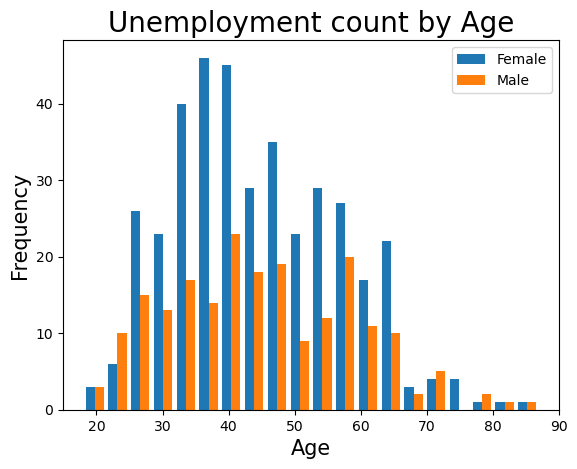

<Figure size 640x480 with 0 Axes>

In [ ]:
# visuallizing unempployed by age
#matplotlib.use('Agg') # help to safe when it does not save
%matplotlib inline
unemployed_female_age = df.loc[(df["Occupation"] == "Unemployed") & (df["Gender"] == "Female"), "Age"]
unemployed_male_age = df.loc[(df["Occupation"] == "Unemployed") & (df["Gender"] == "Male"), "Age"]

plt.hist([unemployed_female_age, unemployed_male_age], bins=20, label=["Female", "Male"])
plt.legend()
plt.xlabel("Age",fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.title("Unemployment count by Age",fontsize=20)
plt.show()

plt.savefig("unemployed_gender_age_histogram.png")



In [ ]:
# converting all unemployed unemployed over 65 to retired
df.loc[(df["Age"] > 65) & (df["Occupation"] == "Unemployed"), "Occupation"] = "Retired"


In [ ]:
# correct inconsistent occupation
# for uni-student less than 18
df[(df["Age"]<18) & (df["Occupation"]== "University Student")] # no university student less than 18

Empty DataFrame
Columns: [House_Number, Street, First_Name, Surname, Age, Relationship_to_Head_of_House, Marital_Status, Gender, Occupation, Infirmity, Religion]
Index: []

In [ ]:
# correct inconsistent occupation
# what about for students
df[(df["Age"]<18) & (df["Occupation"]== "Student")]

House_Number             Street First_Name         Surname  Age  \
12               6        Garner Fork       Luke     Stone-Marsh   16   
34               2    Brightloop Lane   Kayleigh           Jones   15   
44               1         Beech Lake       Rhys         Skinner   12   
60               3           Todd Row      Marie         Simpson   10   
61               3           Todd Row      Karen  Walker-Simpson    5   
...            ...                ...        ...             ...  ...   
8856             1    Hale Stronghold  Katherine            Ford   16   
8857             1    Hale Stronghold    Stewart            Ford   13   
8865             1  Glover Manorhouse      Sarah           White   13   
8866             1  Glover Manorhouse    Stewart           White    8   
8867             1  Glover Manorhouse   Jonathan           White    7   

     Relationship_to_Head_of_House Marital_Status  Gender Occupation  \
12                             Son     NA(minors)    Male    Student   
34                        Daughter     NA(minors)  Female    Student   
44                             Son     NA(minors)    Male    Student   
60                        Daughter     NA(minors)  Female    Student   
61                        Daughter     NA(minors)  Female    Student   
...                            ...            ...     ...        ...   
8856              Adopted Daughter     NA(minors)  Female    Student   
8857                           Son     NA(minors)    Male    Student   
8865                      Daughter     NA(minors)  Female    Student   
8866                           Son     NA(minors)    Male    Student   
8867                           Son     NA(minors)    Male    Student   

     Infirmity Religion  
12        None      NaN  
34        None      NaN  
44        None      NaN  
60        None      NaN  
61        None      NaN  
...        ...      ...  
8856      None      NaN  
8857      None      NaN  
8865      None      NaN  
8866      None      NaN  
8867      None      NaN  

[1473 rows x 11 columns]

In [ ]:
# check if there is anybody greater than 18 that is not a uni-student
# correct inconsistent occupation

df[(df["Age"] > 18) & (df["Occupation"]== "Student")]

Empty DataFrame
Columns: [House_Number, Street, First_Name, Surname, Age, Relationship_to_Head_of_House, Marital_Status, Gender, Occupation, Infirmity, Religion]
Index: []

In [ ]:
# checking the age of student
df[(df["Age"]<18) & (df["Occupation"]== "Student")]["Age"].describe()

count    1473.000000
mean       11.137814
std         3.687249
min         5.000000
25%         8.000000
50%        11.000000
75%        14.000000
max        17.000000
Name: Age, dtype: float64

- this implies that all the univerity student are 18 year and above are university student while all student betwee 5- 18 are high school middle and primary school student

In [ ]:
# checking for child
# df[df["Occupation"]== "Child"] you will get thesame output indicating all < 18 != Student are child <=4
df[(df["Age"]<18) & (df["Occupation"]!= "Student")]#  all the people less than 18 that are not student are childred

House_Number             Street First_Name         Surname  Age  \
55               1           Todd Row      Megan         Jackson    4   
62               3           Todd Row       Anna  Walker-Simpson    1   
200              5  Apricotbox Avenue        Sam          Coates    4   
201              5  Apricotbox Avenue     Gordon          Coates    0   
208              7  Apricotbox Avenue     Joseph            Ward    0   
...            ...                ...        ...             ...  ...   
8809             1    Capricorn House    Russell           Smith    3   
8821             1   Paris Obervatory   Michelle        Mitchell    3   
8848             1         King Manor        Guy           Kirby    1   
8849             1         King Manor      Holly           Kirby    0   
8874             1    Price Institute     Graham         Farrell    2   

     Relationship_to_Head_of_House Marital_Status  Gender Occupation  \
55                        Daughter     NA(minors)  Female      Child   
62                        Daughter     NA(minors)  Female      Child   
200                            Son     NA(minors)    Male      Child   
201                            Son     NA(minors)    Male      Child   
208                            Son     NA(minors)    Male      Child   
...                            ...            ...     ...        ...   
8809                           Son     NA(minors)    Male      Child   
8821                      Daughter     NA(minors)  Female      Child   
8848                           Son     NA(minors)    Male      Child   
8849                      Daughter     NA(minors)  Female      Child   
8874                           Son     NA(minors)    Male      Child   

              Infirmity Religion  
55                 None      NaN  
62                 None      NaN  
200                None      NaN  
201                None      NaN  
208                None      NaN  
...                 ...      ...  
8809  Mental Disability      NaN  
8821               None      NaN  
8848               None      NaN  
8849               None      NaN  
8874               None      NaN  

[494 rows x 11 columns]

In [ ]:
df[df["Occupation"]== "Child"]["Age"].describe() # children  are between 0 and 4

count    494.000000
mean       2.101215
std        1.388842
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: Age, dtype: float64

In [ ]:
df["Occupation"].value_counts().sort_values(ascending=False) # .sort_values(ascending=False) will sort highest to lowest

Student                       1577
Retired                        916
University Student             592
Unemployed                     559
Child                          494
                              ... 
Designer, ceramics/pottery       2
Textile designer                 2
Veterinary surgeon               2
Horticultural therapist          2
Podiatrist                       2
Name: Occupation, Length: 645, dtype: int64

- this implies that all the univerity student are 18 year and above are university student while all student betwee 5- 18 are high school middle and primary school student. the retirment age is around 75

#### Reclassifaction of the occupation column
To simplify the residents' occupation for analysis, the occupation column are categorized as: Child, Student, Employed, Unemployed, Retired. These were assigned to a newly created column named  "updated occupation".

In [ ]:
#Adding another column named updated_occupation to the dataset
df["updated_occupation"] = df["Occupation"]
df.head()

House_Number       Street First_Name         Surname  Age  \
0             1  Garner Fork    Carolyn          Murray   52   
1             1  Garner Fork       Kyle          Murray   53   
2             1  Garner Fork    Suzanne  Elliott-Murray   24   
3             2  Garner Fork      Naomi          Archer   34   
4             2  Garner Fork     Martin          Barnes   36   

  Relationship_to_Head_of_House Marital_Status  Gender             Occupation  \
0                          Head        Married  Female             Copywriter   
1                       Husband        Married    Male    Immigration officer   
2                      Daughter         Single  Female  Merchant navy officer   
3                          Head         Single  Female  Merchant navy officer   
4                       Partner         Single    Male         Futures trader   

  Infirmity   Religion     updated_occupation  
0      None  Methodist             Copywriter  
1      None  Methodist    Immigration officer  
2      None  Methodist  Merchant navy officer  
3      None       None  Merchant navy officer  
4      None       None         Futures trader

In [ ]:
df["updated_occupation"].replace(to_replace = 'University Student', value = "Student", inplace = True)
df["updated_occupation"].replace(to_replace = 'PhD Student', value = "Student", inplace = True)


def classify_occupation(job):
    if job not in ["Unemployed", "Retired", "Student", "Child"]:
        return "Employed"
    return job

df["updated_occupation"] = df["updated_occupation"].apply(classify_occupation)
df["updated_occupation"].unique()


array(['Employed', 'Retired', 'Student', 'Unemployed', 'Child'],
      dtype=object)

In [ ]:
# frequency count of the different catigories in the updated_occupation
df["updated_occupation"].value_counts().sort_values(ascending=False)

Employed      4720
Student       2189
Retired        916
Unemployed     559
Child          494
Name: updated_occupation, dtype: int64

-here were two missing values in the dataset.

-A person with an age of 71 was labeled as 'Retired' due to the typical retirement age being 65.

-A person with an age of 46 was labeled as 'Unemployed' because their occupation could not be inferred from the data provided, and 'Unemployed' was the second most common occupation in the dataset.(it was unlikely that this person was a university or Ph.D. student given their age (students typically have maximum ages of 22 and 32, respectively).)

-The occupation 'Copy' was likely a typographical error and was replaced with 'Copywriter' for consistency.

-The 'Retired' column contained redundant information, so the different types of retired information were replaced with just 'Retired'.

-To simplify the residents' occupation for analysis, the occupation column are categorized as: Child, Student, Employed, Unemployed, Retired. These were assigned to a newly created column named  "updated occupation".

### Infirmity

In [ ]:
# checking  the column
df.Infirmity.unique()

array(['None', 'Physical Disability', 'Blind', 'Disabled',
       'Mental Disability', 'Deaf', 'Unknown Infection', ' '],
      dtype=object)

In [ ]:
df.Infirmity.value_counts()

None                   8805
Physical Disability      18
Disabled                 11
Mental Disability        10
Deaf                      9
Unknown Infection         9
Blind                     8
                          8
Name: Infirmity, dtype: int64

over 98 % of the population have no infirmity.

In [ ]:
# checking for missing value

df[df.Infirmity == " "]

House_Number           Street First_Name   Surname  Age  \
3690             7   Marshall Inlet     Thomas    Wright   38   
3879             7     Station Road   Kayleigh    Taylor   40   
5891            13    James Station   Samantha    Hewitt   55   
6296             1     Sydney Drive    Melanie     Brown   27   
6772            34  Summer Villages     Gareth  Phillips   57   
7672            18     Begum Ridges      Carly    Waters   15   
7780             2  Coconutbow Lane       Ross    Newton   61   
8732             1      Ward Fields  Francesca   Edwards   32   

     Relationship_to_Head_of_House Marital_Status  Gender  \
3690                       Husband        Married    Male   
3879                          Head        Married  Female   
5891                          Head         Single  Female   
6296                          Head         Single  Female   
6772                          Head        Married    Male   
7672                      Daughter     NA(minors)  Female   
7780                          Head         Single    Male   
8732                          Head        Married  Female   

                                             Occupation Infirmity   Religion  \
3690                                        Firefighter                 None   
3879             Teacher, English as a foreign language            Christian   
5891                          Public affairs consultant             Catholic   
6296                             Applications developer                 None   
6772                          Psychologist, counselling            Methodist   
7672                                            Student                  NaN   
7780                               Newspaper journalist            Christian   
8732  Historic buildings inspector/conservation officer                 None   

     updated_occupation  
3690           Employed  
3879           Employed  
5891           Employed  
6296           Employed  
6772           Employed  
7672            Student  
7780           Employed  
8732           Employed

In [ ]:
# replace the empty string with nan
df.Infirmity.replace(" ", np.nan, inplace=True)

In [ ]:
# fill the nan with None the mode value in the dataset
df.Infirmity.fillna("None",inplace=True)

In [ ]:
# check the  correction
df[df.Infirmity.isnull()]

Empty DataFrame
Columns: [House_Number, Street, First_Name, Surname, Age, Relationship_to_Head_of_House, Marital_Status, Gender, Occupation, Infirmity, Religion, updated_occupation]
Index: []

-There were 8 missing values in the infirmity column of the dataset.

-The decision was made to fill in the missing values with the mode of the dataset, which was 'None'.

-This decision was based on the fact that over 98% of the individuals in the dataset had no infirmity.

-Assigning 'None' to the missing values was not expected to significantly affect the data since it was already heavily skewed toward people without infirmities.

-Assigning any other category of infirmity could potentially introduce biases or errors in the data.

### Religion

In [ ]:
# checking  the data set
df.Religion.unique()

array(['Methodist', 'None', 'Catholic', 'Christian', nan, 'Muslim',
       'Sikh', 'Jewish', 'Sith', 'Bahai', 'Private', 'Nope', 'Hindu'],
      dtype=object)

In [ ]:
# checking the value count
df.Religion.value_counts()

None         2979
Christian    2100
Catholic      955
Methodist     578
Muslim        130
Sikh           65
Jewish         40
Private         4
Bahai           2
Hindu           2
Sith            1
Nope            1
Name: Religion, dtype: int64

there are more people without religion in our data

In [ ]:
# checking for empty string

df[df.Religion==" "]

Empty DataFrame
Columns: [House_Number, Street, First_Name, Surname, Age, Relationship_to_Head_of_House, Marital_Status, Gender, Occupation, Infirmity, Religion, updated_occupation]
Index: []

In [ ]:
# the number of missing data before cleaning
df[df.Religion.isnull()]

House_Number             Street First_Name      Surname  Age  \
12               6        Garner Fork       Luke  Stone-Marsh   16   
34               2    Brightloop Lane   Kayleigh        Jones   15   
44               1         Beech Lake       Rhys      Skinner   12   
55               1           Todd Row      Megan      Jackson    4   
60               3           Todd Row      Marie      Simpson   10   
...            ...                ...        ...          ...  ...   
8857             1    Hale Stronghold    Stewart         Ford   13   
8865             1  Glover Manorhouse      Sarah        White   13   
8866             1  Glover Manorhouse    Stewart        White    8   
8867             1  Glover Manorhouse   Jonathan        White    7   
8874             1    Price Institute     Graham      Farrell    2   

     Relationship_to_Head_of_House Marital_Status  Gender Occupation  \
12                             Son     NA(minors)    Male    Student   
34                        Daughter     NA(minors)  Female    Student   
44                             Son     NA(minors)    Male    Student   
55                        Daughter     NA(minors)  Female      Child   
60                        Daughter     NA(minors)  Female    Student   
...                            ...            ...     ...        ...   
8857                           Son     NA(minors)    Male    Student   
8865                      Daughter     NA(minors)  Female    Student   
8866                           Son     NA(minors)    Male    Student   
8867                           Son     NA(minors)    Male    Student   
8874                           Son     NA(minors)    Male      Child   

     Infirmity Religion updated_occupation  
12        None      NaN            Student  
34        None      NaN            Student  
44        None      NaN            Student  
55        None      NaN              Child  
60        None      NaN            Student  
...        ...      ...                ...  
8857      None      NaN            Student  
8865      None      NaN            Student  
8866      None      NaN            Student  
8867      None      NaN            Student  
8874      None      NaN              Child  

[2021 rows x 12 columns]

In [ ]:
# checking for people under 18
df[(df.Religion.isnull()) & (df['Age'] < 18)]

House_Number             Street First_Name      Surname  Age  \
12               6        Garner Fork       Luke  Stone-Marsh   16   
34               2    Brightloop Lane   Kayleigh        Jones   15   
44               1         Beech Lake       Rhys      Skinner   12   
55               1           Todd Row      Megan      Jackson    4   
60               3           Todd Row      Marie      Simpson   10   
...            ...                ...        ...          ...  ...   
8857             1    Hale Stronghold    Stewart         Ford   13   
8865             1  Glover Manorhouse      Sarah        White   13   
8866             1  Glover Manorhouse    Stewart        White    8   
8867             1  Glover Manorhouse   Jonathan        White    7   
8874             1    Price Institute     Graham      Farrell    2   

     Relationship_to_Head_of_House Marital_Status  Gender Occupation  \
12                             Son     NA(minors)    Male    Student   
34                        Daughter     NA(minors)  Female    Student   
44                             Son     NA(minors)    Male    Student   
55                        Daughter     NA(minors)  Female      Child   
60                        Daughter     NA(minors)  Female    Student   
...                            ...            ...     ...        ...   
8857                           Son     NA(minors)    Male    Student   
8865                      Daughter     NA(minors)  Female    Student   
8866                           Son     NA(minors)    Male    Student   
8867                           Son     NA(minors)    Male    Student   
8874                           Son     NA(minors)    Male      Child   

     Infirmity Religion updated_occupation  
12        None      NaN            Student  
34        None      NaN            Student  
44        None      NaN            Student  
55        None      NaN              Child  
60        None      NaN            Student  
...        ...      ...                ...  
8857      None      NaN            Student  
8865      None      NaN            Student  
8866      None      NaN            Student  
8867      None      NaN            Student  
8874      None      NaN              Child  

[1967 rows x 12 columns]

we can solve this by checking people that are less than 18 and sigining the religion of there parent to them but this will take a lot time. one the other hand we can not impose the religion the parant on the children so i decied to fill it has undecided.

In [ ]:
df["Religion"].fillna("Undecided", inplace = True)

In [ ]:
df["Religion"].replace({"Nope": "None", "Sith": "Sikh", "Private": "None"}, inplace=True)


 - Changing the christian denominations on the record to christian

In [ ]:
#Changing the christian denominations on the record to christian
df["Religion"].replace(['Methodist','Catholic'],"Christian",inplace=True)

In [ ]:
# checking if the change has been effected
df["Religion"].unique()

array(['Christian', 'None', 'Undecided', 'Muslim', 'Sikh', 'Jewish',
       'Bahai', 'Hindu'], dtype=object)

In [ ]:
# checking the number per religion
df["Religion"].value_counts()

Christian    3633
None         2984
Undecided    2021
Muslim        130
Sikh           66
Jewish         40
Bahai           2
Hindu           2
Name: Religion, dtype: int64

In the religion column, there are no empty strings but 1967 missing rows, all of which correspond to individuals under 18 years old. To address this, the missing values have been filled with "unknown" to avoid skewing the results towards the religion column by filling them with the mode religion, which is "None". Additionally, some of the missing values were mistakenly filled with "nope" and have been corrected to "none". some also wrote sith, which probably a typographic error because there is no religion called sith this was called sikh

### Final check after cleaning

In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8878 entries, 0 to 8877
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House_Number                   8878 non-null   int64 
 1   Street                         8878 non-null   object
 2   First_Name                     8878 non-null   object
 3   Surname                        8878 non-null   object
 4   Age                            8878 non-null   int32 
 5   Relationship_to_Head_of_House  8878 non-null   object
 6   Marital_Status                 8878 non-null   object
 7   Gender                         8878 non-null   object
 8   Occupation                     8878 non-null   object
 9   Infirmity                      8878 non-null   object
 10  Religion                       8878 non-null   object
 11  updated_occupation             8878 non-null   object
dtypes: int32(1), int64(1), object(10)
memory usage: 797.8+ KB


In [ ]:
df.describe(include = "all")

House_Number           Street First_Name Surname          Age  \
count    8878.000000             8878       8878    8878  8878.000000   
unique           NaN              105        364     635          NaN   
top              NaN  Castorshy Drive       Kate   Smith          NaN   
freq             NaN              608         40     244          NaN   
mean       40.403244              NaN        NaN     NaN    37.107344   
std        46.147161              NaN        NaN     NaN    21.958179   
min         1.000000              NaN        NaN     NaN     0.000000   
25%        10.000000              NaN        NaN     NaN    19.000000   
50%        23.000000              NaN        NaN     NaN    36.000000   
75%        49.000000              NaN        NaN     NaN    53.000000   
max       236.000000              NaN        NaN     NaN   105.000000   

       Relationship_to_Head_of_House Marital_Status  Gender Occupation  \
count                           8878           8878    8878       8878   
unique                            20              5       2        645   
top                             Head         Single  Female    Student   
freq                            3382           3095    4644       1577   
mean                             NaN            NaN     NaN        NaN   
std                              NaN            NaN     NaN        NaN   
min                              NaN            NaN     NaN        NaN   
25%                              NaN            NaN     NaN        NaN   
50%                              NaN            NaN     NaN        NaN   
75%                              NaN            NaN     NaN        NaN   
max                              NaN            NaN     NaN        NaN   

       Infirmity   Religion updated_occupation  
count       8878       8878               8878  
unique         7          8                  5  
top         None  Christian           Employed  
freq        8813       3633               4720  
mean         NaN        NaN                NaN  
std          NaN        NaN                NaN  
min          NaN        NaN                NaN  
25%          NaN        NaN                NaN  
50%          NaN        NaN                NaN  
75%          NaN        NaN                NaN  
max          NaN        NaN                NaN

In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title='df Census Report', explorative = True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Data vusualization

### Univariate Analysis

In [ ]:
# calculating the number of bins
Age =df["Age"]
Age_Max = Age.max()
Age_min = Age.min()
bin_width = 6
number_bin_width = round((Age_Max - Age_min) / bin_width)
number_bin_width

18

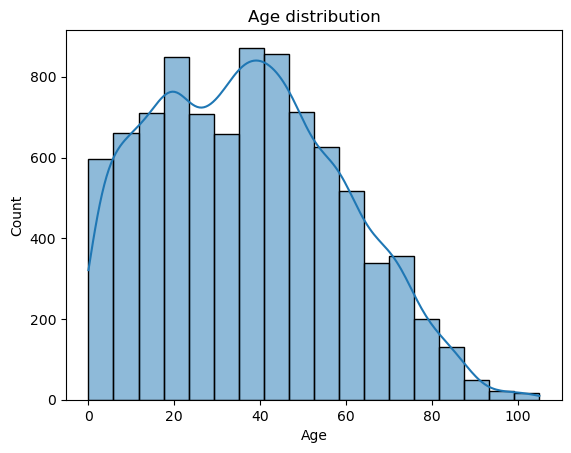

In [ ]:
# Age distribution

sns.histplot(data = df, x= "Age", kde=True, bins= number_bin_width);
plt.title("Age distribution");

In [ ]:
# modified after. aileadtech.(2022) Data Visualization with Python.11 December.Available at:https://www.youtube.com/watch?v=icOcecahe5Y&list=PLqe6YDeOlcOYswRxkfWr17v25ym-ScKdL&index=16(Accessed: 26 March 2023).
# Defining the function for creating histogram and boxplot
def histogram_boxplot(data, feature, figsize=(7, 5), kde=True, bins=None, title = None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    # create two subplots in a grid of 2 rows and 1 column
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # number of rows in the subplot grid is 2
        sharex=True,  # the x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},  # specify the height ratios of the subplots
        figsize=figsize)  # set the size of the figure

    # create a box plot for the given feature and add it to the first subplot
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="mediumturquoise")
    # the showmeans parameter adds a star to indicate the mean value of the column

    # create a histogram for the given feature and add it to the second subplot
    if bins:
        # if the bins parameter is provided, use it to set the number of bins in the histogram
        sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, color="mediumpurple")
    else:
        # if the bins parameter is not provided, use the default number of bins in the histogram
        sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, color="mediumpurple")

    # add a vertical line for the mean value to the histogram
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--")

    # add a vertical line for the median value to the histogram
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-")
    # Add title to plot
    if title:
        ax_box2.set_title(title)
    plt.show()

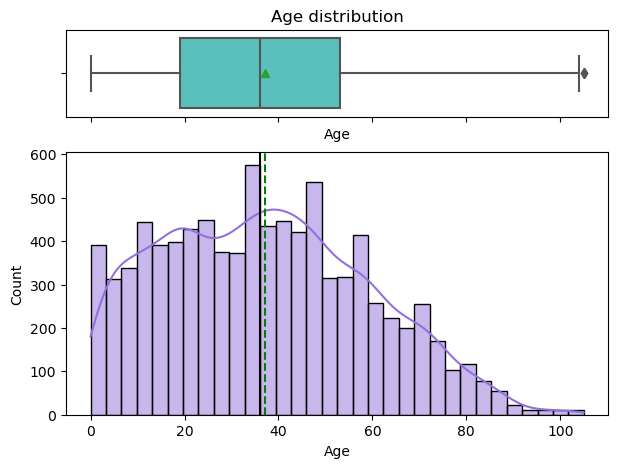

<Figure size 640x480 with 0 Axes>

In [ ]:
histogram_boxplot(data=df, feature="Age", title ="Age distribution")
plt.savefig("Age distibution.png")

the age is slightly right skewwed becuase there is someone in our data that is 105. median age is around 36 and mean age is 37. the std is 21.960552, which is approximately half the mean of 37.104077. This suggests that the data has a relatively high degree of variability or dispersion.

In [ ]:
# function to create labeled barplots
# modified after. aileadtech.(2022) Data Visualization with Python.11 December.Available at:https://www.youtube.com/watch?v=icOcecahe5Y&list=PLqe6YDeOlcOYswRxkfWr17v25ym-ScKdL&index=16(Accessed: 26 March 2023).

def labeled_barplot(data, feature, perc=False, n=None, title=None,title_fontsize=15):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    title: title of the plot (default is None)
    """

    # Calculate the total number of values in the feature column
    total = len(data[feature])

    # Calculate the number of unique values in the feature column
    count = data[feature].nunique()

    # Set the size of the plot based on the number of unique values to be displayed
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    # Add title to the plot
    if title:
        plt.title(title,fontsize=title_fontsize)

    # Customize the x-axis labels and font size
    plt.xticks(rotation=90, fontsize=15)

    # Create the main plot using seaborn's countplot() function
    # with specified palette and order of values to be displayed
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    # Add the labels to the top of the bars
    for p in ax.patches:
        if perc == True:
            # If perc is True, calculate and format the label as percentage
            label = "{:.2f}%".format(
                100 * p.get_height() / total
            )
        else:
            # If perc is False, use the actual count as label
            label = p.get_height()

        # Calculate the x and y coordinates for the label
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()

        # Add the label to the plot with customized text and font size
        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )

    # Turn off the grid lines in the plot
    plt.grid(False)

    # Display the plot
    plt.show()


### Plot  relationship to the head of the house

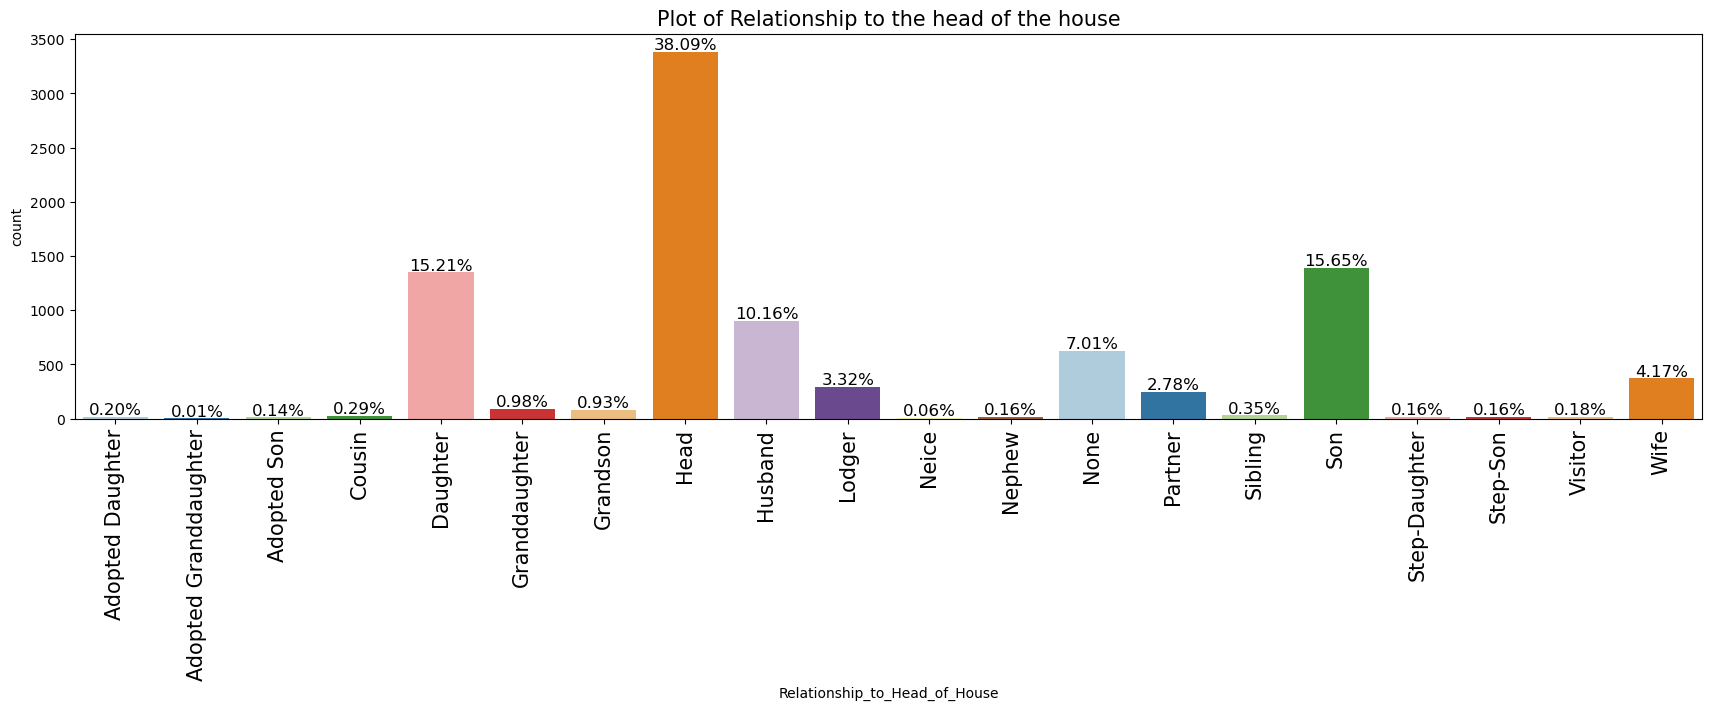

In [ ]:
# relationship to the head of the house
labeled_barplot(data = df, feature="Relationship_to_Head_of_House", perc=True, title ="Plot of Relationship to the head of the house")

- with regard to the relationship to the head of the house. about 79% are either head, husband, sons and duaghters with head being the most.
 there about 38.1% head of house hold, which is follow by about equal numbers of sons and daughters about 15.6%  and 15.2% repectively.the list catigories are adopted son, cousin, adopted granddoaughter, and neice are all less than 0.1% each

###  Occupation plot

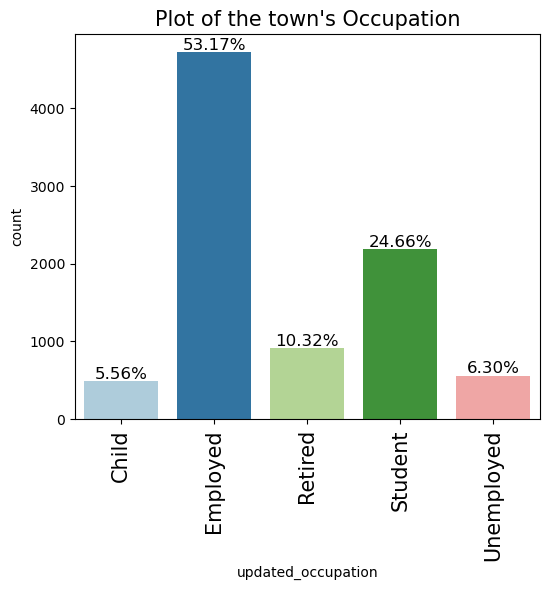

<Figure size 640x480 with 0 Axes>

In [ ]:
# occupation

labeled_barplot(data = df, feature="updated_occupation", perc=True, title="Plot of the town's Occupation")
plt.savefig("Occupation plot.png")

###  plot of marital status

Text(0.5, 0, 'Marital Status')

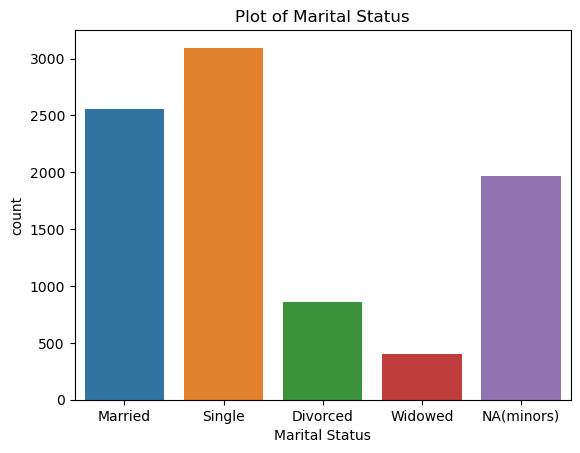

In [ ]:
# plot of marital status

sns.countplot(data = df, x = "Marital_Status");
plt.title("Plot of Marital Status")
plt.xlabel("Marital Status")
#plt.xticks(rotation = 90);

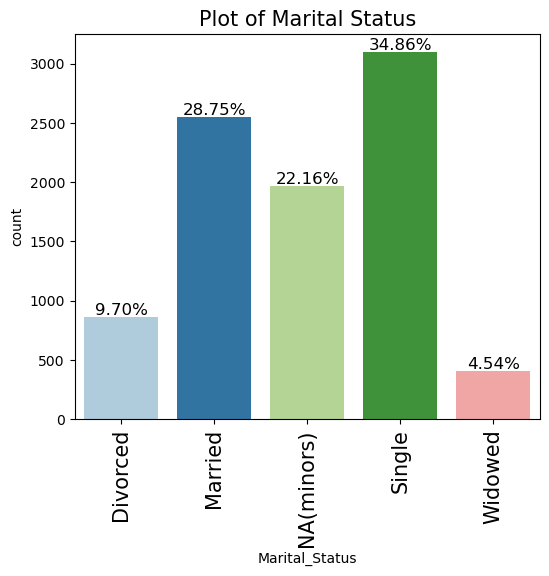

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot of marital_status

labeled_barplot(data = df, feature="Marital_Status", perc=True, title="Plot of Marital Status")
plt.savefig("Marital status.png")

most of the people is this data sent are  single. which account fot about 57% of the entire data set. there 28.7 marriage couple as compared to about 10% who are divorced

### Plot the different Religion

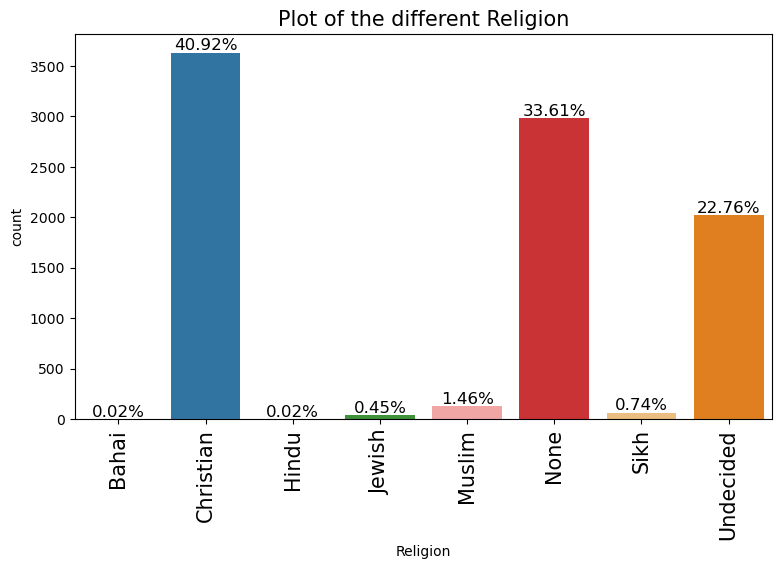

In [ ]:
labeled_barplot(data = df, feature="Religion", perc=True,title="Plot of the different Religion")

about 22 % did not fill there religion. however, most of the people in the data set have no religion and of the people with religion christian are the most common(about 23.75). this followed by catholic and methodist accounting for about 10.8 and 6.5 % respectively. the least common religion are bahai, hindu, jewish and sikh are less than 0.1 % of our entire data sent

### Plot of Infirmity in the Town

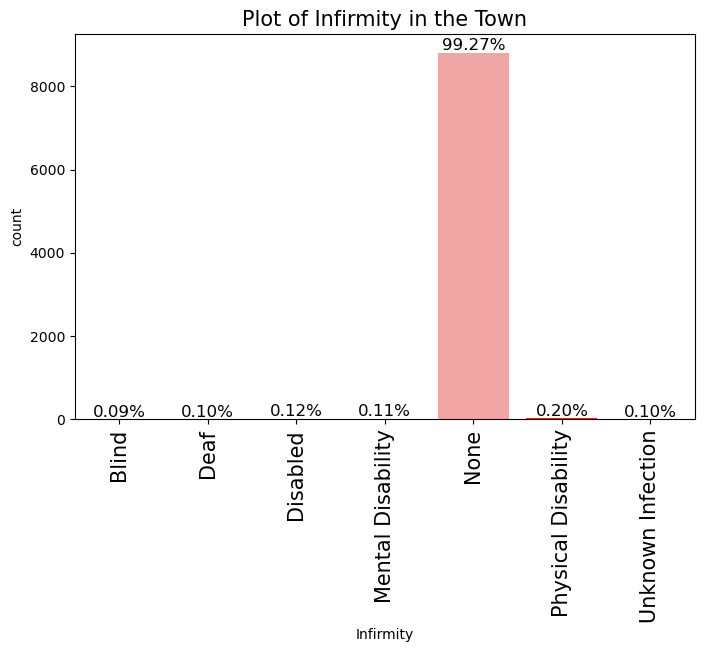

In [ ]:
labeled_barplot(data = df, feature="Infirmity", perc=True, title ="Plot of Infirmity in the Town")

### bivariant plot


### Plot of Age Against Relationship to the Head of the House"

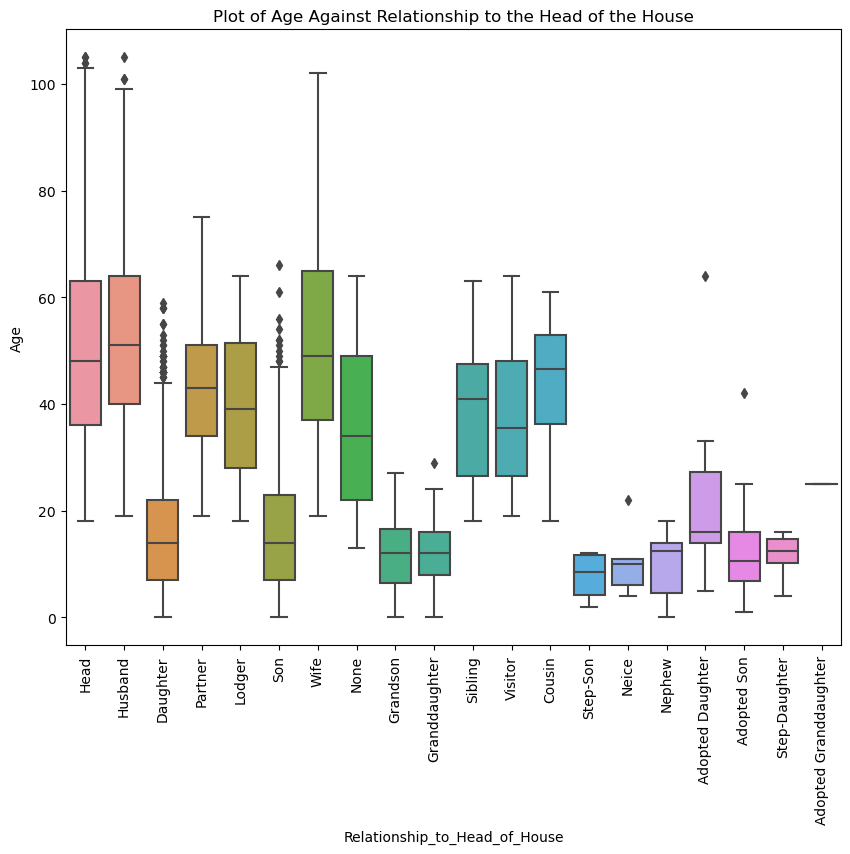

In [ ]:
# relation between age and head house
plt.figure(figsize=(10,8))
sns.boxplot(data=df,x="Relationship_to_Head_of_House", y = "Age")
plt.xticks(rotation = 90)
plt.title("Plot of Age Against Relationship to the Head of the House")
plt.show()

female that are head of house where a bit older (midain age of about 50). the head of house that are husband about thesame.

### Age vs Marital Status conditioned by Gender

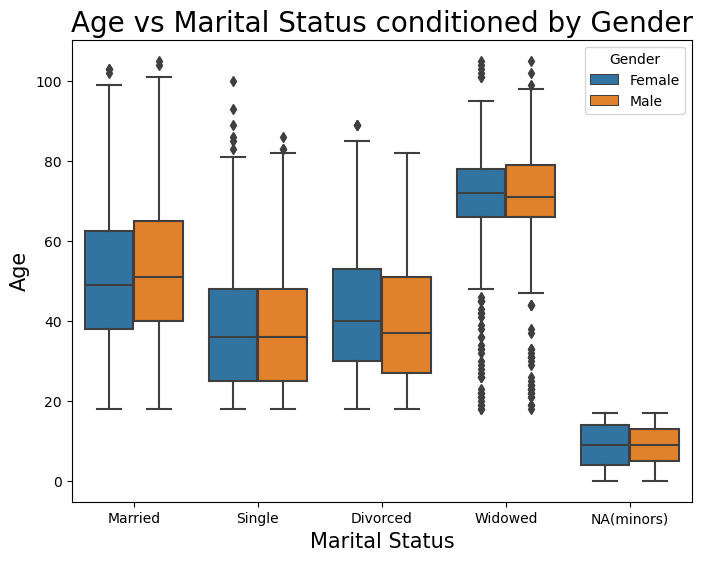

<Figure size 640x480 with 0 Axes>

In [ ]:

plt.figure(figsize=(8,6))
sns.boxplot(data=df,x="Marital_Status", y = "Age", hue= "Gender")
plt.title("Age vs Marital Status conditioned by Gender",fontsize=20)
plt.xlabel("Marital Status", fontsize=15)
plt.ylabel("Age",fontsize=15)
plt.grid(False)
plt.show()
plt.savefig('Age vs Marital Status.png')

on average the widows are older (above 60 year), this was closly folled my the married people with with a median age of about 50. as aspected the youngest are the single with average age of about 20 years

### Plot of Age vs Gender

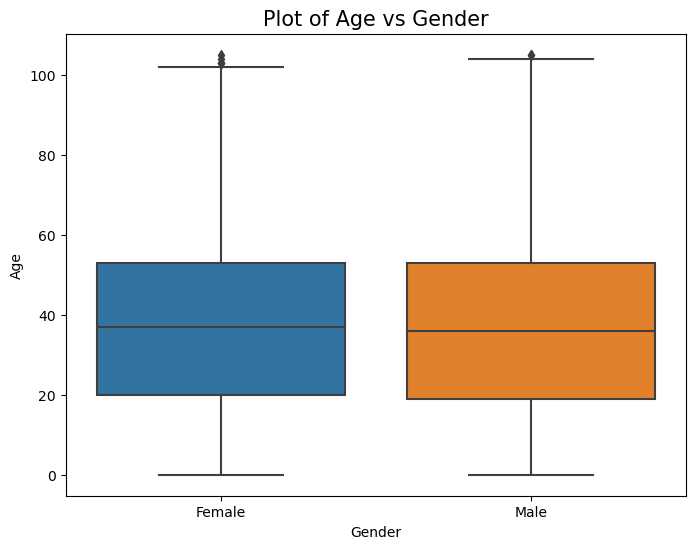

In [ ]:
# Age vs Gender
plt.figure(figsize=(8,6))
sns.boxplot(data=df,x="Gender", y = "Age")
plt.grid(False)
plt.title("Plot of Age vs Gender",fontsize=15)
plt.show()

about equal male and female in the town

### Visualization of the relationship between Age and Religion

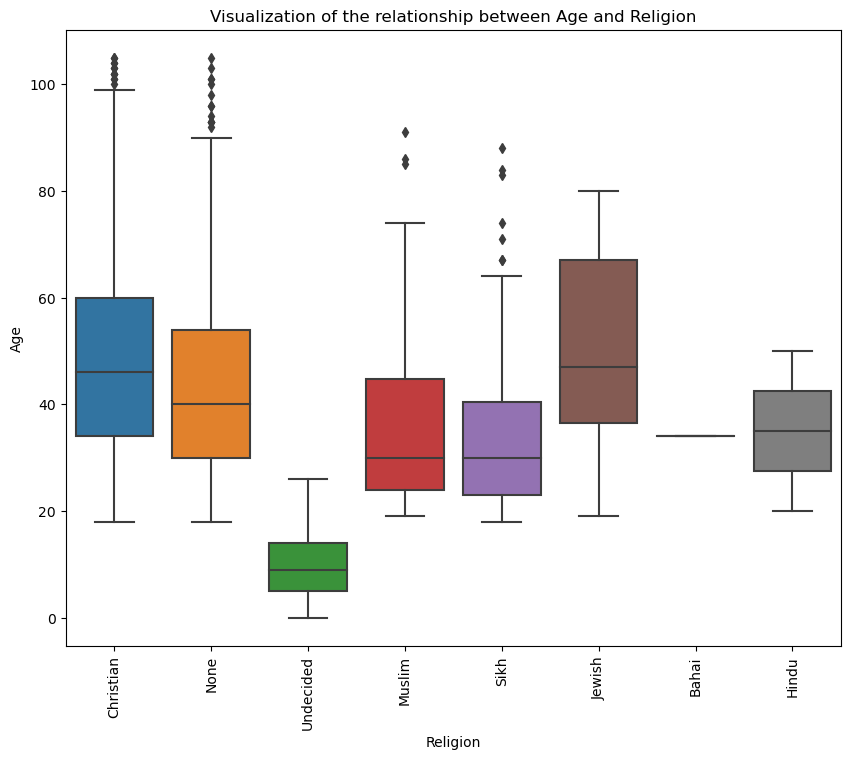

In [ ]:
# relation between age and head house
plt.figure(figsize=(10,8))
sns.boxplot(data=df,x="Religion", y = "Age")
plt.xticks(rotation = 90)
plt.title("Visualization of the relationship between Age and Religion")
plt.show()

even though there few jewish people in this data set but they are older on average. most of the people u did not fill there religion are less than 18 years. chistrian which the most common religion has an average age of about 50 years

## Data insight

### to create a pyramind

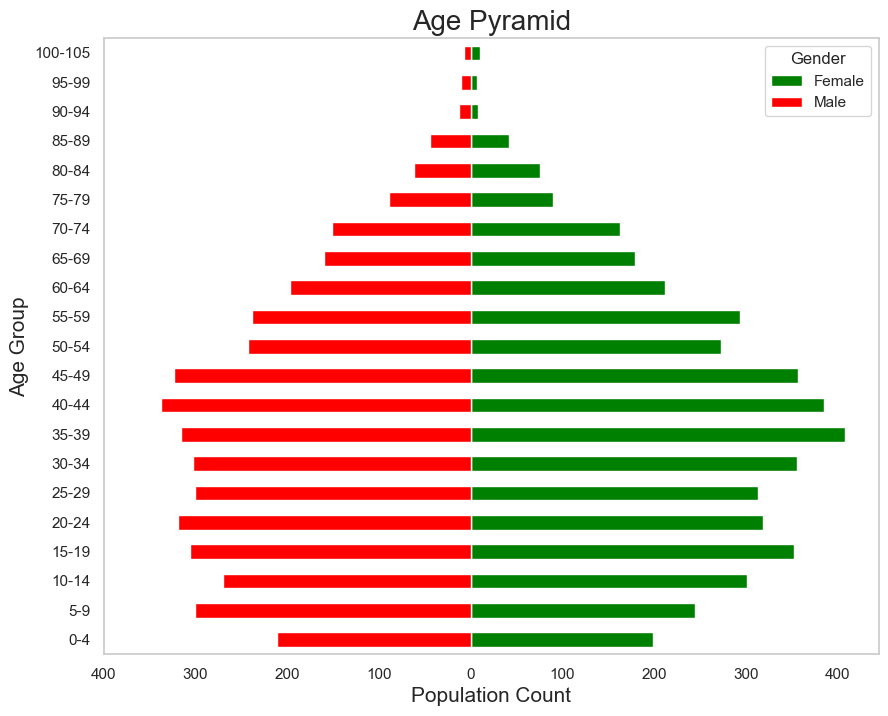

<Figure size 640x480 with 0 Axes>

In [ ]:
# Define the bins for 5-year intervals
bins = [0, 4, 9, 14, 19, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 74, 79, 84, 89, 94, 99, 105]

# Define the corresponding age group labels
labels = ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54',
          '55-59', '60-64', '65-69', '70-74', '75-79', '80-84', '85-89', '90-94', '95-99', '100-105']

# Add a new column to the dataframe with the age groups
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Create a new column with a count of 1 for each row
df['Count'] = 1

# Create a pivot table with the count of individuals by age group and gender
age_gender_counts = df.pivot_table(values='Count', index='Age Group', columns='Gender', aggfunc=sum)

# Multiply male values by -1 to make them negative
age_gender_counts['Male'] = age_gender_counts['Male'].apply(lambda x: -1*x)

# Create a new column for the total count by age group
#age_gender_counts['Total'] = age_gender_counts.sum(axis=1)

# Calculate the percentage of males and females in each age group
age_gender_perc = age_gender_counts.apply(lambda x: x / x.sum() * 100, axis=1)

# Remove the temporary count column from the DataFrame
df = df.drop(columns=['Count'])

# Create a bar plot using Seaborn
sns.set(style='whitegrid')
age_gender_counts.plot(kind='barh', stacked=True, color=['green', 'red','blue'], figsize=(10, 8))
plt.title('Age Pyramid', fontsize=20)
plt.xlabel('Population Count', fontsize=15)
plt.ylabel('Age Group', fontsize=15)
plt.grid(False)
plt.xticks([-400,-300,-200,-100,0, 100,200,300,400],[400,300,200,100,0, 100,200,300,400])
# Display the plot
plt.show()

plt.savefig("Age Pyramid")

The pyramid shows that there are more middle-aged
individuals than younger people. There is also a significant drop in the early age group (0-4
years), indicating a low birth rate. One notable deviation is a decrease in population between
ages 24 to 34. This fluctuation could be explained by university students and early career
seekers leaving the town.

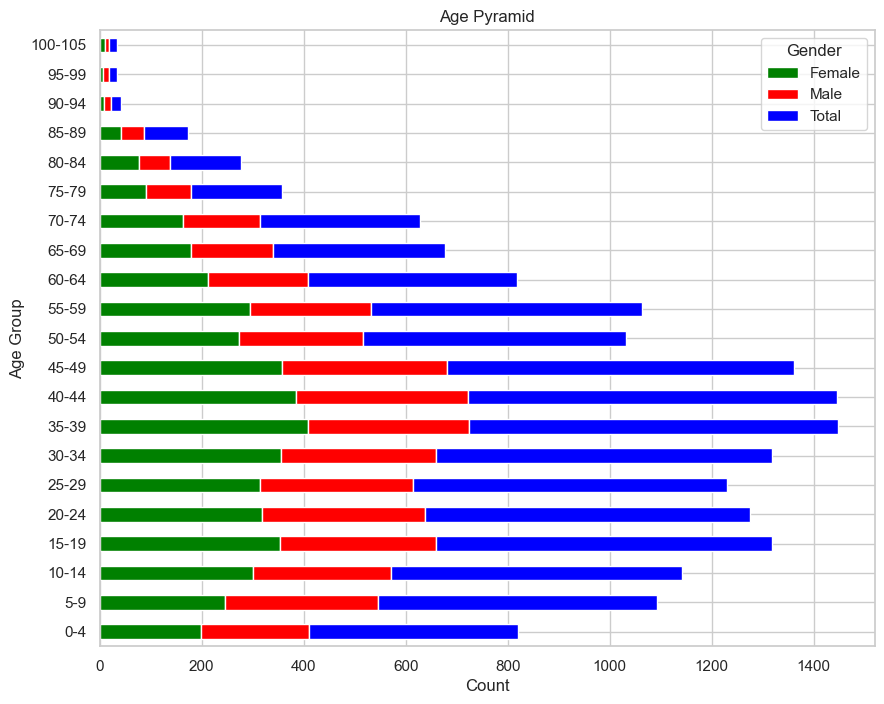

In [ ]:
bins = [0, 4, 9, 14, 19, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 74, 79, 84, 89, 94, 99, 105]

# Define the corresponding age group labels
labels = ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54',
          '55-59', '60-64', '65-69', '70-74', '75-79', '80-84', '85-89', '90-94', '95-99', '100-105']

# Add a new column to the dataframe with the age groups
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Create a new column with a count of 1 for each row
df['Count'] = 1

# Create a pivot table with the count of individuals by age group and gender
age_gender_counts = df.pivot_table(values='Count', index='Age Group', columns='Gender', aggfunc=sum)

# Multiply male values by -1 to make them negative
#age_gender_counts['Male'] = age_gender_counts['Male'].apply(lambda x: -1*x)

# Create a new column for the total count by age group
age_gender_counts['Total'] = age_gender_counts.sum(axis=1)

# Calculate the percentage of males and females in each age group
age_gender_perc = age_gender_counts.apply(lambda x: x / x.sum() * 100, axis=1)

# Remove the temporary count column from the DataFrame
df = df.drop(columns=['Count'])

# Create a bar plot using Seaborn
sns.set(style='whitegrid')
age_gender_counts.plot(kind='barh', stacked=True, color=['green', 'red','blue'], figsize=(10, 8))
plt.title('Age Pyramid')
plt.xlabel('Count')
plt.ylabel('Age Group')

# Display the plot
plt.show()

### Determining the number of commuters

#### Cassification into commuters and non commuters

In [ ]:
# Creating unique list for occupations that requires people to leave town
list(df["Occupation"].unique())

['Copywriter',
 'Immigration officer',
 'Merchant navy officer',
 'Futures trader',
 'Retired',
 'Learning mentor',
 'Engineer, biomedical',
 'Public affairs consultant',
 'Optometrist',
 'Police officer',
 'Student',
 'Architectural technologist',
 'Surveyor, rural practice',
 'Higher education lecturer',
 'Unemployed',
 'Special educational needs teacher',
 'Industrial/product designer',
 'Fish farm manager',
 'Therapist, nutritional',
 'Science writer',
 'Administrator, charities/voluntary organisations',
 'University Student',
 'Quarry manager',
 'Retail merchandiser',
 'Media planner',
 'Occupational hygienist',
 'Insurance risk surveyor',
 'Network engineer',
 'Embryologist, clinical',
 'Animal technologist',
 'Sales promotion account executive',
 'Medical illustrator',
 'Make',
 'Child',
 'Dramatherapist',
 'Patent examiner',
 'Designer, blown glass/stained glass',
 'Chartered public finance accountant',
 'Psychologist, counselling',
 'Financial manager',
 'Surveyor, planning an


- The occupation information can be divided into three categories - outbound, inbound, and unclassified worker. Outbound workers are those who leave the town for work, inbound workers are those who stay in the town for work, and unclassified workers are those whose occupation cannot be categorized due to a lack of information about the town. Our focus is on identifying the outbound workers as they reflect the number of commuters



In [ ]:
"""The Occupation variable can be categorized into three types: outbound, inbound, and unknown.
Outbound refers to those who go out of town for work, inbound refers to those who stay in town for work, and unknown
"""
outbound_workers = ['Optometrist','Industrial buyer','Engineer, automotive','Engineer, biomedical',
         'Medical laboratory scientific officer','Engineer, production','Engineer, energy','PhD Student',
         'Medical technical officer','Trading standards officer','Magazine journalist','Pharmacist, hospital','Runner, broadcasting/film/video','Biomedical scientist',
          'Soil scientist','Furniture conservator/restorer','Energy engineer', 'learning disability','Psychotherapist, child','Academic librarian',
         'Doctor, hospital','Occupational psychologist','Engineer, aeronautical','Clinical embryologist','Marine scientist','Water engineer','Scientist, physiological','Psychologist, occupational','Hydrogeologist','Psychologist, clinical','Hydrologist',
         'Psychologist, clinical','Psychotherapist','Health visitor','Ambulance person','Chief of Staff','Scientist, biomedical','Physiotherapist','Dentist',"Nurse, children's"
          ,'Phytotherapist','Engineer, water','Scientist, marine','Research scientist (maths)','Dietitian','Toxicologist',
          'Oncologist','Clinical research associate','Lecturer','Operational researcher','Speech and language therapist','Nutritional therapist',
         'Paediatric nurse','Oceanographer','Freight forwarder','Research scientist (life sciences)','Statistician','Research officer, trade union','Meteorologist','Hospital doctor',
         'Professor Emeritus','Embryologist, clinical','Health promotion specialist','Ecologist',
         'Herpetologist','Astronomer','Research officer, government','Research scientist (physical sciences)','Dramatherapist',
         'Scientist, research (maths)','Counselling psychologist','Secretary/administrator','Microbiologist','Physicist, medical','Patent examiner','Medical physicist','Scientist, forensic','Research scientist (medical)',
         'Biomedical engineer','Scientist, water quality','Biochemist, clinical', 'mental health','Psychiatrist','Ship broker','Neurosurgeon',
         'Forensic scientist','Osteopath','Immunologist','Archaeologist',]

print("Estimated number of outbound jobs is : {}".format(len(outbound_workers)))

Estimated number of outbound jobs is : 89


In [ ]:
# Estimation the number of commuters in town
ite=0
for jobs in df["Occupation"]:
    if jobs in outbound_workers:
        ite = ite+1

print("The total number of commuters : {}".format(ite))

The total number of commuters : 650


#### Finding the  employed  individuals by age range

In [ ]:
# Define a function to group employed individuals by age range
def group_employed_by_age(data):
    employed_gp = pd.DataFrame(data[data["updated_occupation"] == "Employed"])

    employed_nw=[]
    for ind in range(0,22,1):
        rng = np.array(list(range(0,5,1)))+(ind*5)
        employed_nw.append([employed_gp["Age"][(employed_gp["Age"] >= rng[0]) & (employed_gp["Age"] <= rng[4])]])
    employed_ngp=employed_nw

    # Sum the number of employed individuals in each age group
    employed_sum=[]
    for ind in range(0,22,1):
        sum_nw = len(employed_ngp[ind][0])
        employed_sum.append(sum_nw)

    # Create a new dataframe to plot the employed-age data
    age_py = pd.DataFrame({'Age': ['0-4','5-9', '10-14','15-19', '20-24','25-29', '30-34','35-39', '40-44','45-49', '50-54', '55-59','60-64',
                        '65-69','70-74', '75-79','80-84','85-89', '90-94', '95-99','100-104','105+'],
                         'Employed': employed_sum})

    return age_py

age_py= group_employed_by_age(df)

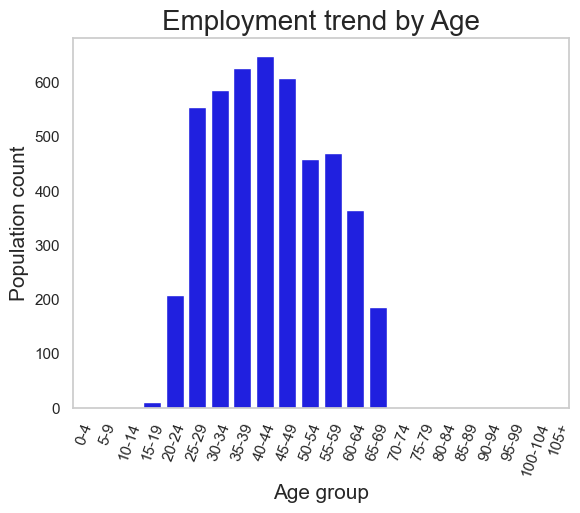

In [ ]:
#Specifying the Ageclass
AgeClass = ['0-4','5-9', '10-14','15-19', '20-24','25-29', '30-34','35-39', '40-44','45-49', '50-54', '55-59','60-64',
'65-69','70-74', '75-79','80-84','85-89', '90-94', '95-99','100-104','105+']

%matplotlib inline

#Employed_occupancy_valuation
age_occupation = sns.barplot(x='Age', y='Employed', data=age_py, order=AgeClass, color="blue")
#plt.ylim([0, 16])
plt.ylabel("Population count",fontsize =15)
plt.xlabel("Age group",fontsize =15)
plt.xticks(rotation = 70)
plt.title("Employment trend by Age", fontsize =20)
plt.grid(False)
plt.show()

#### Finding the  Unemployed individuals by age range

In [ ]:
# Unemployment trend
# Define a function to group employed individuals by age range
def group_unemployed_by_age(data):
    employed_gp = pd.DataFrame(data[data["updated_occupation"] == "Unemployed"])

    employed_nw=[]
    for ind in range(0,22,1):
        rng = np.array(list(range(0,5,1)))+(ind*5)
        employed_nw.append([employed_gp["Age"][(employed_gp["Age"] >= rng[0]) & (employed_gp["Age"] <= rng[4])]])
    employed_ngp=employed_nw

    # Sum the number of employed individuals in each age group
    employed_sum=[]
    for ind in range(0,22,1):
        sum_nw = len(employed_ngp[ind][0])
        employed_sum.append(sum_nw)

    # Create a new dataframe to plot the employed-age data
    age_py = pd.DataFrame({'Age': ['0-4','5-9', '10-14','15-19', '20-24','25-29', '30-34','35-39', '40-44','45-49', '50-54', '55-59','60-64',
                        '65-69','70-74', '75-79','80-84','85-89', '90-94', '95-99','100-104','105+'],
                         'Unemployed': employed_sum})

    return age_py

age_py= group_unemployed_by_age(df)

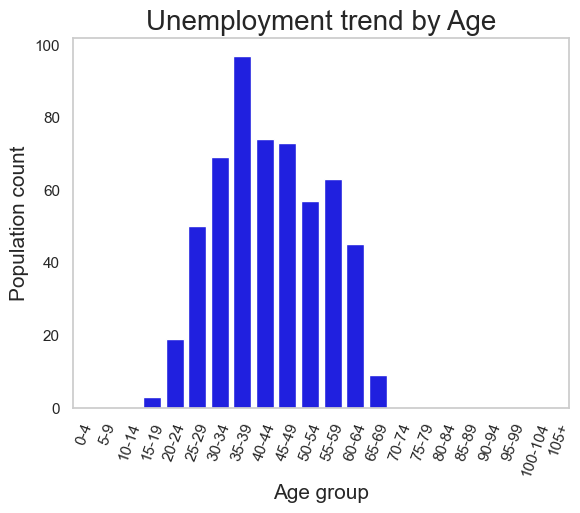

In [ ]:
#Specifying the Ageclass
AgeClass = ['0-4','5-9', '10-14','15-19', '20-24','25-29', '30-34','35-39', '40-44','45-49', '50-54', '55-59','60-64',
'65-69','70-74', '75-79','80-84','85-89', '90-94', '95-99','100-104','105+']

%matplotlib inline

#unemployed_occupancy_valuation
age_occupation = sns.barplot(x='Age', y='Unemployed', data=age_py, order=AgeClass, color="blue")
#plt.ylim([0, 16])
plt.ylabel("Population count", fontsize=15)
plt.xlabel("Age group",fontsize=15)
plt.xticks(rotation = 70)
plt.title("Unemployment trend by Age",fontsize=20)
plt.grid(False)

plt.show()

#### Number of retired and unemployed
Is there demand for or would there be demand for retired home?
Based on aging and retired rate per population

In [ ]:
# Estimate the number of Unemployed adults in the town

df[df["updated_occupation"] == "Unemployed"]["Age"].describe()


count    559.00000
mean      43.08229
std       11.45008
min       18.00000
25%       34.00000
50%       42.00000
75%       53.00000
max       65.00000
Name: Age, dtype: float64

In [ ]:
# Estimate the number of Unemployed adults in the town
df[df["updated_occupation"] == "Retired"]["Age"].describe()


count    916.000000
mean      76.771834
std        7.703900
min       66.000000
25%       71.000000
50%       74.500000
75%       81.000000
max      105.000000
Name: Age, dtype: float64

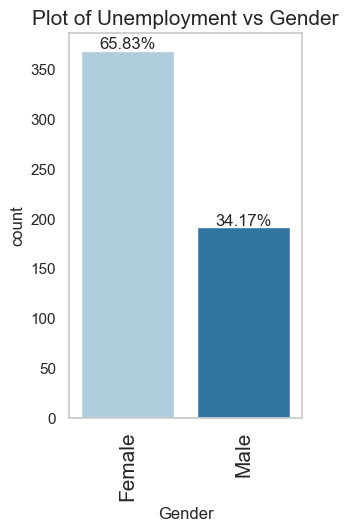

In [ ]:
# distribution of unemployment by gender

unemployed_gender = df["Gender"][df["updated_occupation"] == "Unemployed"]
Unemployed_Gender =  pd.DataFrame({"Gender":unemployed_gender})
labeled_barplot(data = Unemployed_Gender, feature="Gender", perc=True, title="Plot of Unemployment vs Gender")



In [ ]:
df["Religion"].unique()

array(['Christian', 'None', 'Undecided', 'Muslim', 'Sikh', 'Jewish',
       'Bahai', 'Hindu'], dtype=object)

#### Religion by household
The section focuses on determining the transmission rate of religion to the younger generation. The accuracy of this analysis is expected to be affected by the religion classification for young children.

In [ ]:
# checking the frequency of the region column
df["Religion"].value_counts()

Christian    3633
None         2984
Undecided    2021
Muslim        130
Sikh           66
Jewish         40
Bahai           2
Hindu           2
Name: Religion, dtype: int64

In [ ]:
# discriptive statistic of the main religion
desired_religions = ["Bahai", "Christian", "Hindu", "Jewish","Muslim","Sikh"]
filtered_df = df[df["Religion"].isin(desired_religions)]
religion_age_stats = filtered_df.groupby("Religion")["Age"].describe()

religion_age_stats

count       mean        std   min   25%   50%    75%    max
Religion                                                               
Bahai         2.0  34.000000   0.000000  34.0  34.0  34.0  34.00   34.0
Christian  3633.0  47.623176  18.049439  18.0  34.0  46.0  60.00  105.0
Hindu         2.0  35.000000  21.213203  20.0  27.5  35.0  42.50   50.0
Jewish       40.0  50.200000  17.221334  19.0  36.5  47.0  67.00   80.0
Muslim      130.0  36.600000  16.699626  19.0  24.0  30.0  44.75   91.0
Sikh         66.0  35.893939  17.981297  18.0  23.0  30.0  40.50   88.0

In [ ]:
# remove this later
df.groupby("Religion")["Age"].quantile(0.5)

Religion
Bahai        34.0
Christian    46.0
Hindu        35.0
Jewish       47.0
Muslim       30.0
None         40.0
Sikh         30.0
Undecided     9.0
Name: Age, dtype: float64

### visualizing  the religion by age

In [ ]:
# Setting up recognized religions for visualization
rellist = ['Christian', 'Sikh', 'Muslim', 'Jewish', 'Bahai', 'Hindu']
age_group = {}
for rel in rellist:
    rel_age = df["Age"][df["Religion"] == rel]
    age_group.update({rel: rel_age})

print(age_group)

{'Christian': 0       52
1       53
2       24
5       71
6       28
        ..
8864    43
8871    63
8872    39
8876    63
8877    51
Name: Age, Length: 3633, dtype: int32, 'Sikh': 48      18
129     22
163     23
202     71
203     67
        ..
8248    55
8471    33
8586    31
8657    53
8742    56
Name: Age, Length: 66, dtype: int32, 'Muslim': 40      25
41      24
42      66
49      19
63      71
        ..
8408    27
8438    19
8472    21
8504    27
8873    38
Name: Age, Length: 130, dtype: int32, 'Jewish': 149     69
896     41
1066    34
1069    46
1070    44
1166    78
1175    53
1251    48
1782    80
1838    64
1839    40
1840    38
2054    28
2387    67
2423    37
2787    77
2789    44
2890    31
4304    57
4305    22
4306    19
4500    35
4501    34
4880    58
4882    32
4883    29
5180    67
5941    68
5942    78
5959    26
6468    48
6615    44
7027    67
7028    69
7409    71
7987    44
7988    42
8039    60
8197    56
8198    63
Name: Age, dtype: int32, 'Bahai': 1135   

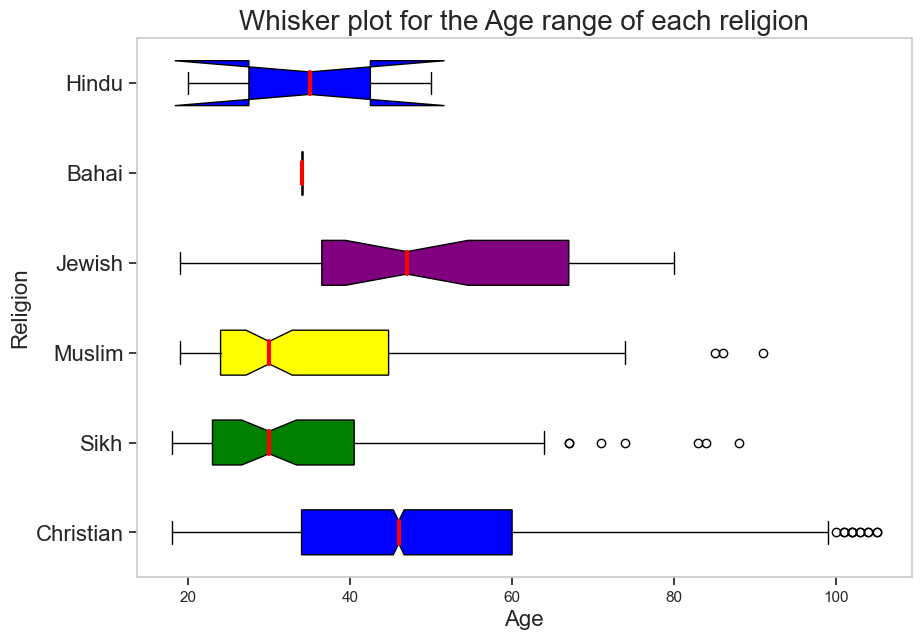

In [ ]:
# Visualization of religion - age distribution
# Code modified after: Box Plot in Python using Matplotlib - GeeksforGeeks [Accessed 5/4/2023]



rellist = ['Christian', 'Sikh', 'Muslim', 'Jewish', 'Bahai', 'Hindu']
#for rel in rellist:
#    age_ch = pd.DataFrame(age_group[rel])
    # Creating dataset
data_1 = age_group['Christian'].values
data_2 = age_group['Sikh'].values
data_3 = age_group['Muslim'].values
data_4 = age_group['Jewish'].values
data_5 = age_group['Bahai'].values
data_6 = age_group['Hindu'].values
data = [data_1, data_2, data_3, data_4, data_5, data_6]

fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(data, patch_artist = True,
                notch ='True', vert = 0)

colors = ["blue", 'green',
          'yellow', 'purple', 'green', 'blue']

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)


 # changing color and linewidth of medians
for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)

# x-axis labels
ax.set_yticklabels(['Christian', 'Sikh', 'Muslim', 'Jewish', 'Bahai', 'Hindu'], fontsize=16)
ax.set_ylabel("Religion",fontsize=16)
ax.set_xlabel("Age",fontsize=16)

# Adding title
plt.title("Whisker plot for the Age range of each religion", fontsize=20)

# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
plt.grid(False)
# show plot
plt.show(bp)


In [ ]:
# The age bracket specified for adult as indicative from the lab work is 18 years
nonrellist = ['None', 'Undecided']
adult_group = {}
for rel in nonrellist:
    rel_age = df["Age"][(df["Religion"] == rel) & (df["Age"] >= 18)]
    adult_group.update({rel: rel_age})

#print(adult_group)

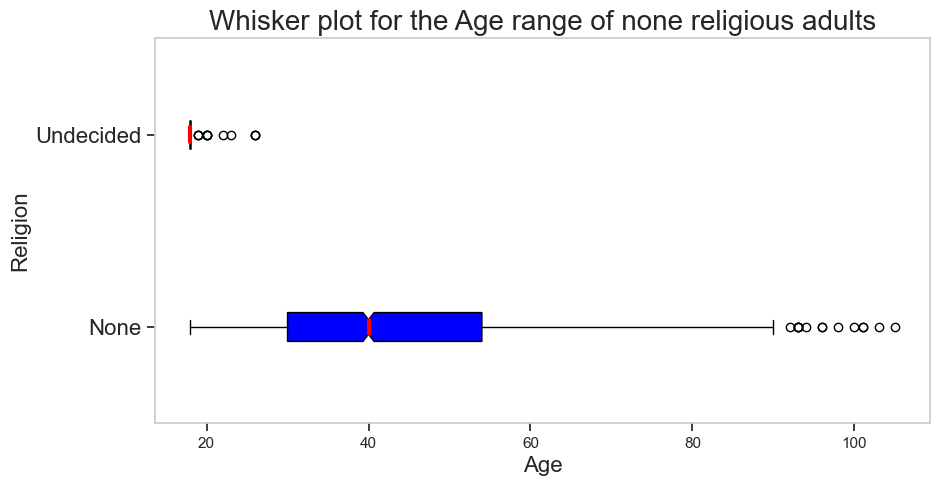

In [ ]:
# Code modified after: Box Plot in Python using Matplotlib - GeeksforGeeks [Accessed 02/12/2021]

# Visualization of the Age range of none religious adults

rellist = ['None', 'Undecided']
#for rel in rellist:
#    age_ch = pd.DataFrame(age_group[rel])
    # Creating dataset
data_1 = adult_group['None'].values
data_2 = adult_group['Undecided'].values

data = [data_1, data_2]

fig = plt.figure(figsize =(10, 5))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(data, patch_artist = True,
                notch ='True', vert = 0)

colors = ['blue', 'green']

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)


 # changing color and linewidth of
# medians
for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)

# x-axis labels
ax.set_yticklabels(['None', 'Undecided'], fontsize=16)
ax.set_ylabel("Religion", fontsize=16)
ax.set_xlabel("Age", fontsize=16)

# Adding title
plt.title("Whisker plot for the Age range of none religious adults", fontsize=20)

# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
plt.grid(False)
# show plot
plt.show(bp)




The portion of residents who identify as having "none" as their religion suggests that
younger individuals in the town are less likely to affiliate themselves with a particular religion
as shown. This trend may be the reason why older religions in the UK such as
Christianity and Judaism have fewer young adherents as shown.

### Determing the transition of religion from parent to children

In [ ]:
#let first  estimate the number of possible parents
# filter the row where the relationship to head of the house is related to parent and store it in a variable df_parent
df_parent = df[(df["Relationship_to_Head_of_House"] == "Head") | (df["Relationship_to_Head_of_House"] == "Husband") | (df["Relationship_to_Head_of_House"] == "Wife") | (df["Relationship_to_Head_of_House"] == "Partner") & (df["Age"] >= 25)]
print(f"Number of parent with and without religion {df_parent['Religion'].count()}")

#subsequently  use the number of parent to filter out region columns where the region is #['Christian','Muslim','Sikh','Jewish']
religious_parent = df_parent[(df_parent["Religion"] == "Christian") | (df_parent["Religion"] == "Sikh") | (df_parent["Religion"] == "Muslim") | (df_parent["Religion"] == "Jewish")]
print("The number of religious parents is: {}" .format(religious_parent["Religion"].count()))
#Parent_group

Number of parent with and without religion 4882
The number of religious parents is: 2799


In [ ]:
#Identifying younger religious residents with Possible religious parent
young_groups = 0
for streets in religious_parent["Street"].unique():
    HouseNumbers = religious_parent["House_Number"][religious_parent["Street"] == streets].unique()# religious_parent[[religious_parent["Street"] == streets]["House_Number"].unique()

    for numbers in HouseNumbers:
        Religions = religious_parent["Religion"][(df["Street"] == streets) & (df["House_Number"] == numbers) & ((df["Relationship_to_Head_of_House"] == "Head") | (df["Relationship_to_Head_of_House"] == "Husband") | (df["Relationship_to_Head_of_House"] == "Wife") | (df["Relationship_to_Head_of_House"] == "Partner"))].unique()

        for Religion in Religions:
            young_group = df[(df["Street"] == streets) & (df["House_Number"] == numbers) & (df["Religion"] == Religion) & (df["Relationship_to_Head_of_House"] != "Head") & (df["Relationship_to_Head_of_House"] != "Husband") & (df["Relationship_to_Head_of_House"] != "Wife") & (df["Relationship_to_Head_of_House"] != "Lodger") & (df["Relationship_to_Head_of_House"] != "Visitor") &
                                    (df["Relationship_to_Head_of_House"] != "Partner")& (df["Relationship_to_Head_of_House"] != "None") & (df["Age"] < 35)]


            if young_group["Religion"].count() > 0:
                #print("The number of young religious residents is: {}" .format(young_group["Religion"].count()))
                young_groups = young_groups+young_group["Religion"].count()

print("The total number of young religious residents is: {}".format(young_groups))

The total number of young religious residents is: 353


#### Birth and Death Rate

In [ ]:
# Total number of female in town
women_total = df["Age"][df["Gender"] == "Female"].count()
women_total

4644

In [ ]:
#Number of babies at age 0
number_babies = df["Age"][df["Age"] == 0].count()
number_babies

84

In [ ]:
#Number of women with birth capability
number_women =df[["Gender","Age"]][(df["Age"] >= 25) & (df["Age"] <= 29) & (df["Gender"] == "Female")].count() # number_women =df[(df["Age"] >= 25) & (df["Age"] <= 29) & (df["Gender"] == "Female")]["Gender","Age"]].count()
number_women

Gender    314
Age       314
dtype: int64

##### Birth ratio for babies at age 0

In [ ]:
try:
    df["Age"]=df["Age"].apply(pd.to_numeric)
except:
    pass

# children age = 0
babies_numbers = 0
for i in df["Age"]:
    if i == 0:
        babies_numbers +=1

# Total number of female in town
women_total = df["Age"][df["Gender"] == "Female"].count()# len(df["Age"][df["Gender"] == "Female"])

#Number of women with birth capability
number_women =len(df[["Gender"]][(df["Age"] >= 25) & (df["Age"] <= 29) & (df["Gender"] == "Female")])


# birth rate of women per child
birth_rate = (babies_numbers/number_women)

# Birth rate per 4644 women, the current population of the town
per_women_0 = (babies_numbers/number_women)*women_total

# Birth rate per 100000 women
birth_rate_per_1000 = (babies_numbers/number_women)*1000

print(f"Birth rate of women per child is {birth_rate:.3f}")

print(f"Birth rate per 4644 women, the current population of the women town is {per_women_0:.3f}")

print(f"Birth rate per 1000 women is {birth_rate_per_1000:.3f}")

Birth rate of women per child is 0.268
Birth rate per 4644 women, the current population of the women town is 1242.344
Birth rate per 1000 women is 267.516


#### Evolving Birth Rate
##### Birth ratio for babies at age 4

In [ ]:
#Number of babies at age 4
number_babies = df["Age"][df["Age"] == 4].count()
number_babies

104

In [ ]:
#Number of women with birth capability
number_women =df[["Gender"]][(df["Age"] >= 30) & (df["Age"] <= 34) & (df["Gender"] == "Female")].count()
number_women

Gender    356
dtype: int64

In [ ]:
# children age = 4
babies_numbers = 0
for i in df["Age"]:
    if i == 4:
        babies_numbers +=1

# Total number of female in town
women_total = df[df["Gender"] == "Female"]["Age"].count()

#Number of women with birth capability
number_women =len(df[(df["Age"] >= 30) & (df["Age"] <= 34) & (df["Gender"] == "Female")]["Gender"])


# birth rate of women per child
birth_rate = (babies_numbers/number_women)

# Birth rate per 4644 women, the current population of the town
per_women_4 = (babies_numbers/number_women)*women_total

# Birth rate per 1000 women
birth_rate_per_1000 = (babies_numbers/number_women)*1000

print(f"Birth rate of women per child is {birth_rate:.3f}")

print(f"Birth rate per 4644 women, the current population of the women town is {per_women_4:.3f}")

print(f"Birth rate per 1000 women is {birth_rate_per_1000:.3f}")

Birth rate of women per child is 0.292
Birth rate per 4644 women, the current population of the women town is 1356.674
Birth rate per 1000 women is 292.135


The birth rate per woman and per population decreased, leading to a lower birth rate per 1000 women.

In [ ]:
Rate_difference = per_women_0 - per_women_4
Rate_difference  # This can be used for linear projection or rate for other ages can be calculated
# and linear or polynomial regression can be used for the projection.

-114.33020825878475

#### Estimating the birth rate and changes in the rate over 20 years period

In [ ]:
for ind in range(0,22,1):#  iterates through the range of integers from 0 to 22 (exclusive)
    ager = np.array(list(range(0,5,1)))+(ind*5)
    print(ager)
     # creates a NumPy array ager that consists of the integers from 0 to 4 (inclusive) incremented by a multiple of 5 []
#The values in ager will be [0, 1, 2, 3, 4] for ind = 0, [5, 6, 7, 8, 9] for ind = 1, [10, 11, 12, 13, 14] for ind = 2, and so on, up to ind = 21 where rng will be [105, 106, 107, 108, 109].

[0 1 2 3 4]
[5 6 7 8 9]
[10 11 12 13 14]
[15 16 17 18 19]
[20 21 22 23 24]
[25 26 27 28 29]
[30 31 32 33 34]
[35 36 37 38 39]
[40 41 42 43 44]
[45 46 47 48 49]
[50 51 52 53 54]
[55 56 57 58 59]
[60 61 62 63 64]
[65 66 67 68 69]
[70 71 72 73 74]
[75 76 77 78 79]
[80 81 82 83 84]
[85 86 87 88 89]
[90 91 92 93 94]
[95 96 97 98 99]
[100 101 102 103 104]
[105 106 107 108 109]


In [ ]:
#Classification into age group to calc birth rate
Birth_rate=[]
Births_per_women=[]
number_babies=[]
number_women=[]
Rate_difference=[]

for ind in range(0,22,1):
    rng = np.array(list(range(0,5,1)))+(ind*5)
    #print(rng[0])

    rng_babies = rng[0]-ind# [0 1 2 3 4],[5 6 7 8 9]...[105 106 107 108 109] (- range 0,1,2,3,4...21) rng_babies = 0-0 =0 , 5-1 = 4 ....105-21 = 84
    #print(rng_babies) #  rng_babies = 0-0 =0 , 5-1 = 4, 10-2 = 8 ,15-3 = 12,, 20-4-16 ,25 -5 = 20

    # Number of babies
    number_babies.append(df["Age"][df["Age"] == rng_babies].count()) #age from  0,4...84.count() = age 0 = 84 , age 4 = 105 ,age 8 =11 ,age 12 =130, age 16 =132, age 20 =137,.


    #Number of women with birth capability
    number_women.append(df["Age"][(df["Age"] >= rng[0]) & (df["Age"] <= rng[4]) & (df["Gender"] == "Female")].count())


print("Number of babies is {}\n".format(number_babies))
print("Number of women is {}\n".format(number_women))


# Birth rate of women per child
for ind in range(0,6,1):
    Birth_rate.append(number_babies[ind]/number_women[ind+5])# index  corresponding to women in range(20 , 50)) [25 26 27 28 29] to [50 51 52 53 54] corrspoding  index 5 to 11 in range (0,22)

    # Birth rate per women - 4644, current population of the town
    Births_per_women.append(Birth_rate[ind]*women_total)


print("Birth rate is {}\n".format(Birth_rate))
print("Births per women is {}\n".format(Births_per_women))
print("Sum of Births per women is {}\n".format(np.array(Births_per_women).sum()))

# Birth Rate difference
for ind in range(0,5,1):
    Rate_difference.append(Births_per_women[ind+1] - Births_per_women[ind])

print("Difference in rate is {}\n".format(Rate_difference))  # This can be used for linear projection
# and linear or polynomial regression can be used for the projection.

Number of babies is [84, 104, 111, 130, 132, 137, 93, 115, 112, 139, 148, 139, 115, 100, 98, 89, 67, 68, 59, 37, 35, 25]

Number of women is [252, 245, 301, 353, 319, 314, 356, 408, 385, 357, 273, 294, 212, 179, 163, 90, 76, 42, 8, 7, 9, 1]

Birth rate is [0.267515923566879, 0.29213483146067415, 0.27205882352941174, 0.33766233766233766, 0.3697478991596639, 0.5018315018315018]

Births per women is [1242.343949044586, 1356.6741573033707, 1263.441176470588, 1568.1038961038962, 1717.109243697479, 2330.5054945054944]

Sum of Births per women is 9478.177917125415

Difference in rate is [114.33020825878475, -93.23298083278269, 304.66271963330814, 149.00534759358288, 613.3962508080153]



In [ ]:
# dont need this in final code
# let make arrays of data to use
# on the y-axis we will plot  birth_per_women
Births_per_women = np.array([1242.34, 1356.67, 1263.44, 1568.10, 1717.10, 2330.50])

# on the x-axis we Child_age
Child_Age = np.array([0, 4, 8, 12, 16, 20])


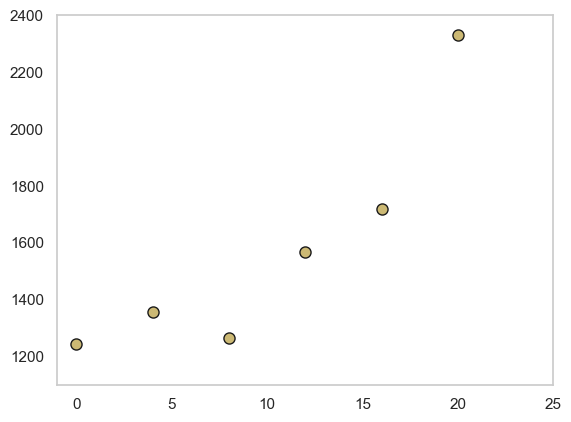

In [ ]:
# creat a plot
plt.plot(Child_Age,Births_per_women, 'ko', markerfacecolor = "y", markersize= 8)
# set range of axis
plt.xlim(-1,25)
plt.ylim(1100,2400)
plt.grid(False)

plt.show()

In [ ]:
# Estimate births per woman in next few rs with birth ratio.
from sklearn.linear_model import LinearRegression
#
Births_per_women = [1242.34, 1356.67, 1263.44, 1568.10, 1717.10, 2330.50]
Child_Age = [0, 4, 8, 12, 16, 20]

Births_per_women = np.array(Births_per_women)# dont need to reshape the y axis
Child_Age = np.array(Child_Age).reshape(-1, 1)# reshape(-1,1) is used to convert the 1-dimensional arrays with a single column  (-1 = unknown axis 1 = new)


model = LinearRegression()
model_fit = model.fit(Child_Age, Births_per_women)
model.score(Child_Age, Births_per_women)

0.7867042924162762

In [ ]:
print(Births_per_women.shape) # row and columns
Births_per_women.shape[0] # number of rows


(6,)


6

In [ ]:
# Prediction of 20 years birth rate
Child_predict = [-8, -4, 0, 4, 8, 12, 16, 20]

Child_predict = np.array(Child_predict).reshape(-1, 1)

Birth_predict = model.predict(Child_predict)
Birth_predict

array([ 701.96666667,  897.01666667, 1092.06666667, 1287.11666667,
       1482.16666667, 1677.21666667, 1872.26666667, 2067.31666667])

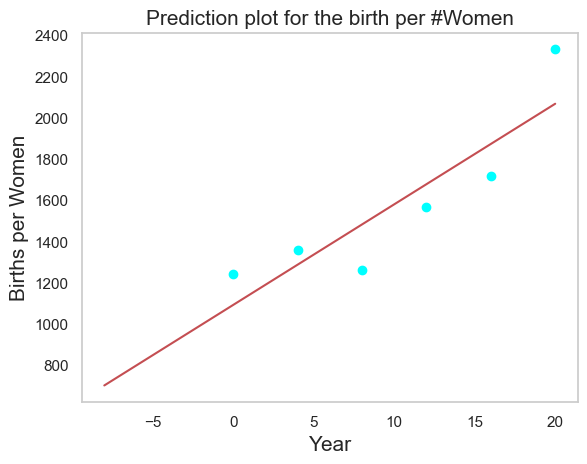

In [ ]:
#Visualization
plt.scatter(Child_Age, Births_per_women, color="cyan")
plt.plot(Child_predict, Birth_predict, "-r")

# axis labels
plt.ylabel("Births per Women",fontsize=15)
plt.xlabel("Year",fontsize=15)

# Adding title
plt.title("Prediction plot for the birth per #Women", fontsize=15)
plt.grid(False)

plt.show()

##### Estimating the death rate and changes in the rate over 5 years period

In [ ]:
#Number of people per age range 56-60 vs 61-65
Num_Age_56_60 =df[["Age"]][(df["Age"] >= 56) & (df["Age"] <= 60)].count()
print(Num_Age_56_60)

Num_Age_61_65 =df[["Age"]][(df["Age"] >= 61) & (df["Age"] <= 65)].count()
print(Num_Age_61_65)

Age    504
dtype: int64
Age    391
dtype: int64


### total deanth rate

In [ ]:
#Number of people per age range 56-60 vs 61-65
Num_Age_56_60 = df["Age"][(df["Age"] >= 56) & (df["Age"] <= 60)].count()
Num_Age_61_65 = df["Age"][(df["Age"] >= 61) & (df["Age"] <= 65)].count()
Death_rate_1 = (Num_Age_56_60 - Num_Age_61_65) / 5
print(f"Death rate between the range 56-60 vs 61-65 is {Death_rate_1}")

#Number of people per age range 66-70 vs 71-75
Num_Age_66_70 = df["Age"][(df["Age"] >= 66) & (df["Age"] <= 70)].count()
Num_Age_71_75 = df["Age"][(df["Age"] >= 71) & (df["Age"] <= 75)].count()
Death_rate_2 = (Num_Age_66_70 - Num_Age_71_75) / 5
print(f"Death rate between the range 66-70 vs 71-75 is {Death_rate_2}")

#Number of people per age range 76-80 vs 81-85
Num_Age_76_80 = df["Age"][(df["Age"] >= 76) & (df["Age"] <= 80)].count()
Num_Age_81_85 = df["Age"][(df["Age"] >= 81) & (df["Age"] <= 85)].count()
Death_rate_3 = (Num_Age_76_80 - Num_Age_81_85) / 5
print(f"Death rate between the range 76-80 vs 81-85 is {Death_rate_3}")

#Number of people per age range 86-90 vs 91-95
Num_Age_86_90 = df["Age"][(df["Age"] >= 86) & (df["Age"] <= 90)].count()
Num_Age_91_95 = df["Age"][(df["Age"] >= 91) & (df["Age"] <= 95)].count()
Death_rate_4 = (Num_Age_86_90 - Num_Age_91_95) / 5
print(f"Death rate between the range 86-90 vs 91-95 is {Death_rate_4}")

#Number of people per age range 96-100 vs 101-105
Num_Age_96_100 = df["Age"][(df["Age"] >= 96) & (df["Age"] <= 100)].count()
Num_Age_101_105 = df["Age"][(df["Age"] >= 101) & (df["Age"] <= 105)].count()
Death_rate_5 = (Num_Age_96_100 - Num_Age_101_105) / 5
print(f"Death rate between the range 96-100 vs 101-105 is {Death_rate_5}")

Total_death_rate = (Death_rate_1 + Death_rate_2 + Death_rate_3 + Death_rate_4 + Death_rate_5)*1000

print(f"Total death rate is {Total_death_rate:.2f}")


Death rate between the range 56-60 vs 61-65 is 22.6
Death rate between the range 66-70 vs 71-75 is 6.6
Death rate between the range 76-80 vs 81-85 is 10.2
Death rate between the range 86-90 vs 91-95 is 11.8
Death rate between the range 96-100 vs 101-105 is 0.6
Total death rate is 51800.00


In [ ]:
# maynot be needed
# difference between birth and death rate
birth_death_rate_difference = birth_rate_per_1000 - Total_death_rate
birth_death_rate_difference

-51507.865168539334

### Estimating the death rate over the next 20 years

In [ ]:
Age_group=[]
Age_group_count=[]
for ind in range(0,22,1):
    rng = np.array(list(range(1,6,1)))+(ind*5)
    print(rng)

[1 2 3 4 5]
[ 6  7  8  9 10]
[11 12 13 14 15]
[16 17 18 19 20]
[21 22 23 24 25]
[26 27 28 29 30]
[31 32 33 34 35]
[36 37 38 39 40]
[41 42 43 44 45]
[46 47 48 49 50]
[51 52 53 54 55]
[56 57 58 59 60]
[61 62 63 64 65]
[66 67 68 69 70]
[71 72 73 74 75]
[76 77 78 79 80]
[81 82 83 84 85]
[86 87 88 89 90]
[91 92 93 94 95]
[ 96  97  98  99 100]
[101 102 103 104 105]
[106 107 108 109 110]


In [ ]:
# Classification into age group to calculate death rate
Age_group = []

# Loop through each age group (0-4, 5-9, 10-14, etc.)
for ind in range(0, 22, 1):
    # Create an array with the age range for this group (e.g. [1, 2, 3, 4, 5] for the first group)
    rng = np.array(list(range(1, 6, 1))) + (ind * 5)

    # Count the number of people in the dataset who fall within this age range
    num_people = df["Age"][(df["Age"] >= rng[0]) & (df["Age"] <= rng[4])].count()

    # Add the number of people to the Age_group list
    Age_group.append(num_people)

print(Age_group)



[512, 553, 592, 666, 617, 621, 687, 722, 719, 647, 523, 504, 391, 328, 295, 173, 122, 74, 15, 18, 15, 0]


In [ ]:

# Calculate death rate of people per age range
death = []
death_rate = []

# Loop through each age group (excluding the first, which doesn't have a preceding group)
for ind in range(1, 22, 1):
    # Calculate the number of deaths per year by subtracting the current age group's count from the previous age group's count, then dividing by 5
    num_deaths = (Age_group[ind-1] - Age_group[ind]) / 5

    # Death rate = (Number of deaths in an age group) / (Number of people in that age group * Time period)
    rate = ((Age_group[ind-1] - Age_group[ind]) / (Age_group[ind-1] * 5))

    # Add the number of deaths and death rate to their respective lists
    death.append(num_deaths)
    death_rate.append(rate)

# Print the results
print("Number of deaths per year for the different age groups are:\n{} \n".format(death))
print("The death rates per year for the different age groups are:\n{}".format(death_rate))


Number of deaths per year for the different age groups are:
[-8.2, -7.8, -14.8, 9.8, -0.8, -13.2, -7.0, 0.6, 14.4, 24.8, 3.8, 22.6, 12.6, 6.6, 24.4, 10.2, 9.6, 11.8, -0.6, 0.6, 3.0] 

The death rates per year for the different age groups are:
[-0.016015625, -0.014104882459312839, -0.025, 0.014714714714714715, -0.0012965964343598054, -0.021256038647342997, -0.010189228529839884, 0.0008310249307479224, 0.020027816411682893, 0.03833075734157651, 0.007265774378585086, 0.04484126984126984, 0.032225063938618924, 0.020121951219512196, 0.08271186440677966, 0.058959537572254334, 0.07868852459016394, 0.15945945945945947, -0.04, 0.03333333333333333, 0.2]


In [ ]:
# Total death rate (TDR)
TDR = sum(death_rate[11:])
TDR_percent = round(TDR * 100, 2)

# Total deaths (TD) in the population
TD = TDR * df['Age'].count()

# Total deaths per 100000
Total_death_per_1000 = TDR *1000

print(f"The total death rate is {TDR}, representing a {TDR_percent}% reduction in population over 43 years.\n")
print(f"The total number of deaths in the population is {TD:.0f}.\n")
print(f"The total number of deaths per 1000 is {Total_death_per_1000:.0f}.\n")

The total death rate is 0.6703410043613918, representing a 67.03% reduction in population over 43 years.

The total number of deaths in the population is 5951.

The total number of deaths per 1000 is 670.



In [ ]:
# Total death rate  for women (TDR)
Total_death_rate = sum(death_rate[11:])

# Total death (TD) per population. It's justifiable to use the whole population at this point
# since neither death rate per age nor age difference is gender-based.
TD_per_women = sum(death_rate[11:]) * women_total

print(f"The total death rate is {Total_death_rate} i.e {round(Total_death_rate*100)}% reduction in population over 43 years\n")
print(f"The total death per current women population is {TD_per_women}")


The total death rate is 0.6703410043613918 i.e 67% reduction in population over 43 years

The total death per current women population is 3113.0636242543032


In [ ]:
# Specifying variables for death prediction
Deaths_agegroups = death_rate
Min_agegroups = list(range(5,107,5))
print(len(Deaths_agegroups))
print(len(Min_agegroups))

Deaths_agegroups = np.array(Deaths_agegroups).reshape(-1, 1)
Min_agegroups = np.array(Min_agegroups).reshape(-1, 1)

21
21


In [ ]:
#Fitting regression to the current death rate for projections
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model


model = PolynomialFeatures(degree=1)
model_fit = model.fit_transform(Min_agegroups)
#predict_ = model.fit_transform(predict)

modellin = linear_model.LinearRegression()
modellin_fit = modellin.fit(model_fit, Deaths_agegroups)

In [ ]:
# Prediction of death rates
Min_age = list(range(-10,117,5))

Min_age = np.array(Min_age).reshape(-1, 1)
model2 = PolynomialFeatures(degree=1)
model_fit2 = model.fit_transform(Min_age)

Death_predict = modellin.predict(model_fit2)
Death_predict*women_total

array([[-231.28391238],
       [-202.2035211 ],
       [-173.12312981],
       [-144.04273853],
       [-114.96234724],
       [ -85.88195596],
       [ -56.80156467],
       [ -27.72117339],
       [   1.35921789],
       [  30.43960918],
       [  59.52000046],
       [  88.60039175],
       [ 117.68078303],
       [ 146.76117432],
       [ 175.8415656 ],
       [ 204.92195688],
       [ 234.00234817],
       [ 263.08273945],
       [ 292.16313074],
       [ 321.24352202],
       [ 350.32391331],
       [ 379.40430459],
       [ 408.48469588],
       [ 437.56508716],
       [ 466.64547844],
       [ 495.72586973]])

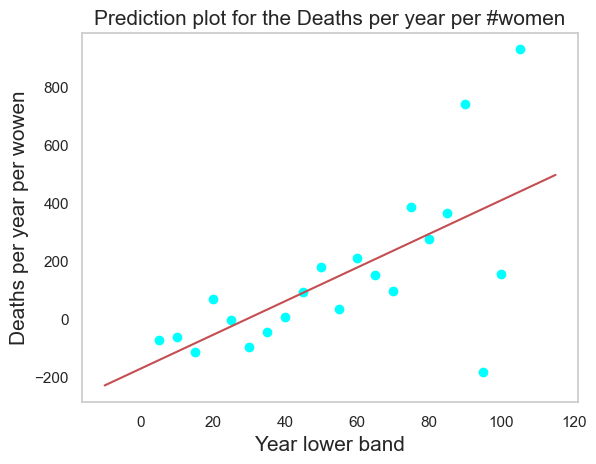

In [ ]:
#Visualization
plt.scatter(Min_agegroups, Deaths_agegroups*women_total, color="cyan")
plt.plot(Min_age, Death_predict*women_total, "-r")

# axis labels
plt.ylabel("Deaths per year per wowen",fontsize=15)
plt.xlabel("Year lower band",fontsize=15)
plt.grid(False)
# Adding title
plt.title("Prediction plot for the Deaths per year per #women", fontsize=15)

plt.show()

#### Immigration and Emigration
We go ahead and use none in the "Relationship to Head of House" column as potential people who are visitors or immigrated into town. We've established that it's probable these people and more came from out of town. However, we need to know if they will be staying in town. We'll also work alongside the lodgers and visitors.

In [ ]:
# Checking occupation for none option in the relationship with to Head of House
df["Occupation"][(df['Relationship_to_Head_of_House'] == "None")].unique()

array(['Retail merchandiser', 'University Student',
       'Occupational hygienist', 'Risk manager', 'Film/video editor',
       'Advertising art director', 'Proofreader', 'Administrator, sports',
       'Chief Financial Officer', 'PhD Student', 'Primary school teacher',
       'Unemployed', 'Engineer, building services',
       'Journalist, newspaper', 'Actor', 'Set designer', 'Copywriter',
       'Midwife', 'Environmental manager', 'Health promotion specialist',
       'Freight forwarder', 'Teaching laboratory technician',
       'Therapist, nutritional', 'Counsellor', 'Psychologist, forensic',
       'Trade mark attorney', 'Site engineer', 'Archaeologist',
       'Therapist, sports', 'Designer, jewellery', 'Printmaker',
       'Therapist, occupational', 'Mining engineer', 'Student',
       'Administrator, charities/voluntary organisations',
       'Engineer, electrical', 'IT sales professional',
       'Engineer, materials', 'Hospital pharmacist',
       'Exhibitions officer, museum

In [ ]:
# Checking occupation for lodger and visitors in town
df["Occupation"][(df['Relationship_to_Head_of_House'] == 'Lodger') | (df['Relationship_to_Head_of_House'] == 'Visitor')].unique()

array(['Public affairs consultant', 'Architectural technologist',
       'Unemployed', 'Lawyer', 'Bookseller', 'Editor, film/video',
       'Marine scientist', 'Chartered accountant',
       'IT technical support officer', 'Mechanical engineer',
       'Nutritional therapist', 'Child psychotherapist',
       'University Student', 'Geneticist, molecular',
       'Designer, interior/spatial', 'Corporate treasurer', 'Student',
       'Firefighter', 'Financial trader', 'Charity officer',
       'Planning and development surveyor', 'Chief Strategy Officer',
       'Copywriter, advertising', 'Journalist, newspaper',
       'Estate manager/land agent', 'Airline pilot', 'Graphic designer',
       'Conservator, furniture', 'Teacher, English as a foreign language',
       'Engineer, maintenance (IT)', 'Forensic scientist',
       'Community development worker', 'Electronics engineer',
       'Insurance underwriter', 'Farm manager',
       'Psychologist, prison and probation services', 'Software 

In [ ]:
#  check for the unique occupatiion in and out of two
town_occupation = df["Occupation"][(df['Relationship_to_Head_of_House'] != 'Lodger') & (df['Relationship_to_Head_of_House'] != 'Visitor')].unique()

visitors_occupation = df["Occupation"][(df['Relationship_to_Head_of_House'] == 'Lodger') | (df['Relationship_to_Head_of_House'] == 'Visitor')].unique()

In [ ]:
"""
Using jobs undertakenn by people in the town to identify lodgers or visitors who might develop similar interest
and stay in town. If there exists one, then there is room for more occurence even if they are commuters
"""
town_job = []  #Jobs taken by people living in the town
out_town_job = []  #Jobs not taken by people in town or non jobs
for job in visitors_occupation:
    if job in town_occupation and "Student" not in job:
        town_job.append(job)
    else:
        out_town_job.append(job)

print("Number of Jobs taken by people living in the town is : {}\n".format(len(town_job)))
print("Jobs taken by non-town people: {}".format(out_town_job))

Number of Jobs taken by people living in the town is : 214

Jobs taken by non-town people: ['University Student', 'Student']


In [ ]:
updated_town_occupation = df["Occupation"][(df['Relationship_to_Head_of_House'] != 'Lodger') & (df['Relationship_to_Head_of_House'] != 'Visitor') & (df['Relationship_to_Head_of_House'] != 'None')].unique()

updated_visit_occupation = df["Occupation"][(df['Relationship_to_Head_of_House'] == 'Lodger') | (df['Relationship_to_Head_of_House'] == 'Visitor') | (df['Relationship_to_Head_of_House'] == 'None')].unique()

In [ ]:
#By examining the job carried out by individuals in the town, it is possible to identify lodgers, visitors, or those who may share similar interests
#and have chosen to  stay in town or has already decided to stay in town. If there exists one, then there is room for more occurence even if they are commuters

town_job = []  #Jobs taken by people living in the town
out_town_job = []  #Jobs not taken by people in town or non jobs
for job in updated_visit_occupation:
    if job in updated_town_occupation and "Student" not in job:
        town_job.append(job)
    else:
        out_town_job.append(job)

print("Number of Jobs taken by people living in the town is : {}\n".format(len(town_job)))
print("Jobs taken by out-town people: {}".format(out_town_job))

Number of Jobs taken by people living in the town is : 419

Jobs taken by out-town people: ['University Student', 'PhD Student', 'Student']


university student, phd student represent  and divorced couple s represents most emigrants in the town. the student column was left out becuase they with in the age of 5 to 18 so they are secondary and primary school student. they are left out of the major decision on population analysis.  

In [ ]:
# Estimating the number of immigrants
staying = []
not_staying = []
visitors_name_occupation = df["Occupation"][(df['Relationship_to_Head_of_House'] == 'Lodger') | (df['Relationship_to_Head_of_House'] == 'Visitor') | (df['Relationship_to_Head_of_House'] == 'None')]
for job in visitors_name_occupation:
    if job not in out_town_job: # is not 'University Student', 'PhD Student', 'Student'
        staying.append(job)
    else:
        not_staying.append(job)

print("Number of possiible immigrants to town is {}\n".format(len(staying)))

print("Number of possiible non-immigrants to town is {}\n".format(len(not_staying)))
#meaning in the next five to ten years, they would have emigrated out of towm

Number of possiible immigrants to town is 721

Number of possiible non-immigrants to town is 212



the focus of the immigration analysis are the logers, vistors and none values. while the focus of the immigeration are the divorce couple that left the town. base on this assuption, 721 immigrant are expected to stay behinde while 212 are projected to leave after their stay.

#####  Analysis Emmigrantion via divorce

notice(The minimum age for marriage in UK is 16 years)

### # one assuption is that divorced people living alone (will likely leave)

In [ ]:
# Understanding Emmigrants via divorce
# one assuption is that divorced people living alone (will likely leave)
divorced_index = df.index[df["Marital_Status"] == "Divorced"]

print(f"Number of divorced residents over i8 is {len(divorced_index)}\n")

#collecting info on Relationship to Head of House to acces data cleaning requirement
for col in divorced_index:
    df_divorce = df[["Surname","Age","Gender", "Marital_Status", "Occupation",'Relationship_to_Head_of_House']][(df["Street"] == df["Street"][col]) & (df["House_Number"] == df["House_Number"][col]) & (df["Surname"] == df["Surname"][col])]
    if len(df_divorce) == 1:
        print(df_divorce,"\n\n")

len(divorced_index)

Number of divorced residents over i8 is 861

  Surname  Age  Gender Marital_Status                 Occupation  \
8  Taylor   28  Female       Divorced  Public affairs consultant   

  Relationship_to_Head_of_House  
8                        Lodger   


   Surname  Age  Gender Marital_Status                 Occupation  \
18    Ward   66  Female       Divorced  Higher education lecturer   

   Relationship_to_Head_of_House  
18                          Head   


     Surname  Age  Gender Marital_Status Occupation  \
31  Phillips   70  Female       Divorced    Retired   

   Relationship_to_Head_of_House  
31                          Head   


   Surname  Age Gender Marital_Status               Occupation  \
42    Chan   66   Male       Divorced  Insurance risk surveyor   

   Relationship_to_Head_of_House  
42                          Head   


      Surname  Age Gender Marital_Status  \
78  Pickering   27   Male       Divorced   

                                Occupation Relationship_

    Surname  Age Gender Marital_Status Occupation  \
921  Holmes   69   Male       Divorced    Retired   

    Relationship_to_Head_of_House  
921                          Head   


       Surname  Age Gender Marital_Status       Occupation  \
1017  O'Connor   25   Male       Divorced  Learning mentor   

     Relationship_to_Head_of_House  
1017                          None   


       Surname  Age Gender Marital_Status Occupation  \
1025  Campbell   72   Male       Divorced    Retired   

     Relationship_to_Head_of_House  
1025                          Head   


     Surname  Age Gender Marital_Status                     Occupation  \
1131   Price   58   Male       Divorced  Advertising account executive   

     Relationship_to_Head_of_House  
1131                        Lodger   


     Surname  Age Gender Marital_Status                         Occupation  \
1140   Leach   36   Male       Divorced  Special educational needs teacher   

     Relationship_to_Head_of_House  
1140  

     Surname  Age  Gender Marital_Status  Occupation  \
2416  Thomas   62  Female       Divorced  Unemployed   

     Relationship_to_Head_of_House  
2416                          Head   


     Surname  Age  Gender Marital_Status          Occupation  \
2461  Dobson   22  Female       Divorced  University Student   

     Relationship_to_Head_of_House  
2461                          Head   


              Surname  Age Gender Marital_Status  Occupation  \
2511  Arnold-Harrison   48   Male       Divorced  Unemployed   

     Relationship_to_Head_of_House  
2511                          Head   


     Surname  Age  Gender Marital_Status  Occupation  \
2520    Shaw   34  Female       Divorced  Unemployed   

     Relationship_to_Head_of_House  
2520                          Head   


     Surname  Age  Gender Marital_Status          Occupation  \
2521   Smith   20  Female       Divorced  University Student   

     Relationship_to_Head_of_House  
2521                       Visitor   


  

      Surname  Age  Gender Marital_Status  Occupation  \
4336  Preston   57  Female       Divorced  Unemployed   

     Relationship_to_Head_of_House  
4336                        Lodger   


     Surname  Age Gender Marital_Status      Occupation  \
4414   Evans   64   Male       Divorced  Retail manager   

     Relationship_to_Head_of_House  
4414                        Lodger   


       Surname  Age  Gender Marital_Status          Occupation  \
4415  Harrison   21  Female       Divorced  University Student   

     Relationship_to_Head_of_House  
4415                        Lodger   


     Surname  Age Gender Marital_Status           Occupation  \
4462  Atkins   31   Male       Divorced  Chemist, analytical   

     Relationship_to_Head_of_House  
4462                          Head   


     Surname  Age Gender Marital_Status      Occupation  \
4507   Brown   60   Male       Divorced  Teacher, music   

     Relationship_to_Head_of_House  
4507                          Head   




     Surname  Age  Gender Marital_Status                 Occupation  \
5506   Watts   41  Female       Divorced  Claims inspector/assessor   

     Relationship_to_Head_of_House  
5506                          Head   


     Surname  Age  Gender Marital_Status  \
5528  Knight   50  Female       Divorced   

                                  Occupation Relationship_to_Head_of_House  
5528  Teacher, English as a foreign language                          Head   


     Surname  Age  Gender Marital_Status        Occupation  \
5547    Holt   25  Female       Divorced  Marine scientist   

     Relationship_to_Head_of_House  
5547                          Head   


     Surname  Age Gender Marital_Status      Occupation  \
5557    Hall   47   Male       Divorced  Police officer   

     Relationship_to_Head_of_House  
5557                          Head   


     Surname  Age  Gender Marital_Status     Occupation  \
5561  Morgan   34  Female       Divorced  Retail banker   

     Relationship

     Surname  Age Gender Marital_Status        Occupation  \
6504  Miller   56   Male       Divorced  Therapist, music   

     Relationship_to_Head_of_House  
6504                          Head   


       Surname  Age Gender Marital_Status            Occupation  \
6513  Phillips   51   Male       Divorced  Field trials officer   

     Relationship_to_Head_of_House  
6513                        Cousin   


     Surname  Age  Gender Marital_Status                  Occupation  \
6519   Berry   60  Female       Divorced  Architectural technologist   

     Relationship_to_Head_of_House  
6519                          Head   


     Surname  Age  Gender Marital_Status               Occupation  \
6537  Rogers   56  Female       Divorced  Human resources officer   

     Relationship_to_Head_of_House  
6537                          Head   


       Surname  Age Gender Marital_Status                          Occupation  \
6557  Harrison   61   Male       Divorced  Research scientist (life s

     Surname  Age Gender Marital_Status     Occupation  \
7886  Turner   29   Male       Divorced  Retail banker   

     Relationship_to_Head_of_House  
7886                       Sibling   


      Surname  Age  Gender Marital_Status    Occupation  \
7887  Barrett   45  Female       Divorced  Risk analyst   

     Relationship_to_Head_of_House  
7887                        Lodger   


     Surname  Age Gender Marital_Status            Occupation  \
7889  George   48   Male       Divorced  Community pharmacist   

     Relationship_to_Head_of_House  
7889                          None   


     Surname  Age Gender Marital_Status     Occupation  \
7920    Ross   65   Male       Divorced  Herpetologist   

     Relationship_to_Head_of_House  
7920                          Head   


     Surname  Age  Gender Marital_Status  Occupation  \
7925  Ashton   27  Female       Divorced  Unemployed   

     Relationship_to_Head_of_House  
7925                          Head   


     Surname  Age 

861

### divorced people not living alone (they have their children. so they will likely stay

In [ ]:
# divorced people not living alone (they have their children. so they will likely stay)
divorced_index = df.index[df["Marital_Status"] == "Divorced"]

print(f"Number of divorced residents over i8 is {len(divorced_index)}\n")

#collecting info on Relationship to Head of House to acces data cleaning requirement
for col in divorced_index:
    df_divorce = df[["Surname","Age","Gender", "Marital_Status", "Occupation",'Relationship_to_Head_of_House']][(df["Street"] == df["Street"][col]) & (df["House_Number"] == df["House_Number"][col]) & (df["Surname"] == df["Surname"][col])]
    if len(df_divorce) > 1:
        print(df_divorce,"\n\n")

len(divorced_index)

Number of divorced residents over i8 is 861

    Surname  Age  Gender Marital_Status        Occupation  \
43  Skinner   35  Female       Divorced  Network engineer   
44  Skinner   12    Male     NA(minors)           Student   

   Relationship_to_Head_of_House  
43                          Head  
44                           Son   


    Surname  Age  Gender Marital_Status  Occupation  \
54  Jackson   33    Male       Divorced  Unemployed   
55  Jackson    4  Female     NA(minors)       Child   

   Relationship_to_Head_of_House  
54                          Head  
55                      Daughter   


    Surname  Age  Gender Marital_Status  Occupation  \
82  Jackson   52  Female       Divorced  Unemployed   
83  Jackson    9  Female     NA(minors)     Student   

   Relationship_to_Head_of_House  
82                          Head  
83                      Daughter   


   Surname  Age  Gender Marital_Status             Occupation  \
89   Allen   58  Female         Single  Geneticist

    Surname  Age  Gender Marital_Status                  Occupation  \
274   Smith   51  Female        Married  Psychologist, occupational   
275   Smith   49    Male        Married         Engineer, petroleum   
276   Smith   19  Female       Divorced        Engineer, electrical   
277   Smith   16    Male     NA(minors)                     Student   
278   Smith   15    Male     NA(minors)                     Student   
279   Smith   13    Male     NA(minors)                     Student   
280   Smith   13  Female     NA(minors)                     Student   
281   Smith    9  Female     NA(minors)                     Student   
282   Smith    8  Female     NA(minors)                     Student   

    Relationship_to_Head_of_House  
274                          Head  
275                       Husband  
276                      Daughter  
277                           Son  
278                           Son  
279                           Son  
280                      Daughter  
2

      Surname  Age  Gender Marital_Status              Occupation  \
1148  Randall   53  Female       Divorced  Operational researcher   
1149  Randall   11  Female     NA(minors)                 Student   
1150  Randall    8    Male     NA(minors)                 Student   

     Relationship_to_Head_of_House  
1148                          Head  
1149                      Daughter  
1150                           Son   


     Surname  Age  Gender Marital_Status Occupation  \
1152   Brown   49  Female       Divorced     Gaffer   
1153   Brown    0  Female     NA(minors)      Child   

     Relationship_to_Head_of_House  
1152                          Head  
1153                      Daughter   


     Surname  Age  Gender Marital_Status                     Occupation  \
1156     Cox   58  Female         Single  Clinical molecular geneticist   
1157     Cox   31    Male         Single         Sales professional, IT   
1158     Cox   28    Male       Divorced                    Tax adv

     Surname  Age  Gender Marital_Status  Occupation  \
1542  Wright   23  Female       Divorced  Unemployed   
1543  Wright    1  Female     NA(minors)       Child   
1544  Wright    1    Male     NA(minors)       Child   

     Relationship_to_Head_of_House  
1542                          Head  
1543                      Daughter  
1544                           Son   


     Surname  Age  Gender Marital_Status       Occupation  \
1555  Taylor   72  Female       Divorced          Retired   
1556  Taylor   38  Female         Single  Learning mentor   
1557  Taylor   35  Female         Single   Phytotherapist   

     Relationship_to_Head_of_House  
1555                          Head  
1556                      Daughter  
1557                      Daughter   


     Surname  Age  Gender Marital_Status          Occupation  \
1558  Reeves   45  Female       Divorced          Unemployed   
1559  Reeves   19  Female         Single  University Student   
1560  Reeves   14  Female     NA(min

     Surname  Age  Gender Marital_Status                 Occupation  \
2106    Sims   68  Female        Widowed                    Retired   
2107    Sims   39    Male       Divorced  Engineer, technical sales   

     Relationship_to_Head_of_House  
2106                          Head  
2107                           Son   


       Surname  Age  Gender Marital_Status  Occupation  \
2200  Campbell   35  Female       Divorced  Unemployed   
2201  Campbell    6    Male     NA(minors)     Student   

     Relationship_to_Head_of_House  
2200                          Head  
2201                           Son   


     Surname  Age  Gender Marital_Status                     Occupation  \
2223    Dyer   62  Female       Divorced                     Unemployed   
2224    Dyer   28  Female         Single  Clothing/textile technologist   

     Relationship_to_Head_of_House  
2223                          Head  
2224                      Daughter   


     Surname  Age  Gender Marital_Status  O

        Surname  Age  Gender Marital_Status                   Occupation  \
2560  Gallagher   66  Female        Married  Civil Service administrator   
2561  Gallagher   67    Male        Married               Soil scientist   
2562  Gallagher   43    Male       Divorced      Chief Executive Officer   
2563  Gallagher   42  Female         Single                Archaeologist   

     Relationship_to_Head_of_House  
2560                          Head  
2561                       Husband  
2562                           Son  
2563                      Daughter   


     Surname  Age  Gender Marital_Status                 Occupation  \
2593   Moore   55    Male       Divorced       Merchandiser, retail   
2594   Moore   31  Female         Single      IT sales professional   
2595   Moore   24  Female         Single  Claims inspector/assessor   
2596   Moore   21  Female       Divorced         University Student   
2597   Moore   17    Male     NA(minors)                    Student   
2598 

     Surname  Age  Gender Marital_Status  Occupation  \
3024  Taylor   38  Female       Divorced  Unemployed   
3025  Taylor   10  Female     NA(minors)     Student   
3026  Taylor    6  Female     NA(minors)     Student   
3027  Taylor    2    Male     NA(minors)       Child   

     Relationship_to_Head_of_House  
3024                          Head  
3025                      Daughter  
3026                      Daughter  
3027                           Son   


      Surname  Age  Gender Marital_Status              Occupation  \
3033  Johnson   48  Female       Divorced  Race relations officer   
3034  Johnson   13    Male     NA(minors)                 Student   
3035  Johnson   10  Female     NA(minors)                 Student   
3036  Johnson    8    Male     NA(minors)                 Student   

     Relationship_to_Head_of_House  
3033                          Head  
3034                           Son  
3035                      Daughter  
3036                           Son   

         Surname  Age  Gender Marital_Status  \
3600  Cunningham   61  Female       Divorced   
3601  Cunningham   33    Male         Single   
3602  Cunningham   29  Female       Divorced   
3603  Cunningham   25  Female         Single   
3604  Cunningham   22    Male         Single   
3605  Cunningham   19  Female         Single   

                             Occupation Relationship_to_Head_of_House  
3600                  Recycling officer                          Head  
3601                         Unemployed                           Son  
3602  Special educational needs teacher                      Daughter  
3603              Exercise physiologist                      Daughter  
3604                 University Student                           Son  
3605         Museum/gallery conservator                      Daughter   


         Surname  Age  Gender Marital_Status  \
3600  Cunningham   61  Female       Divorced   
3601  Cunningham   33    Male         Single   
3602  Cunnin

      Surname  Age  Gender Marital_Status          Occupation  \
4299  Mahmood   60  Female        Married   Minerals surveyor   
4300  Mahmood   58    Male        Married          Unemployed   
4301  Mahmood   28  Female         Single        Video editor   
4302  Mahmood   24    Male       Divorced          Unemployed   
4303  Mahmood   19  Female         Single  University Student   

     Relationship_to_Head_of_House  
4299                          Head  
4300                       Husband  
4301                      Daughter  
4302                           Son  
4303                      Daughter   


      Surname  Age  Gender Marital_Status          Occupation  \
4304  Elliott   57  Female       Divorced          Unemployed   
4305  Elliott   22  Female       Divorced  University Student   
4306  Elliott   19    Male         Single  University Student   

     Relationship_to_Head_of_House  
4304                          Head  
4305                      Daughter  
4306        

      Surname  Age  Gender Marital_Status                Occupation  \
4796  Russell   67  Female        Married                   Retired   
4797  Russell   68    Male        Married                   Retired   
4798  Russell   26  Female       Divorced  Environmental consultant   
4799  Russell   26  Female         Single        Field seismologist   
4800  Russell   19  Female         Single        University Student   
4801  Russell   15    Male     NA(minors)                   Student   

     Relationship_to_Head_of_House  
4796                          Head  
4797                       Husband  
4798                      Daughter  
4799                      Daughter  
4800                      Daughter  
4801                           Son   


     Surname  Age  Gender Marital_Status  \
4808    Gill   77  Female        Married   
4809    Gill   80    Male        Married   
4810    Gill   51  Female         Single   
4811    Gill   48  Female         Single   
4812    Gill   44   

       Surname  Age  Gender Marital_Status         Occupation  \
5126  Mitchell   59  Female       Divorced         Unemployed   
5127  Mitchell   32  Female         Single  Probation officer   

     Relationship_to_Head_of_House  
5126                          Head  
5127                      Daughter   


      Surname  Age  Gender Marital_Status          Occupation  \
5132  O'Neill   59  Female         Single         Ship broker   
5133  O'Neill   19    Male       Divorced  University Student   

     Relationship_to_Head_of_House  
5132                          Head  
5133                           Son   


       Surname  Age  Gender Marital_Status       Occupation  \
5137  Richards   70  Female        Married          Retired   
5138  Richards   66    Male        Married  Quality manager   
5139  Richards   39    Male       Divorced   Hydrogeologist   

     Relationship_to_Head_of_House  
5137                          Head  
5138                       Husband  
5139            

      Surname  Age  Gender Marital_Status          Occupation  \
5354  Stanley   58  Female       Divorced          Unemployed   
5355  Stanley   32    Male         Single          Unemployed   
5356  Stanley   28    Male         Single    Ambulance person   
5357  Stanley   21  Female         Single  University Student   

     Relationship_to_Head_of_House  
5354                          Head  
5355                           Son  
5356                           Son  
5357                      Daughter   


     Surname  Age  Gender Marital_Status                  Occupation  \
5360   Smith   58  Female        Married  Civil engineer, consulting   
5361   Smith   59    Male        Married         Editorial assistant   
5362   Smith   25    Male       Divorced         Surveyor, insurance   
5363   Smith   25  Female         Single             Naval architect   
5364   Smith   23  Female         Single                 Pathologist   

     Relationship_to_Head_of_House  
5360            

     Surname  Age  Gender Marital_Status  \
5839    Hill   98    Male        Married   
5840    Hill   98  Female        Married   
5841    Hill   66    Male        Widowed   
5842    Hill   64  Female       Divorced   
5843    Hill   61    Male         Single   
5844    Hill   59  Female       Divorced   
5845    Hill   58  Female       Divorced   
5846    Hill   55  Female        Widowed   
5847    Hill   51    Male         Single   
5848    Hill   49  Female       Divorced   
5849    Hill   45  Female         Single   

                                    Occupation Relationship_to_Head_of_House  
5839                                   Retired                          Head  
5840                                   Retired                          Wife  
5841  Geographical information systems officer                           Son  
5842                  Local government officer              Adopted Daughter  
5843       Chartered public finance accountant                           Son

     Surname  Age Gender Marital_Status Occupation  \
6036  Burton   18   Male       Divorced    Student   
6037  Burton   14   Male     NA(minors)    Student   

     Relationship_to_Head_of_House  
6036                        Nephew  
6037                        Nephew   


      Surname  Age  Gender Marital_Status                       Occupation  \
6040  Douglas   86  Female        Married                          Retired   
6041  Douglas   92    Male        Married                          Retired   
6042  Douglas   52    Male         Single        Learning disability nurse   
6043  Douglas   52    Male         Single     Research scientist (medical)   
6044  Douglas   46  Female       Divorced                    Site engineer   
6045  Douglas   46  Female         Single                     Youth worker   
6046  Douglas   45    Male         Single         Therapist, horticultural   
6047  Douglas   45  Female         Single                  Learning mentor   
6048  Douglas   41   

     Surname  Age  Gender Marital_Status  Occupation  \
6322   Kelly   47  Female       Divorced  Unemployed   
6323   Kelly   13  Female     NA(minors)     Student   
6324   Kelly   10  Female     NA(minors)     Student   
6325   Kelly    7    Male     NA(minors)     Student   

     Relationship_to_Head_of_House  
6322                          Head  
6323                      Daughter  
6324                      Daughter  
6325                           Son   


     Surname  Age  Gender Marital_Status  Occupation  \
6326  Ashton   19  Female       Divorced  Unemployed   
6327  Ashton    2  Female     NA(minors)       Child   

     Relationship_to_Head_of_House  
6326                          Head  
6327                      Daughter   


      Surname  Age  Gender Marital_Status  Occupation  \
6331  Roberts   41  Female       Divorced  Unemployed   
6332  Roberts   11    Male     NA(minors)     Student   
6333  Roberts    7  Female     NA(minors)     Student   
6334  Roberts    5  

     Surname  Age  Gender Marital_Status    Occupation  \
6849   Booth   56  Female       Divorced  Chiropractor   
6850   Booth   18    Male         Single       Student   
6851   Booth   18  Female       Divorced       Student   
6852   Booth   15  Female     NA(minors)       Student   
6853   Booth   11  Female     NA(minors)       Student   

     Relationship_to_Head_of_House  
6849                          Head  
6850                           Son  
6851                      Daughter  
6852              Adopted Daughter  
6853                      Daughter   


     Surname  Age  Gender Marital_Status                 Occupation  \
6863   White   36  Female       Divorced  Editor, magazine features   
6864   White    8    Male     NA(minors)                    Student   
6865   White    4  Female     NA(minors)                      Child   
6866   White    0  Female     NA(minors)                      Child   
6867   White    0  Female     NA(minors)                      Child   


     Surname  Age  Gender Marital_Status                   Occupation  \
7656    Cook   48  Female       Divorced  Nature conservation officer   
7657    Cook   19    Male         Single           University Student   

     Relationship_to_Head_of_House  
7656                          Head  
7657                           Son   


       Surname  Age  Gender Marital_Status          Occupation  \
7660  Thompson   56  Female         Single      Pilot, airline   
7661  Thompson   23    Male         Single           Press sub   
7662  Thompson   19  Female       Divorced  University Student   
7663  Thompson   18    Male         Single             Student   

     Relationship_to_Head_of_House  
7660                          Head  
7661                           Son  
7662                      Daughter  
7663                           Son   


      Surname  Age  Gender Marital_Status                      Occupation  \
7669  Johnson   28    Male       Divorced  Commercial art gallery mana

     Surname  Age  Gender Marital_Status              Occupation  \
8065  Parker   81  Female       Divorced                 Retired   
8066  Parker   47  Female         Single  Database administrator   
8067  Parker   46  Female         Single                  Lawyer   

     Relationship_to_Head_of_House  
8065                          Head  
8066                      Daughter  
8067                      Daughter   


     Surname  Age  Gender Marital_Status           Occupation  \
8068  Jordan   54  Female       Divorced  Broadcast presenter   
8069  Jordan   16  Female     NA(minors)              Student   

     Relationship_to_Head_of_House  
8068                          Head  
8069                      Daughter   


     Surname  Age  Gender Marital_Status  \
8081    Wood   53  Female       Divorced   
8082    Wood   19    Male         Single   
8083    Wood   15    Male     NA(minors)   

                                 Occupation Relationship_to_Head_of_House  
8081  Emergen

     Surname  Age  Gender Marital_Status          Occupation  \
8441   Clark   46  Female       Divorced          Unemployed   
8442   Clark   23  Female         Single  Investment analyst   

     Relationship_to_Head_of_House  
8441                          Head  
8442                      Daughter   


       Surname  Age  Gender Marital_Status              Occupation  \
8479  McKenzie   45  Female         Single  Occupational therapist   
8481  McKenzie   18    Male       Divorced                 Student   
8482  McKenzie   14  Female     NA(minors)                 Student   
8483  McKenzie   10  Female     NA(minors)                 Student   
8484  McKenzie    6  Female     NA(minors)                 Student   

     Relationship_to_Head_of_House  
8479                          Head  
8481                           Son  
8482                      Daughter  
8483                      Daughter  
8484                      Daughter   


      Surname  Age  Gender Marital_Status    Oc

        Surname  Age  Gender Marital_Status                 Occupation  \
8822  Patterson   49  Female         Single  Engineer, technical sales   
8823  Patterson   21  Female         Single      Merchant navy officer   
8824  Patterson   19    Male       Divorced         University Student   
8825  Patterson   18  Female       Divorced                    Student   
8826  Patterson   15  Female     NA(minors)                    Student   

     Relationship_to_Head_of_House  
8822                          Head  
8823                      Daughter  
8824                           Son  
8825                      Daughter  
8826                      Daughter   


        Surname  Age  Gender Marital_Status                 Occupation  \
8822  Patterson   49  Female         Single  Engineer, technical sales   
8823  Patterson   21  Female         Single      Merchant navy officer   
8824  Patterson   19    Male       Divorced         University Student   
8825  Patterson   18  Female      

861

In [ ]:
# Identify residents who are divorced
divorced_index = df.index[df["Marital_Status"] == "Divorced"]

# Categorize divorced residents based on whether they have other spouses living in the city
stayed_spouse = []
moved_spouse = []

#collecting info on Relationship to Head of House to acces data cleaning requirement
for col in divorced_index:
    street = df.loc[col, "Street"]
    house_num = df.loc[col, "House_Number"]
    surname = df.loc[col, "Surname"]
    df_divorce = df[(df["Street"] == street) & (df["House_Number"] == house_num) & (df["Surname"] == surname)]
    if len(df_divorce) > 1:
        stayed_spouse.append(col)
    else:
        moved_spouse.append(col)

# Print results
print(f"Number of divorced residents over the age of 18: {len(divorced_index)}\n")
print(f"Number of divorced residents with other spouses living in the city: {len(stayed_spouse)}\n")
print(f"Number of divorced residents with other spouses who do not live in the city: {len(moved_spouse)}\n")


Number of divorced residents over the age of 18: 861

Number of divorced residents with other spouses living in the city: 497

Number of divorced residents with other spouses who do not live in the city: 364



In [ ]:
#Rate of imigration and emigration per women population
emigration = len(moved_spouse)/len(df)*women_total
imigration = len(staying)/len(df)*women_total

print("Number of emigrant per total womem {}\n".format(emigration))
print("Number of imigrant per total women {}\n".format(imigration))

Number of emigrant per total womem 190.4050461815724

Number of imigrant per total women 377.1484568596531



Also 497 divorce couple stayed in the city while 364 left. the immigration and emmigeration of women was 377 and 190 repectively. over the net immigeration is positive which indicate that  immigration as added significantly to the growth of the town i.e and the town is experiencing a net inflow of people. overall due  the projected drop in birth rate the, the population of the town is expected to reduce even with the postive net immigeration.

In [ ]:
#  compute the overall potentially moving inrecently, or possibly about to move out per 100000?

# Net migration is the difference between the number of people who immigrate to emmigrating
net_migration = (len(staying)-len(not_staying))+(len(stayed_spouse)-len(moved_spouse))/len(df)*1000

print(f"net migration is {net_migration}")
print()

# maynot be needed
# difference between birth and death rate
birth_death_rate_difference = birth_rate_per_1000 - Total_death_per_1000
print(f"difference between birth and death rate is {birth_death_rate_difference}")
print()

potential_growth = birth_death_rate_difference + net_migration

print(f"The overall population growth is {potential_growth}")
print()

net migration is 523.9808515431404

difference between birth and death rate is -378.20617290071766

The overall population growth is 145.7746786424227



### Demand for housing



### Checking if there is a demand for housing

In [ ]:
#Estmating number of Houses per street
# Create a dictionary to store number of houses per street
street_house = {}

# Loop through unique street names in the dataframe
for street in df["Street"].unique():

    # Get unique house numbers for the street
    houses = df[df["Street"] == street]["House_Number"].unique()

    # Create a list to store number of people per house
    num_per_house = [len(df[(df["Street"] == street) & (df["House_Number"] == house)]) for house in houses]

    # Add the list of number of people per house to the dictionary
    street_house[street] = num_per_house

# Print the dictionary containing number of houses per street
print(street_house)


{'Garner Fork': [3, 2, 1, 3, 1, 3, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'Brightloop Lane': [1, 2, 1, 1, 1, 2, 2, 1], 'Beech Lake': [2, 2, 3, 1, 1, 1, 1], 'Todd Row': [2, 2, 5, 4, 2, 4], 'Goodluck Avenue': [1, 2, 1, 1, 1, 3, 2, 3, 1, 1, 4, 1, 2, 1, 1, 3, 4, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 3, 1, 4, 1, 2, 1, 2, 1, 1, 3, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 3, 1, 1, 1, 2, 2, 1, 3, 3], 'Apricotbox Avenue': [5, 6, 5, 5, 5, 5, 5, 5, 15, 6, 5, 5, 4, 12, 5, 5, 9, 5, 15, 8, 5, 12, 12, 1, 8, 5, 5, 12, 5, 5, 12, 5, 10], 'Baker Branch': [1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 3, 2, 1, 1, 2, 2, 3, 1, 4, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 3, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 3, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 4, 2, 4, 2, 3, 2, 1, 1, 1, 1, 3, 2, 1, 3, 1, 2, 1, 1, 1, 3, 3, 1, 3, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 3, 1, 1, 2, 1, 2, 2, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 2, 1, 1, 1, 1, 1, 1

In [ ]:
# This code estimates the mode of the number of people per house on a street

# It uses the statistics module's mode() function to calculate the mode for each house
from statistics import mode

# Initialize an empty dictionary to store the mode of each house
mode_occupancy = {}

# Loop through the keys of the street_house dictionary and calculate the mode for each house

for key in street_house.keys():
    mode_occupancy.update({key:mode(street_house[key])})

# Print the mode_occupancy dictionary
print(mode_occupancy,"\n\n")


{'Garner Fork': 1, 'Brightloop Lane': 1, 'Beech Lake': 1, 'Todd Row': 2, 'Goodluck Avenue': 1, 'Apricotbox Avenue': 5, 'Baker Branch': 1, 'Dublin Points': 3, 'Dundee Crescent': 2, 'Mary Center': 2, 'Parker Avenue': 2, 'Zebratraps Avenue': 2, 'Myers Corners': 3, 'Brooks Ridges': 2, 'Iris Vista': 2, 'White Ramp': 4, 'Foster Cove': 2, 'Tamarisk Road': 2, 'Coconut Landing': 1, 'Moore Spur': 1, 'Calendar Coves': 1, 'Spider Center': 2, 'Gray Brook': 1, 'Smith Crescent': 2, 'Glorious Parkway': 3, 'Kelly Lane': 4, 'Waterloo Ford': 3, 'Zebra Lane': 1, 'Clark Crescent': 4, 'Vaughan Light': 2, 'Open Loop': 1, 'Earl Avenue': 2, 'Whitehead Squares': 4, 'Castorshy Drive': 4, 'Marshall Inlet': 2, 'Houghton Circle': 2, 'Gwyneddbind Street': 4, 'Station Road': 2, 'Patterson Knolls': 3, 'Peel Cliff': 1, 'Butler Extensions': 2, 'Lawrence Canyon': 1, 'Bumblebee Lane': 2, 'Cardiff Lane': 4, 'Rhubarb Lane': 2, 'Swansea Stream': 4, 'Armstrong Street': 3, 'Wheeler Crescent': 4, 'Holland Unions': 2, 'Brown Roa

In [ ]:
# Finding the difference between the average occupancy,
# and the number of people actually living in a given house.
diff_mode_occupancy = {}
Street_occupancy_valuation = {}
overcrowd_occupancy = 0
for key, val in street_house.items():

    difference = np.array(street_house[key]) - mode_occupancy[key]
    diff_mode_occupancy.update({key:list(difference)})

    # Classifying streets as over crowded or not
    Street_occupancy_valuation.update({key:sum(difference)})

    #Determining the number of over crowded streets
    if sum(difference) > 0:
        overcrowd_occupancy = overcrowd_occupancy + 1
#Determining the ratio of over crowded streets to total number of streets

print("Number of over crowded streets: {}\n\n".format(overcrowd_occupancy))
print(Street_occupancy_valuation,"\n")

Number of over crowded streets: 71


{'Garner Fork': 11, 'Brightloop Lane': 3, 'Beech Lake': 4, 'Todd Row': 7, 'Goodluck Avenue': 40, 'Apricotbox Avenue': 67, 'Baker Branch': 106, 'Dublin Points': 2, 'Dundee Crescent': 20, 'Mary Center': 65, 'Parker Avenue': 17, 'Zebratraps Avenue': 43, 'Myers Corners': 23, 'Brooks Ridges': 2, 'Iris Vista': 20, 'White Ramp': -1, 'Foster Cove': 20, 'Tamarisk Road': 47, 'Coconut Landing': 6, 'Moore Spur': 30, 'Calendar Coves': 10, 'Spider Center': 42, 'Gray Brook': 85, 'Smith Crescent': 28, 'Glorious Parkway': 4, 'Kelly Lane': -25, 'Waterloo Ford': -4, 'Zebra Lane': 3, 'Clark Crescent': -20, 'Vaughan Light': 12, 'Open Loop': 16, 'Earl Avenue': 8, 'Whitehead Squares': -5, 'Castorshy Drive': -72, 'Marshall Inlet': 15, 'Houghton Circle': 16, 'Gwyneddbind Street': -16, 'Station Road': 33, 'Patterson Knolls': 5, 'Peel Cliff': 22, 'Butler Extensions': 15, 'Lawrence Canyon': 4, 'Bumblebee Lane': 13, 'Cardiff Lane': -17, 'Rhubarb Lane': 4, 'Swansea Stream': -11,

In [ ]:
# This code finds the difference between the average occupancy and the actual occupancy for each house on a street.


# Calculate the average occupancy for each house on the street
avg_occupancy = {}
for key in street_house.keys():
    avg_occupancy.update({key: np.mean(street_house[key])})

# Find the difference between the actual occupancy and the average occupancy for each house on the street
diff_avg_occupancy = {}
for key, val in street_house.items():

    difference = np.array(street_house[key]) - avg_occupancy[key]
    diff_avg_occupancy.update({key: list(difference)})

# Print the results
print("Difference between actual occupancy and average occupancy for each house:\n", diff_avg_occupancy)


Difference between actual occupancy and average occupancy for each house:
 {'Garner Fork': [1.4761904761904763, 0.4761904761904763, -0.5238095238095237, 1.4761904761904763, -0.5238095238095237, 1.4761904761904763, 1.4761904761904763, -0.5238095238095237, -0.5238095238095237, -0.5238095238095237, -0.5238095238095237, 1.4761904761904763, -0.5238095238095237, -0.5238095238095237, -0.5238095238095237, -0.5238095238095237, -0.5238095238095237, -0.5238095238095237, -0.5238095238095237, -0.5238095238095237, -0.5238095238095237], 'Brightloop Lane': [-0.375, 0.625, -0.375, -0.375, -0.375, 0.625, 0.625, -0.375], 'Beech Lake': [0.4285714285714286, 0.4285714285714286, 1.4285714285714286, -0.5714285714285714, -0.5714285714285714, -0.5714285714285714, -0.5714285714285714], 'Todd Row': [-1.1666666666666665, -1.1666666666666665, 1.8333333333333335, 0.8333333333333335, -1.1666666666666665, 0.8333333333333335], 'Goodluck Avenue': [-0.6349206349206349, 0.3650793650793651, -0.6349206349206349, -0.63492063

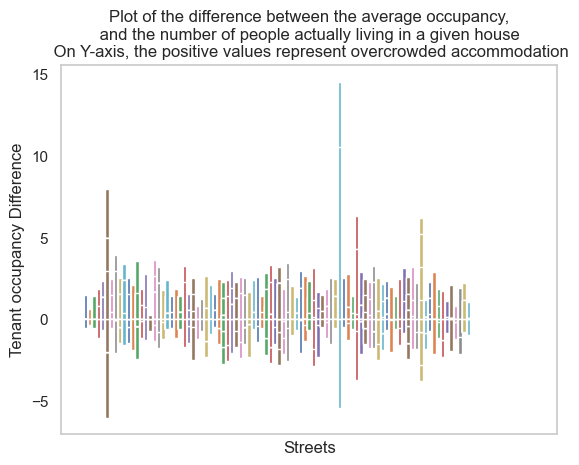

<Figure size 640x480 with 0 Axes>

In [ ]:
#Visualizing the answer
for key, val in diff_avg_occupancy.items():
    diff_keys = key
    diff_values = val
    plt.bar(diff_keys, diff_values)


#plt.xticks(ticks=None, labels=None)
plt.tick_params(
    axis='x',
    which='both',
    bottom=False,
    top=False,
    labelbottom=False)

plt.xlabel("Streets")
plt.ylabel("Tenant occupancy Difference")
plt.title("Plot of the difference between the average occupancy,\n and the number of people actually living in a given house \n On Y-axis, the positive values represent overcrowded accommodation")
plt.grid(False)
plt.show()
plt.savefig('plot')

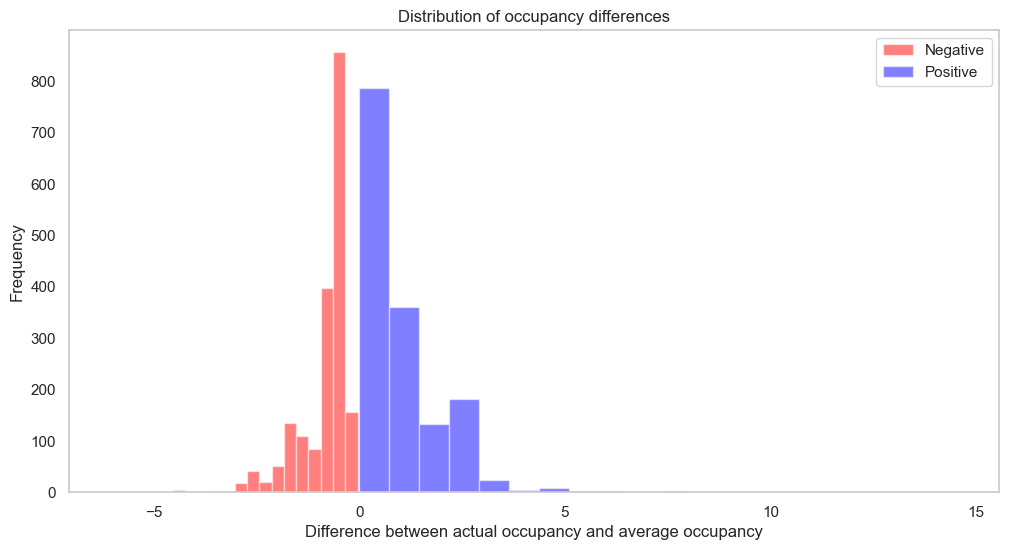

In [ ]:
# Create two lists to store the negative and positive values
positive_diff = []
negative_diff = []

 #Group the values based on whether the difference is negative or positive
for key, val in diff_avg_occupancy.items():
    for v in val:
        if v >= 0:
            positive_diff.append(v)
        else:
            negative_diff.append(v)

# Visualize the results
plt.figure(figsize=(12, 6))
plt.hist(negative_diff, bins=20, color='red', alpha=0.5, label='Negative')
plt.hist(positive_diff, bins=20, color='blue', alpha=0.5, label='Positive')
plt.xlabel('Difference between actual occupancy and average occupancy')
plt.ylabel('Frequency')
plt.title('Distribution of occupancy differences')
plt.legend()
plt.grid(False)
plt.show()


Text(0.5, 1.0, 'Plot of the sum of the difference between the average occupancy, and the number of people actually living in a given house')

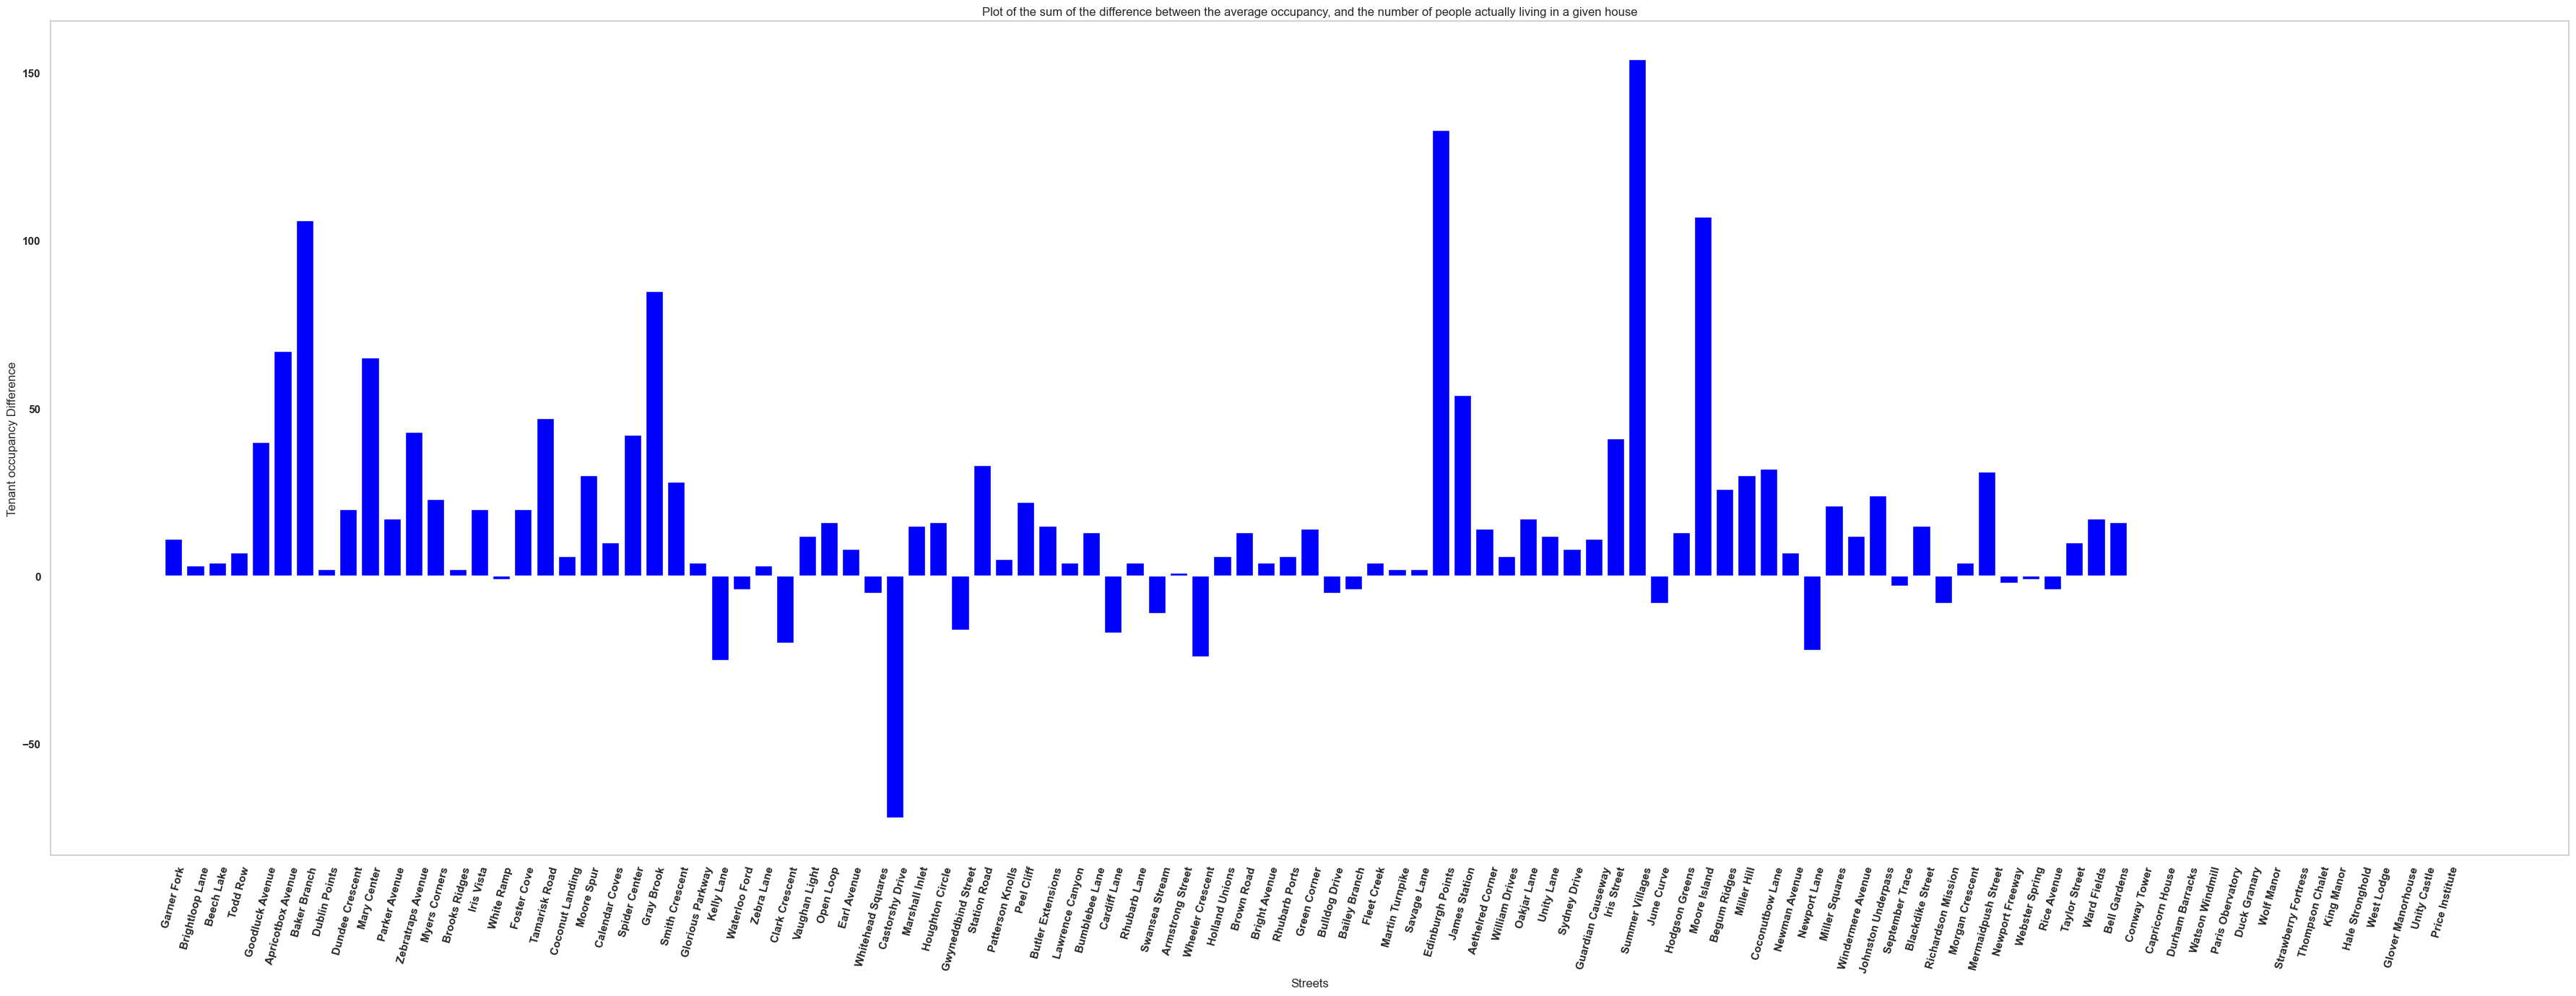

In [ ]:
import matplotlib

# Set the font for the plot
font = {'weight' : 'bold',
        'size'   : 25}
matplotlib.rc('font', **font)

# Extract the keys and values from the dictionary
val_keys = list(Street_occupancy_valuation.keys())
val_values = list(Street_occupancy_valuation.values())

# Set the figure size and plot the bar chart
plt.figure(figsize=(45,15))
plt.bar(val_keys, val_values, color='blue')

# Rotate the x-axis tick labels by 75 degrees for better readability
plt.xticks(rotation = 75)

# Set the x and y axis labels and the title of the plot
plt.xlabel("Streets")
plt.ylabel("Tenant occupancy Difference")
plt.grid(False)
plt.title("Plot of the sum of the difference between the average occupancy, and the number of people actually living in a given house")

Text(0.5, 1.0, 'Plot of the sum of the difference between the average occupancy, and the number of people actually living in a given house')

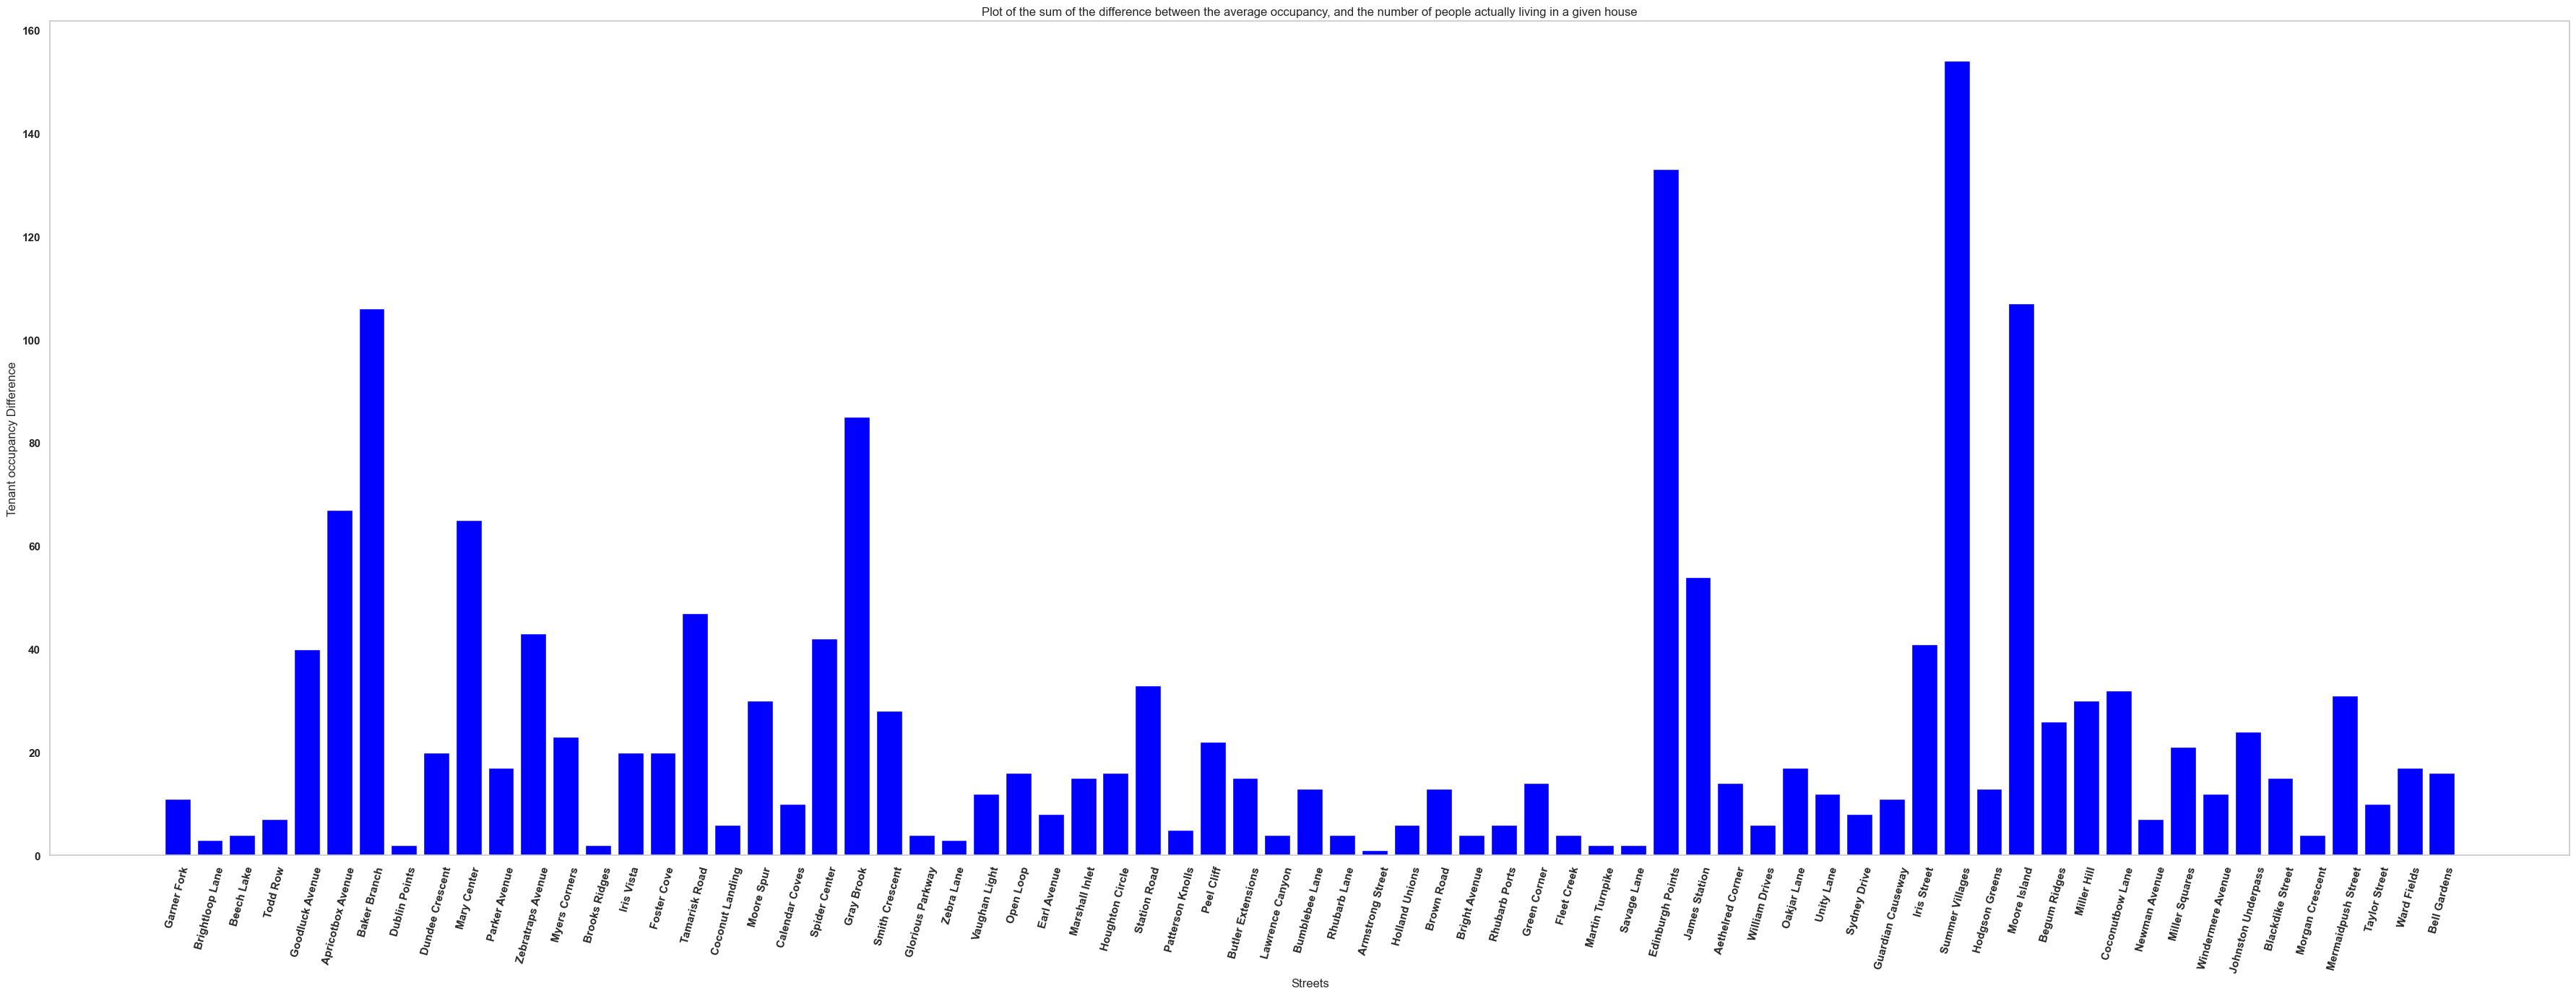

In [ ]:
# filtering the low occupnacy housing

# Set the font for the plot
font = {'weight' : 'bold',
        'size'   : 25}
matplotlib.rc('font', **font)

# Extract the keys and values from the dictionary
val_keys = [key for key, value in Street_occupancy_valuation.items() if value > 0]
val_values = [value for value in Street_occupancy_valuation.values() if value > 0]

# Set the figure size and plot the bar chart
plt.figure(figsize=(45,15))
plt.bar(val_keys, val_values, color='blue')

# Rotate the x-axis tick labels by 75 degrees for better readability
plt.xticks(rotation = 75)

# Set the x and y axis labels and the title of the plot
plt.xlabel("Streets")
plt.ylabel("Tenant occupancy Difference")
plt.grid(False)
plt.title("Plot of the sum of the difference between the average occupancy, and the number of people actually living in a given house")


Text(0.5, 1.0, ' Plot of the sum of the difference between the average occupancy, and the number of people actually living in a given house')

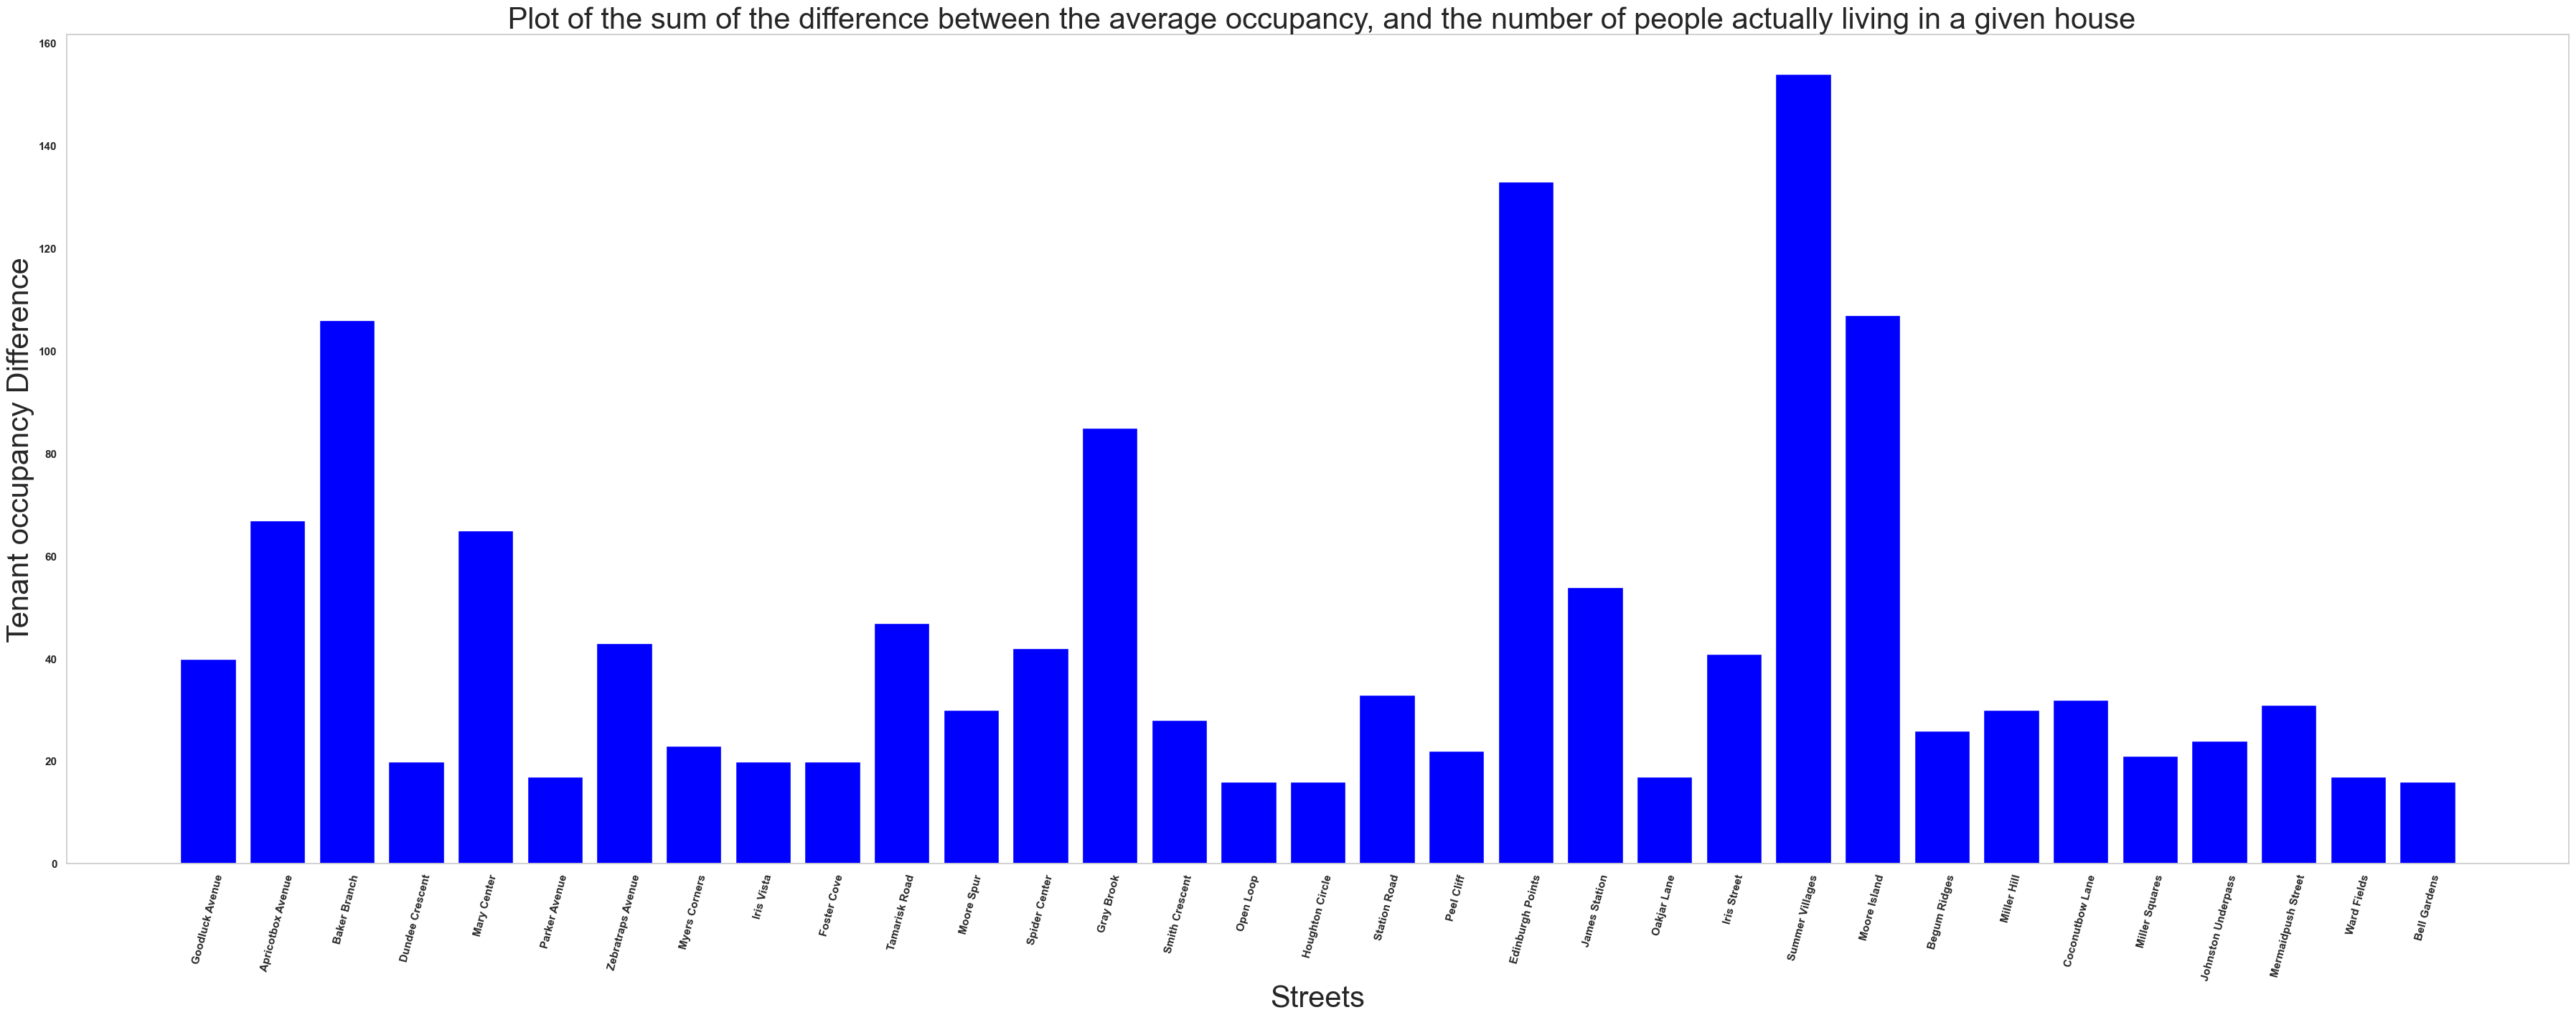

In [ ]:
# street where occupancy  differnece greater than 10

# Set the font for the plot
font = {'weight' : 'bold',
        'size'   : 25}
matplotlib.rc('font', **font)

# Extract the keys and values from the dictionary
val_keys = [key for key, value in Street_occupancy_valuation.items() if value > 15]
val_values = [value for value in Street_occupancy_valuation.values() if value > 15]

# Set the figure size and plot the bar chart
plt.figure(figsize=(45,15))
plt.bar(val_keys, val_values, color='blue')

# Rotate the x-axis tick labels by 75 degrees for better readability
plt.xticks(rotation = 75)

# Set the x and y axis labels and the title of the plot
plt.grid(False)
plt.xlabel("Streets",fontsize=30)
plt.ylabel("Tenant occupancy Difference",fontsize=30)
plt.title(" Plot of the sum of the difference between the average occupancy, and the number of people actually living in a given house",fontsize=30)

### Divorce and Marriage Rate


In [ ]:
# divoce rate per total number of total of people
divorce_rate = (df['Marital_Status'] == 'Divorced').sum() / df['Marital_Status'].count() * 100
print(f"The divorce rate is {divorce_rate:.2f}%")


The divorce rate is 9.70%


In [ ]:
women_df = df[df['Gender'] == 'Female']
divorce_rate_women = (women_df['Marital_Status'] == 'Divorced').sum() / women_df['Marital_Status'].count() * 100
print(f"The divorce rate for women is {divorce_rate_women:.2f}%")



The divorce rate for women is 11.28%


In [ ]:
total_marriages = df[df['Marital_Status'] == 'Married']["Marital_Status"].count()/2
total_marriages
# total number of marriages by dividing the number of married individuals
#by 2, since each marriage involves 2 people.

1276.0

In [ ]:
# calculate crude divorce rate by total number of people
divorced_women = df[(df['Marital_Status'] == 'Divorced') & (df['Gender'] == 'Female')].shape[0]
total_women = df[df['Gender'] == 'Female'].shape[0]
crude_divorce_rate = (divorced_women / total_women) * 1000 # per  per thousand

# calculate marriage rate
married_people = df[df['Marital_Status'] == 'Married'].shape[0]
total_people = df.shape[0]
marriage_rate = (married_people / total_people) * 1000

# calculate divorce to marriage ratio
divorce_to_marriage_ratio = crude_divorce_rate / marriage_rate*100

# print results
print("Crude Divorce Rate: {:.2f}".format(crude_divorce_rate))
print("Marriage Rate: {:.2f}".format(marriage_rate))
print("Divorce to Marriage Ratio: {:.2f}".format(divorce_to_marriage_ratio))


Crude Divorce Rate: 112.83
Marriage Rate: 287.45
Divorce to Marriage Ratio: 39.25


In [ ]:
# calculate crude divorce rate by total number of marriages
divorced_women = df[(df['Marital_Status'] == 'Divorced') & (df['Gender'] == 'Female')].shape[0]
total_women = df[df['Gender'] == 'Female'].shape[0]
crude_divorce_rate = (divorced_women / total_women) * 1000

# calculate total number of marriages
married_people = df[df['Marital_Status'] == 'Married'].shape[0]
total_marriages = married_people / 2

# calculate divorce to marriage ratio per number of marriages
divorce_to_marriage_ratio = crude_divorce_rate / total_marriages*100

# print results
print("Crude Divorce Rate: {:.2f}%".format(crude_divorce_rate))
print("Total Marriages: {:.0f}".format(total_marriages))
print("Divorce to Marriage Ratio per Number of Marriages: {:.2f}%".format(divorce_to_marriage_ratio))


Crude Divorce Rate: 112.83%
Total Marriages: 1276
Divorce to Marriage Ratio per Number of Marriages: 8.84%


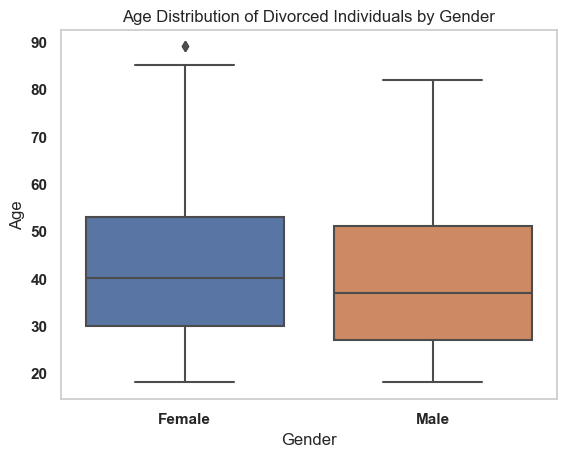

In [ ]:

# Filter the DataFrame to only include divorced individuals
divorced_df = df[df['Marital_Status'] == 'Divorced']

# Create a boxplot of age, grouped by gender
sns.boxplot(data=divorced_df, x='Gender', y='Age')

# Add a title and axis labels
plt.title('Age Distribution of Divorced Individuals by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.grid(False)
# Show the plot
plt.show()







Recommendations and Conclusions:

The town is relatively healthy, with a low incidence of illness, making the construction of a
new health facility unnecessary. Additionally, the town is well-connected to two larger
neighboring towns, and the existing transportation system is sufficient, as evidenced by the
high number of commuters. Moreover, the town's major religions are seeing a decline in their
younger members, making the construction of a new religious center unnecessary.
However, although the town's population is projected to decline in the next decade, there is still
a significant overcrowding issue in the current housing situation, and the town's high life
expectancy means that people will continue to live longer. Therefore, the construction of new,
low-income housing is strongly recommended to address the problem of congestion and to
meet the need of large families.
Furthermore, unemployment levels in the town are high, and most graduates either leave or
remain to compete for scarce employment opportunities. Therefore, investment in employment
and training, or retraining people for new skills, is essential.
Investment in old age care is also a possible option, given the expected increase in the number
of retirees due to the high life expectancy in the town. Additionally, with the declining birth
rate, the town will increasingly rely on immigration to sustain its workforce in the coming
years.